## Import

In [133]:
from statistics import LinearRegression

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np


df = pd.read_csv('covid_combined_data.csv')
print(df.index)
df['date'] = pd.to_datetime(df['date'])
df['Q'] = df['date'].dt.to_period('Q').astype(str)
countries_df = pd.read_csv('countries_combined_data.csv')
# countries_df[countries_df.country_name.isin(['Switzerland', 'Argentina', 'Israel', 'Canada', 'Czech Republic'])

RangeIndex(start=0, stop=350787, step=1)


## Część 1

Wyznacz średnią kroczącą i odchylenie standardowe kroczące (np. 7-dniowe), aby zobaczyć, jak te zjawiska zmieniają się w czasie. Obliczenia wykonaj dla:


1.1. liczby nowych zachorowań,



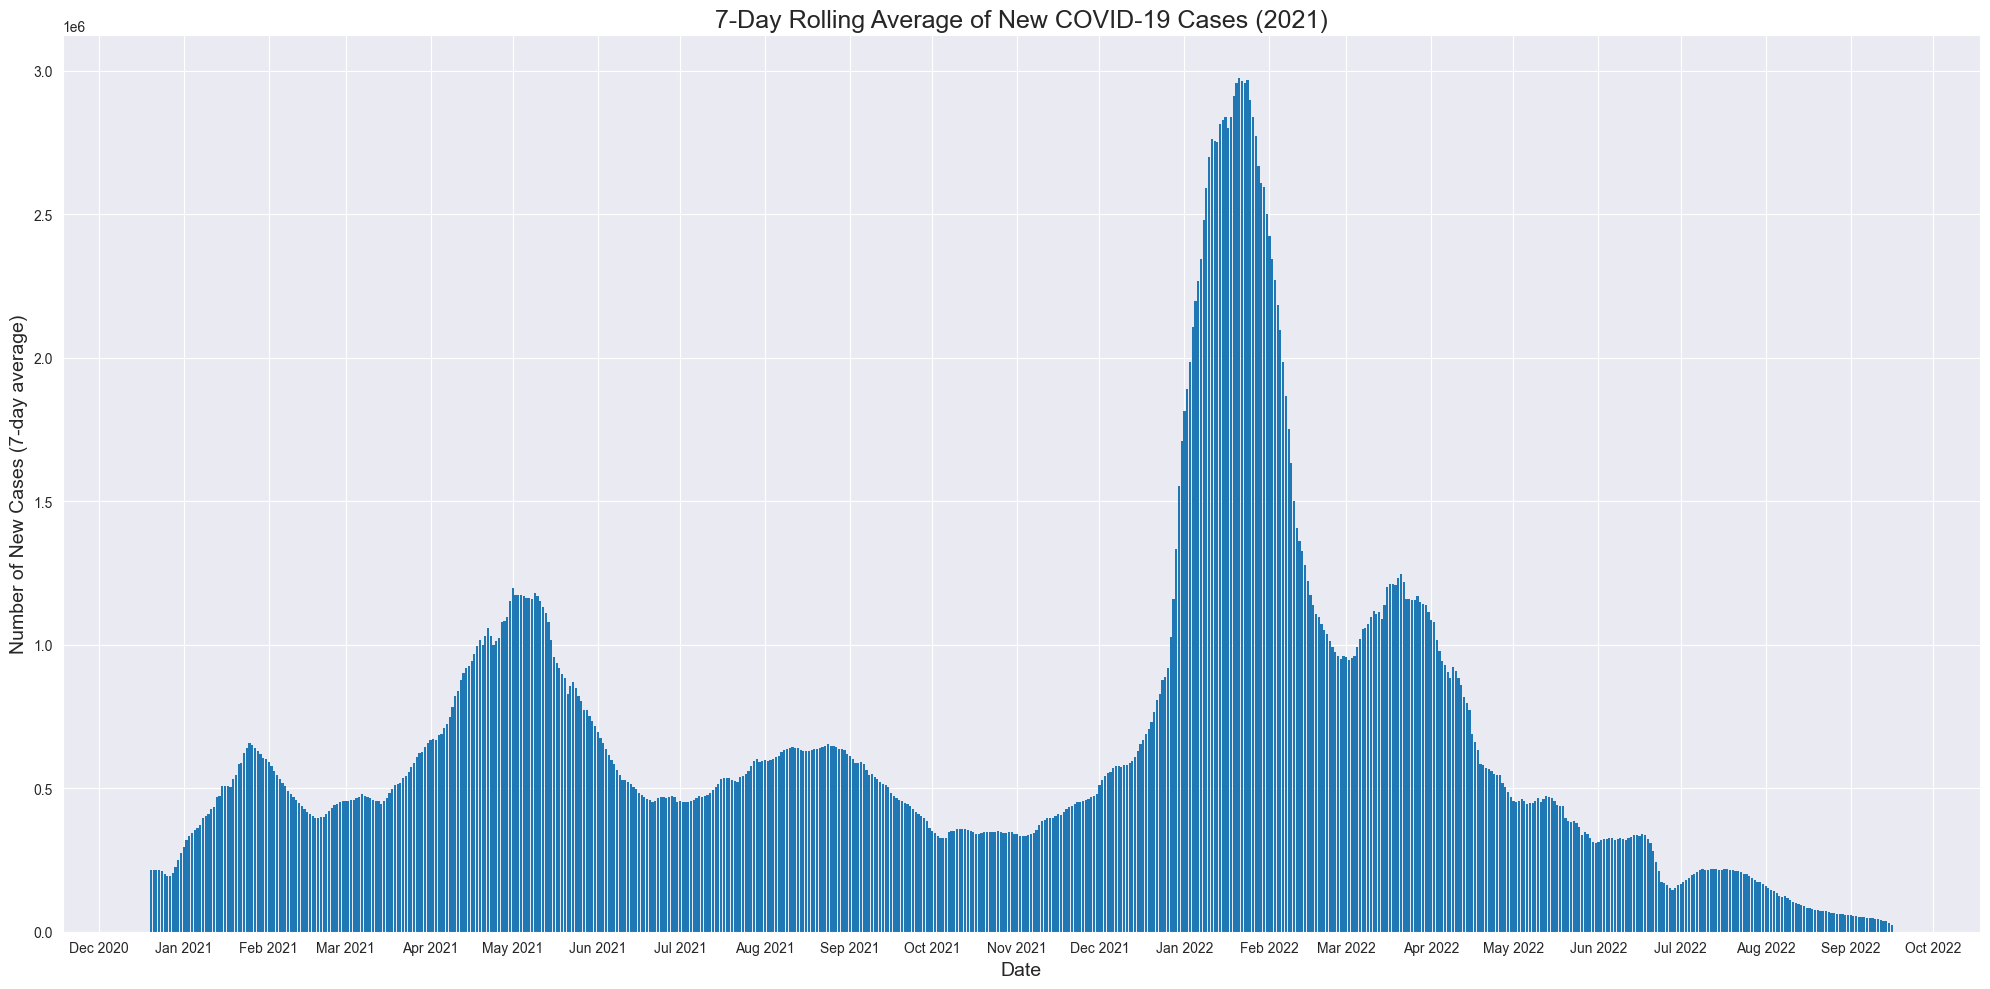

In [134]:
df_daily = df[df['subregion1_name_x'].isna()]
df_daily = df.set_index('date').resample('D').sum()
df_daily['rolling_mean'] = df_daily['new_confirmed'].rolling(window=7).mean()
df_daily = df_daily.reset_index()  # Reset index to make 'date' a column again
df_daily['Q'] = df_daily['date'].dt.to_period('Q').astype(str)

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean'], edgecolor='none')  # Remove black outline

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Cases (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Cases (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # 'Jan 2025', 'Feb 2025', etc.
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.tight_layout()
plt.show()

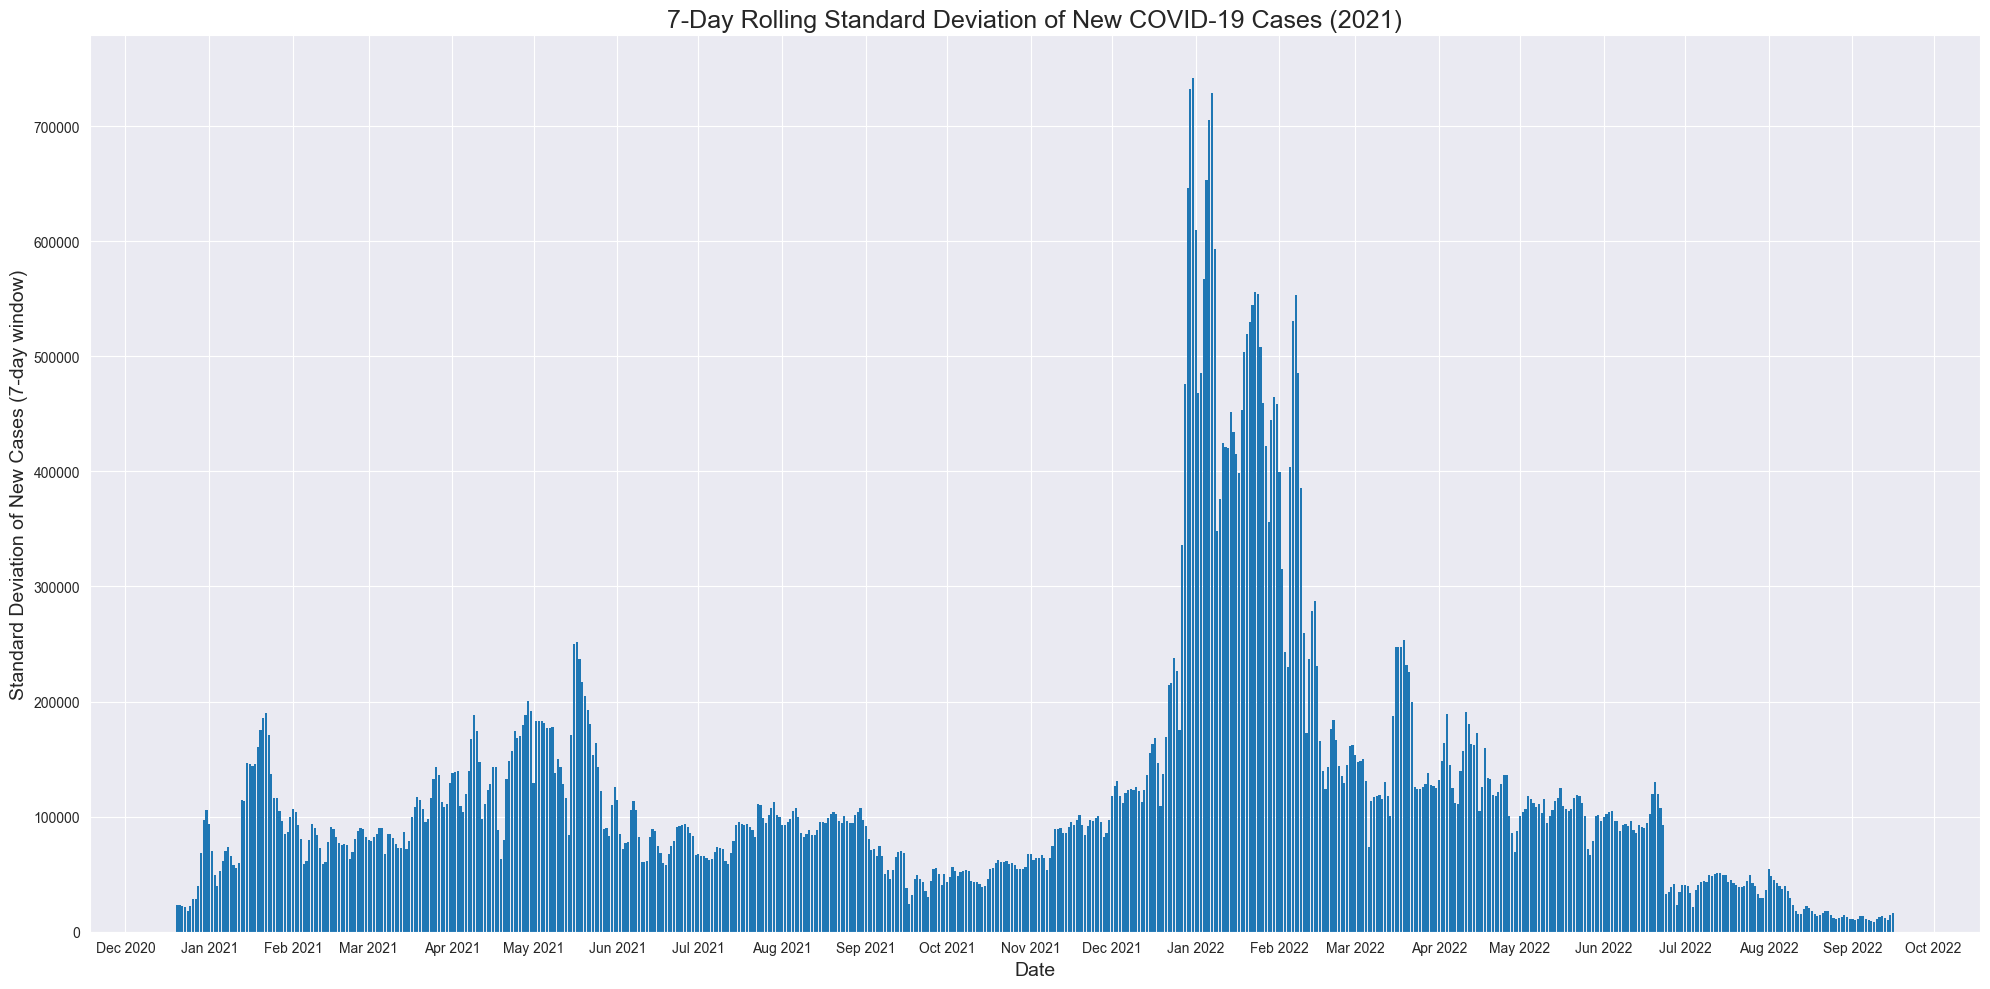

In [135]:
df_daily['rolling_std'] = df_daily['new_confirmed'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Cases (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Cases (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.2. liczby nowych śmierci,



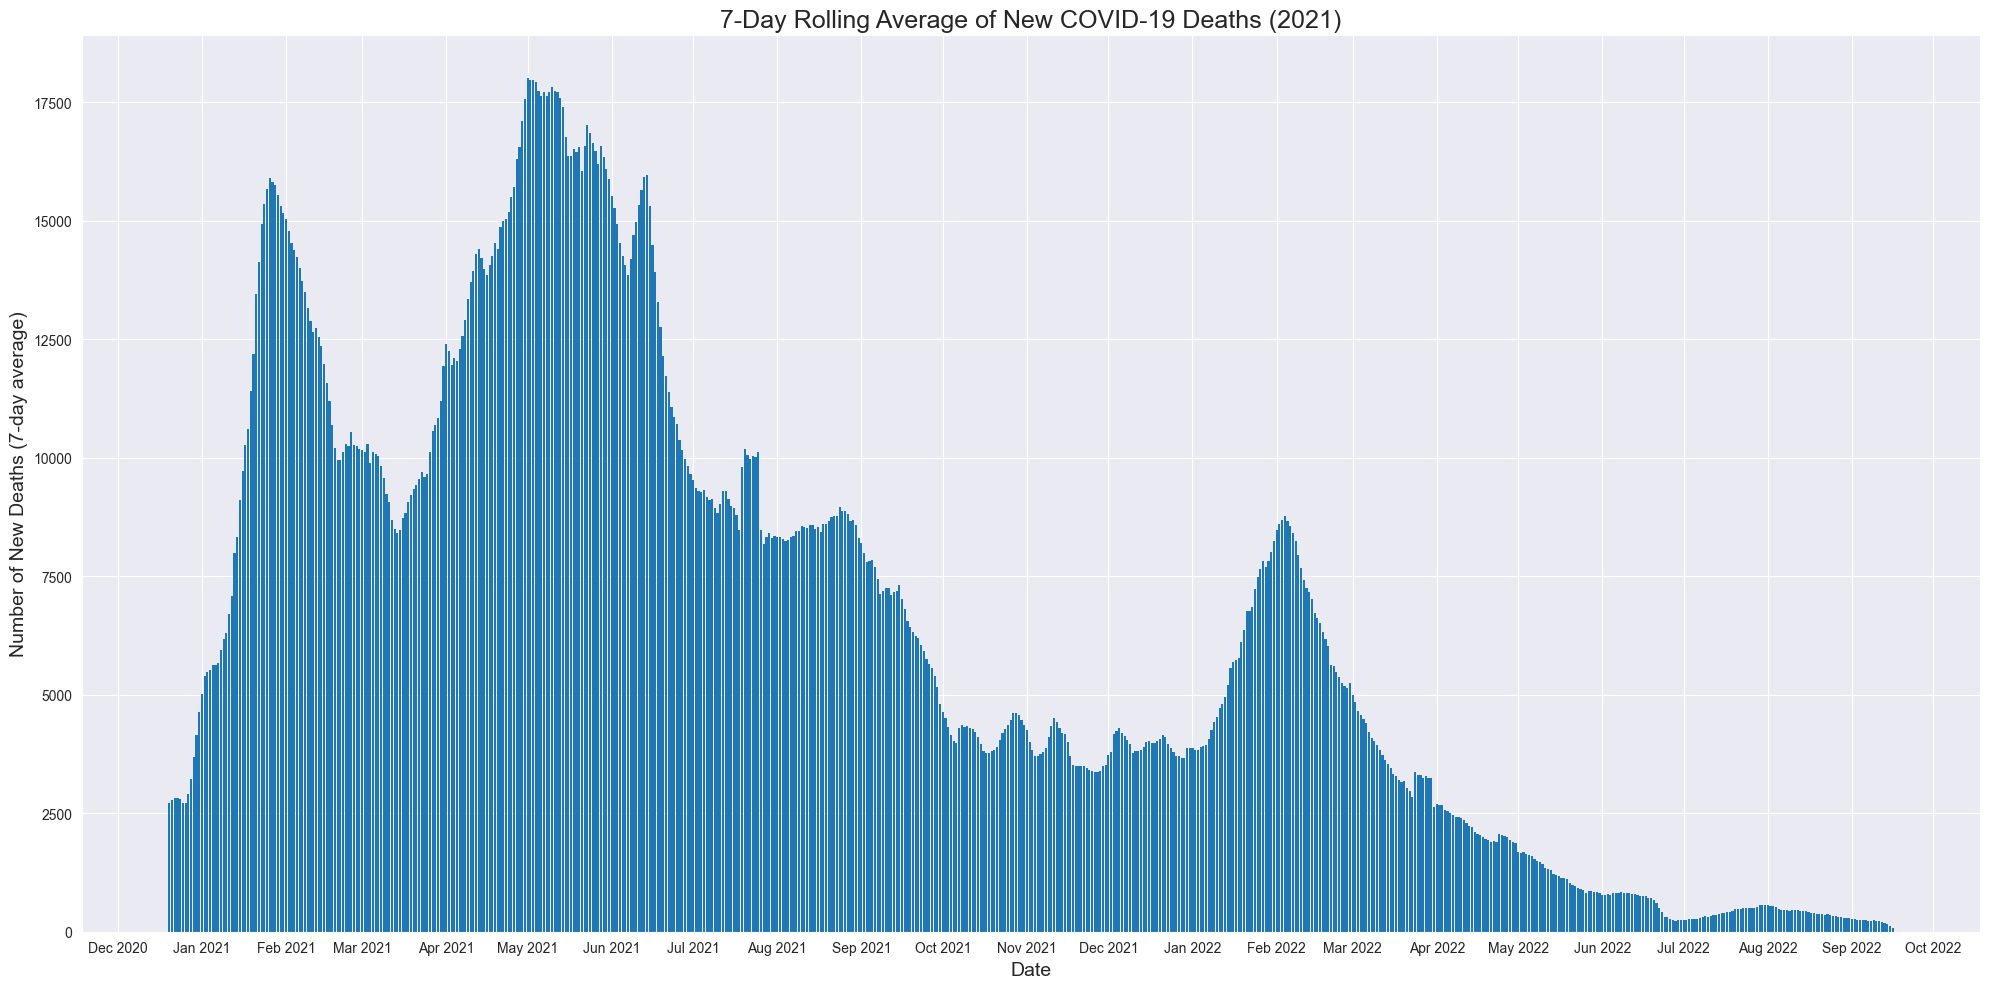

In [136]:
# Calculate 7-day rolling mean for new deaths
df_daily['rolling_mean_deaths'] = df_daily['new_deceased'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_deaths'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Deaths (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Deaths (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

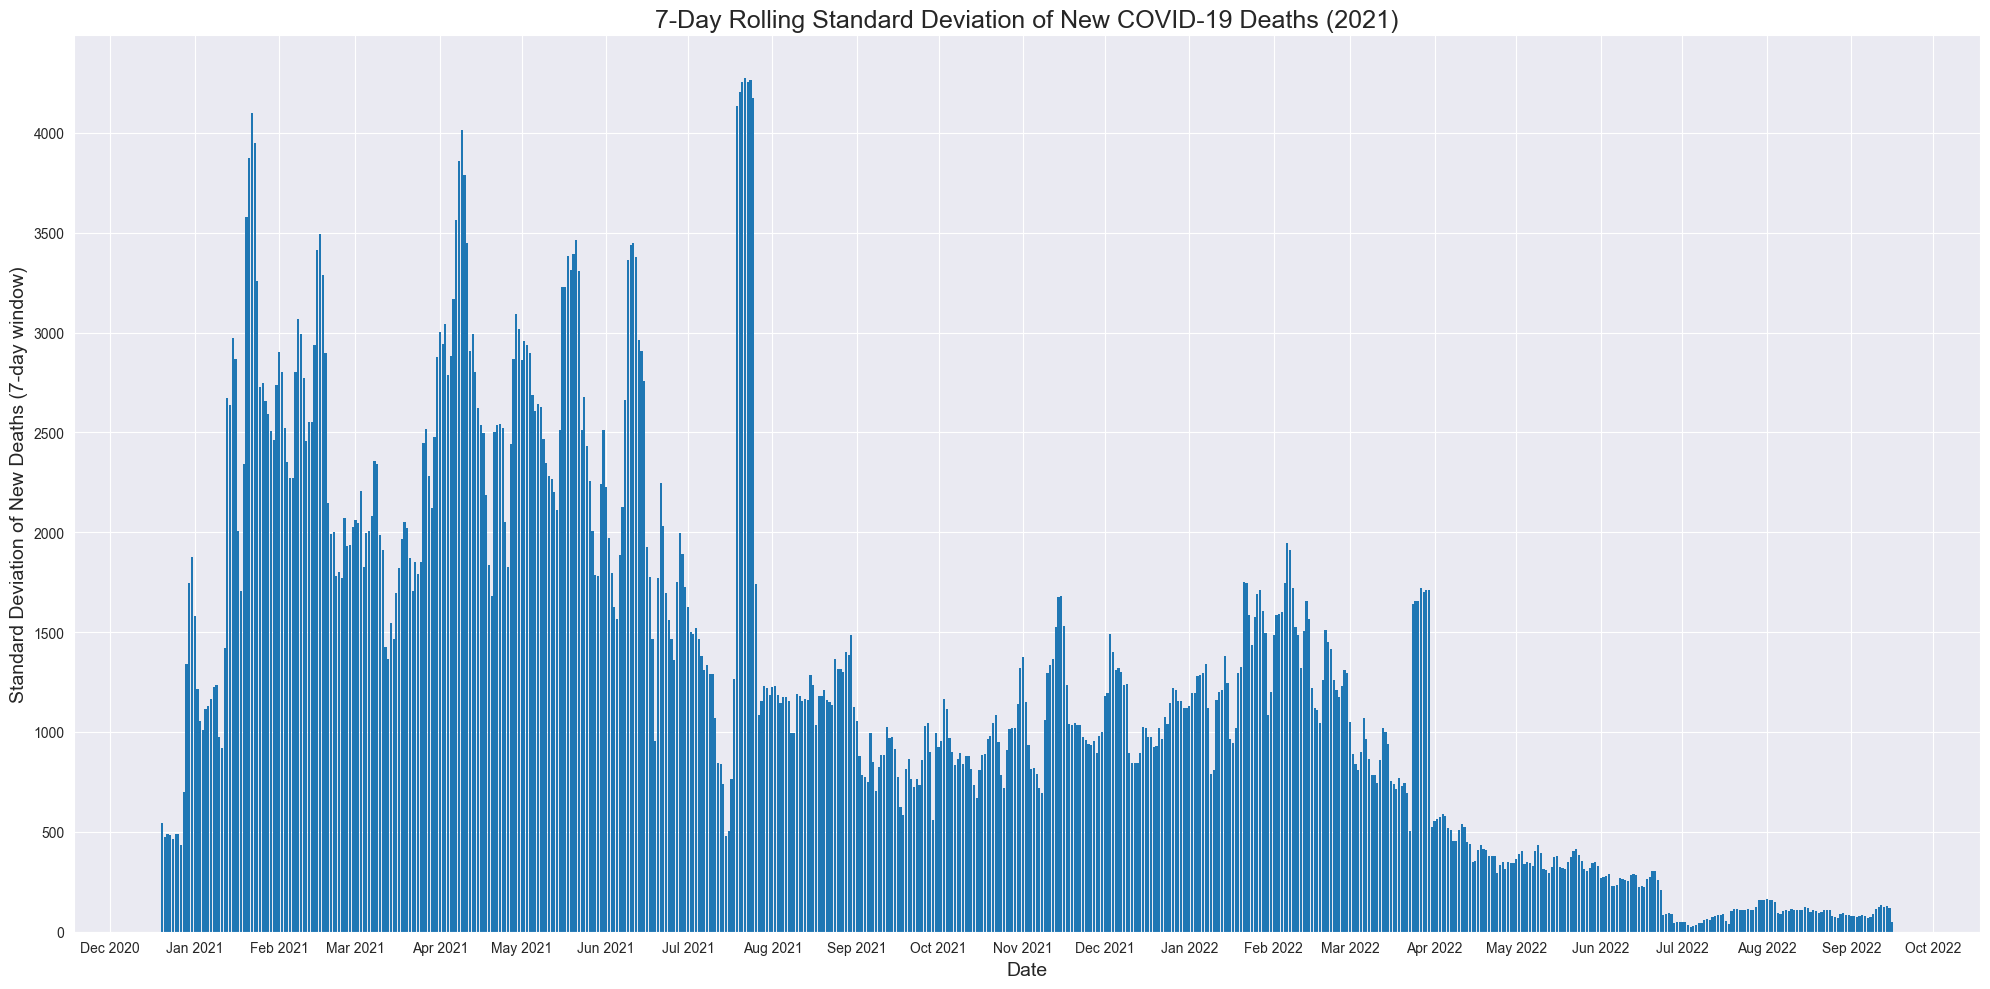

In [137]:
# Calculate 7-day rolling standard deviation for new deaths
df_daily['rolling_std_deaths'] = df_daily['new_deceased'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_deaths'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Deaths (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Deaths (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.3. liczby nowych szczepień,



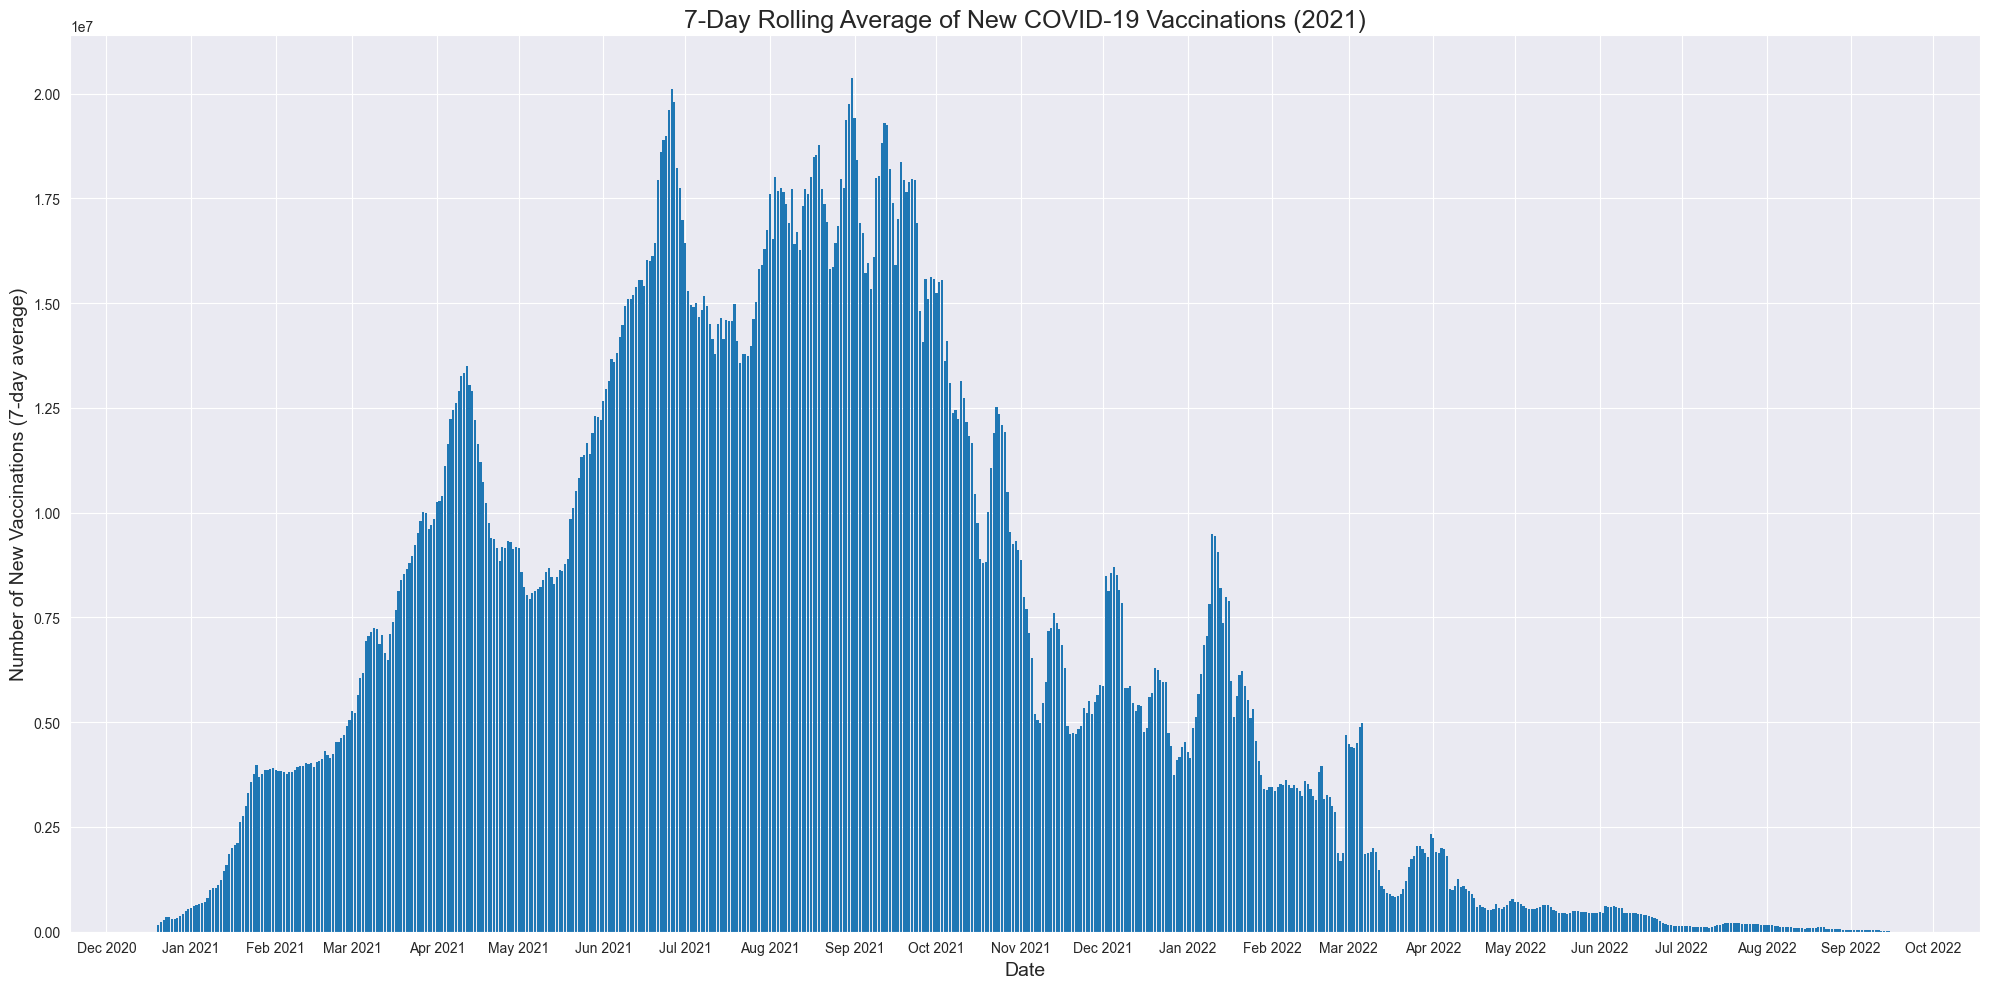

In [138]:
# Calculate 7-day rolling mean for new vaccinations
df_daily['rolling_mean_vaccinations'] = df_daily['new_persons_vaccinated'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_vaccinations'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Vaccinations (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Vaccinations (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

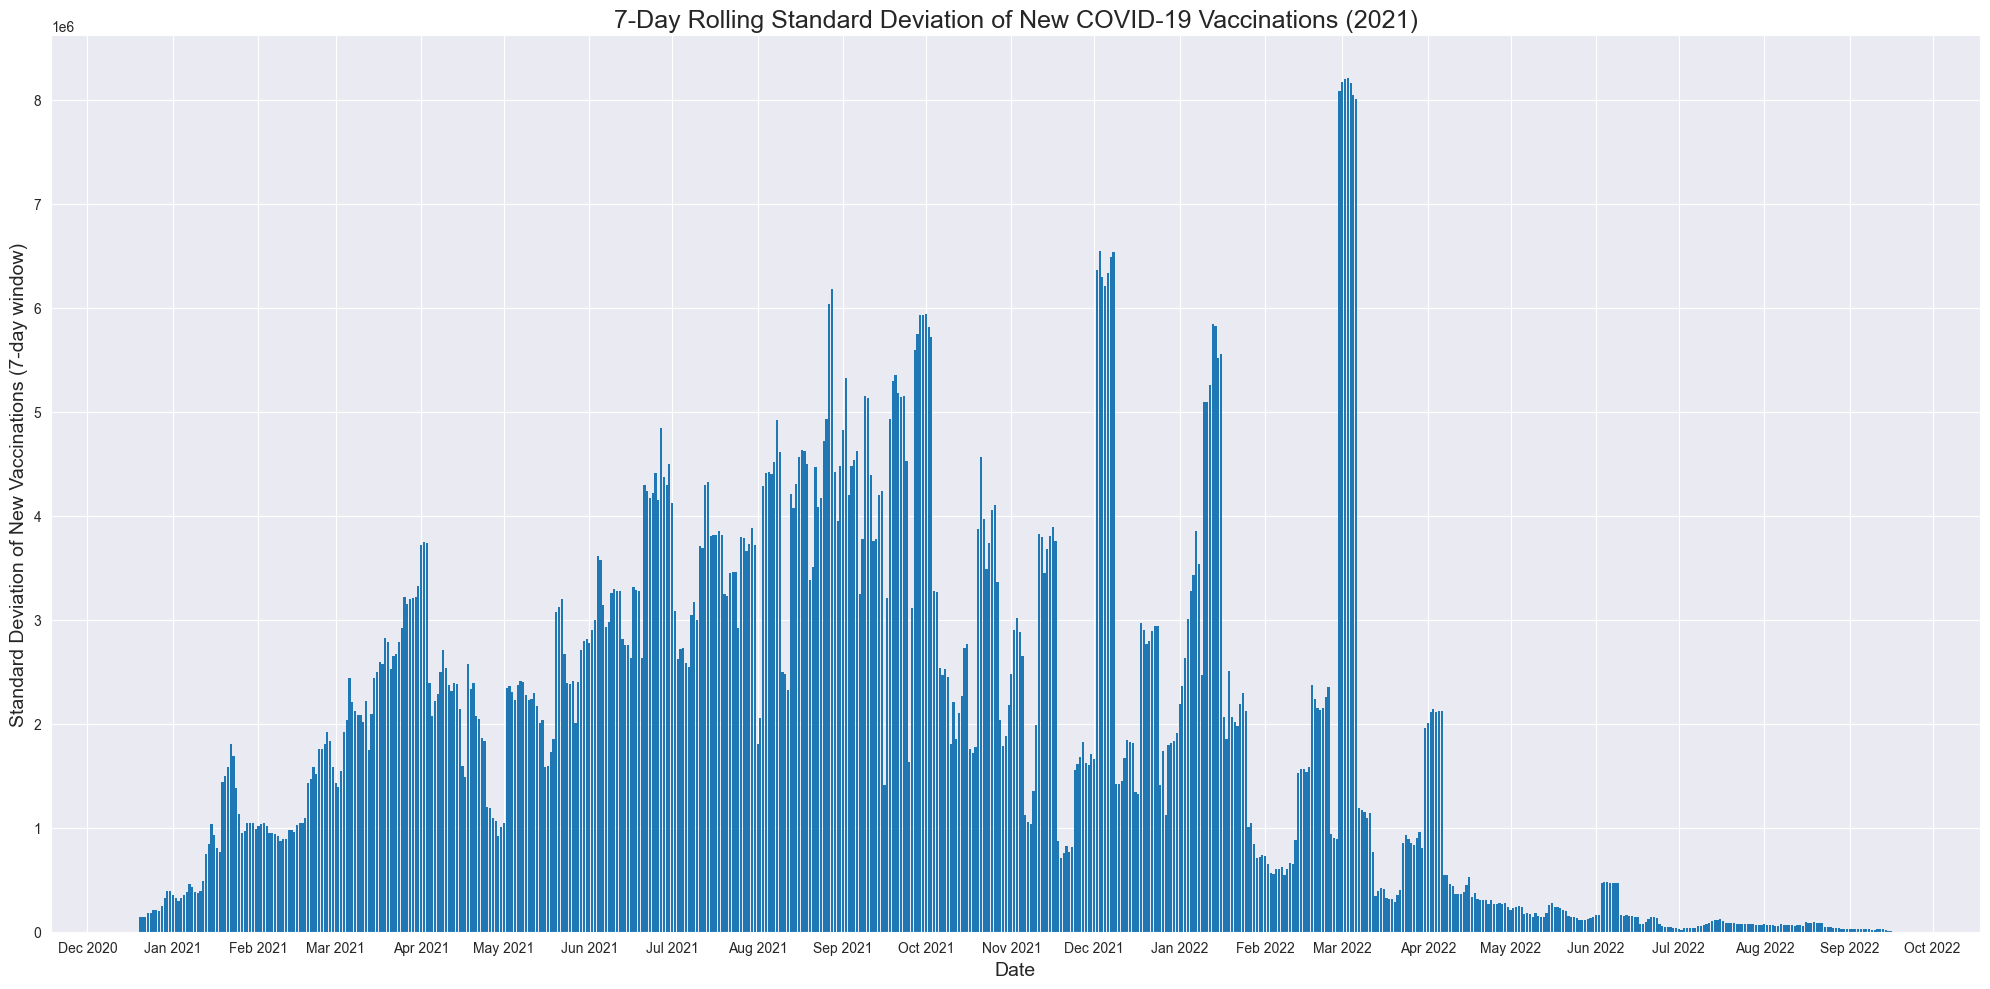

In [139]:
# Calculate 7-day rolling standard deviation for new vaccinations
df_daily['rolling_std_vaccinations'] = df_daily['new_persons_vaccinated'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_vaccinations'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Vaccinations (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Vaccinations (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.4.1 liczba osób w pełni zaszczepionych



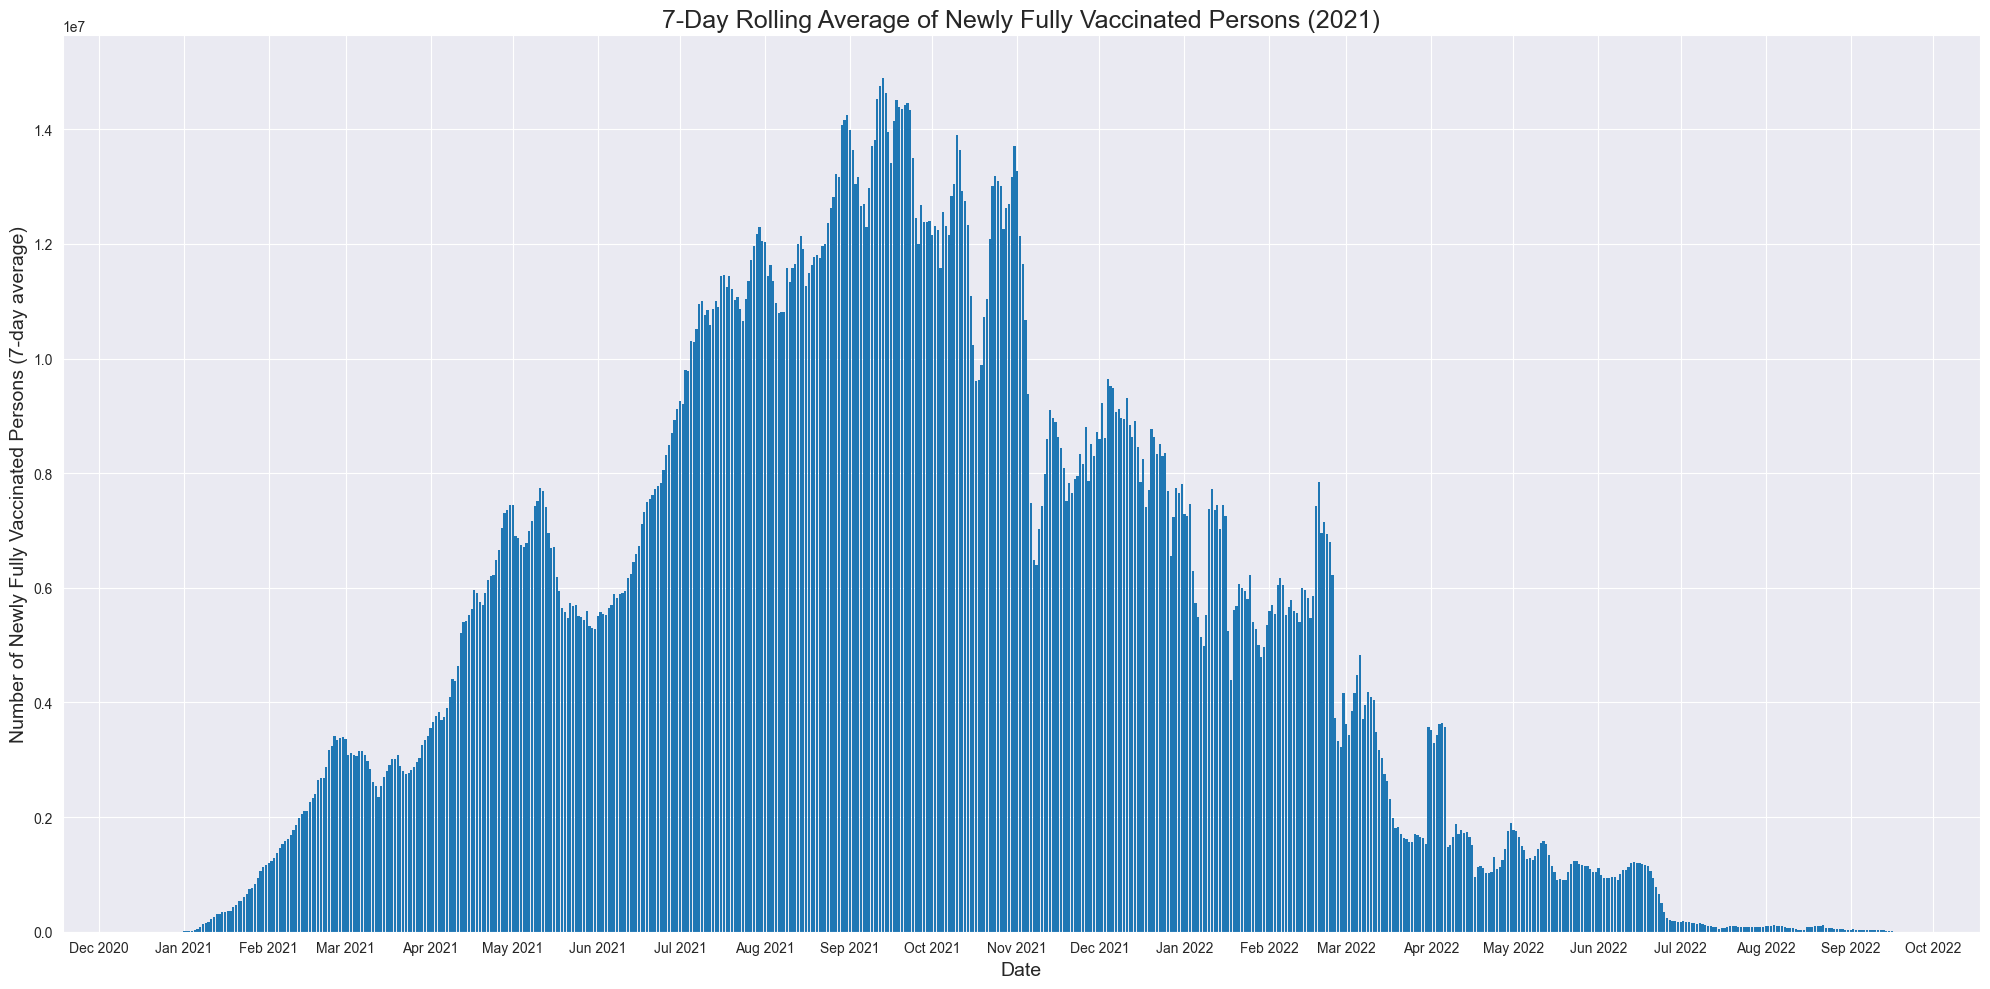

In [140]:
# Calculate 7-day rolling mean for fully vaccinated persons
df_daily['rolling_mean_fully_vaccinated'] = df_daily['new_persons_fully_vaccinated'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_fully_vaccinated'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of Newly Fully Vaccinated Persons (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Newly Fully Vaccinated Persons (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

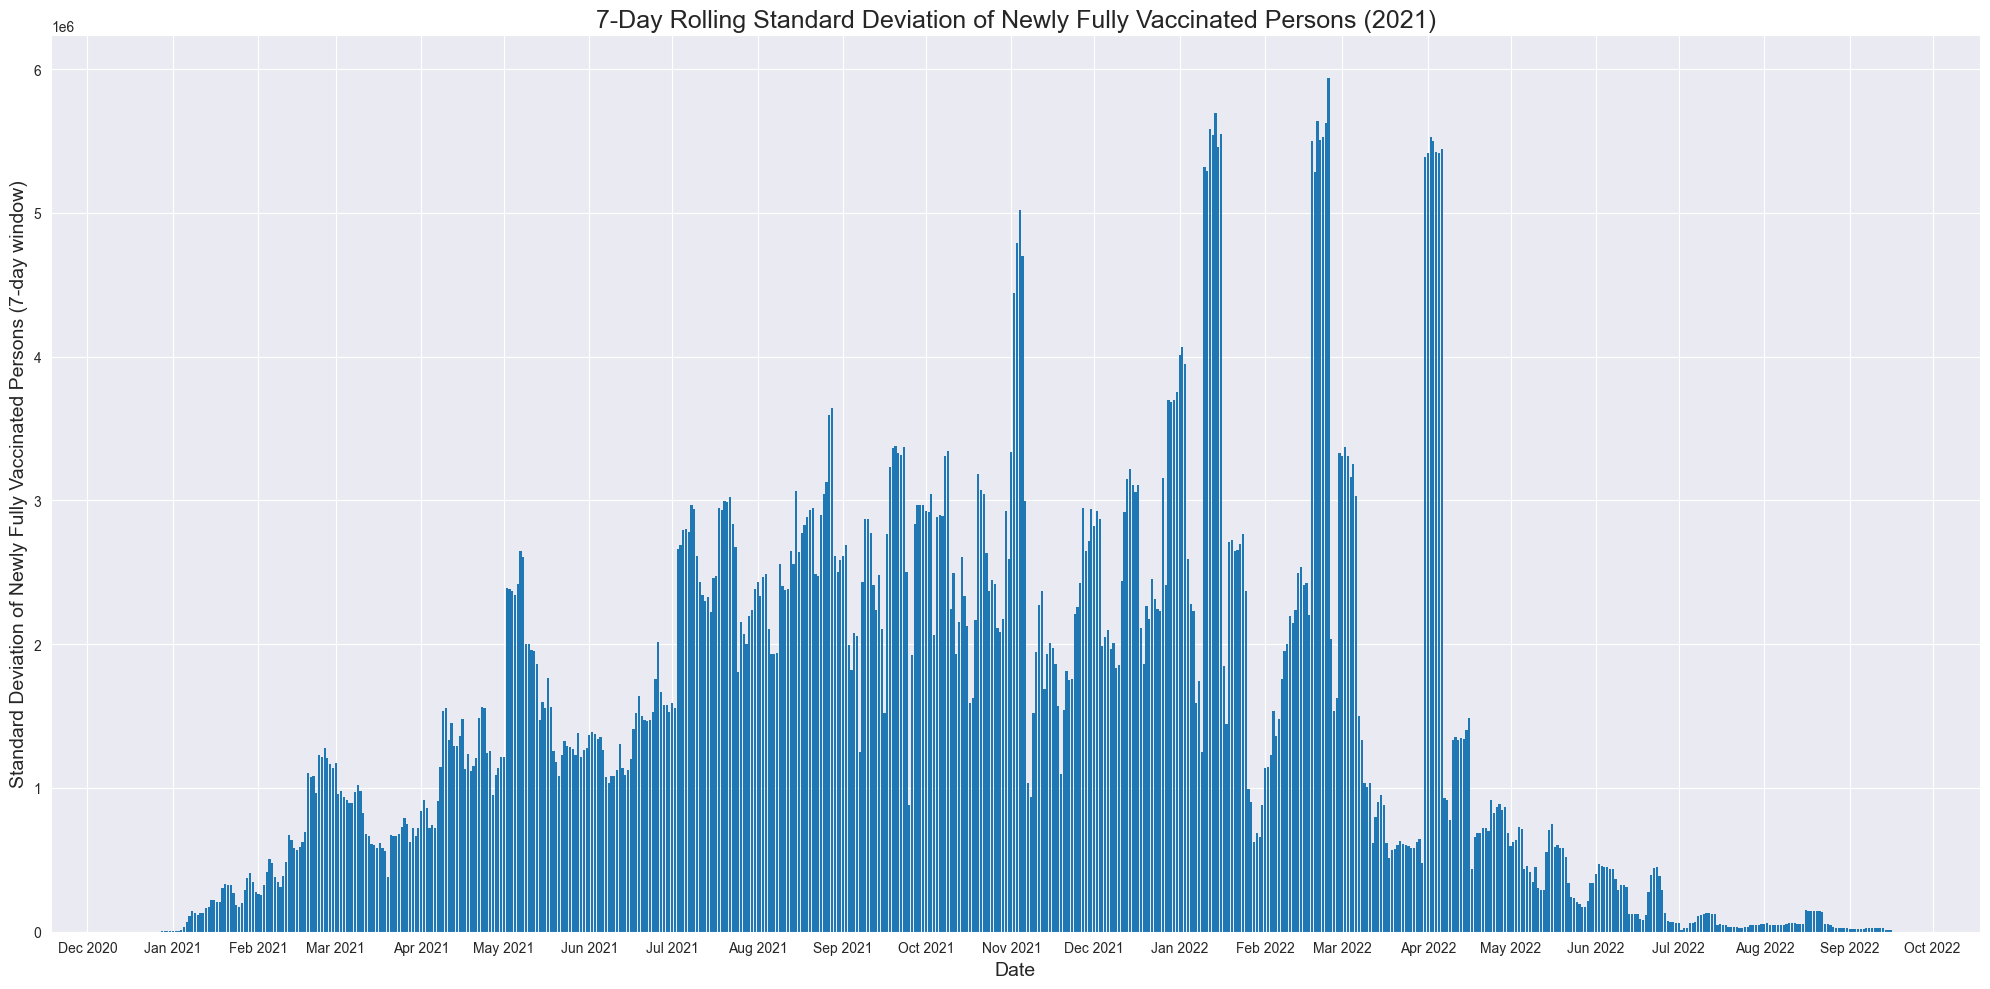

In [141]:
# Calculate 7-day rolling standard deviation for fully vaccinated persons
df_daily['rolling_std_fully_vaccinated'] = df_daily['new_persons_fully_vaccinated'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_fully_vaccinated'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of Newly Fully Vaccinated Persons (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of Newly Fully Vaccinated Persons (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.4.2 liczba zaaplikowanych szczepionek



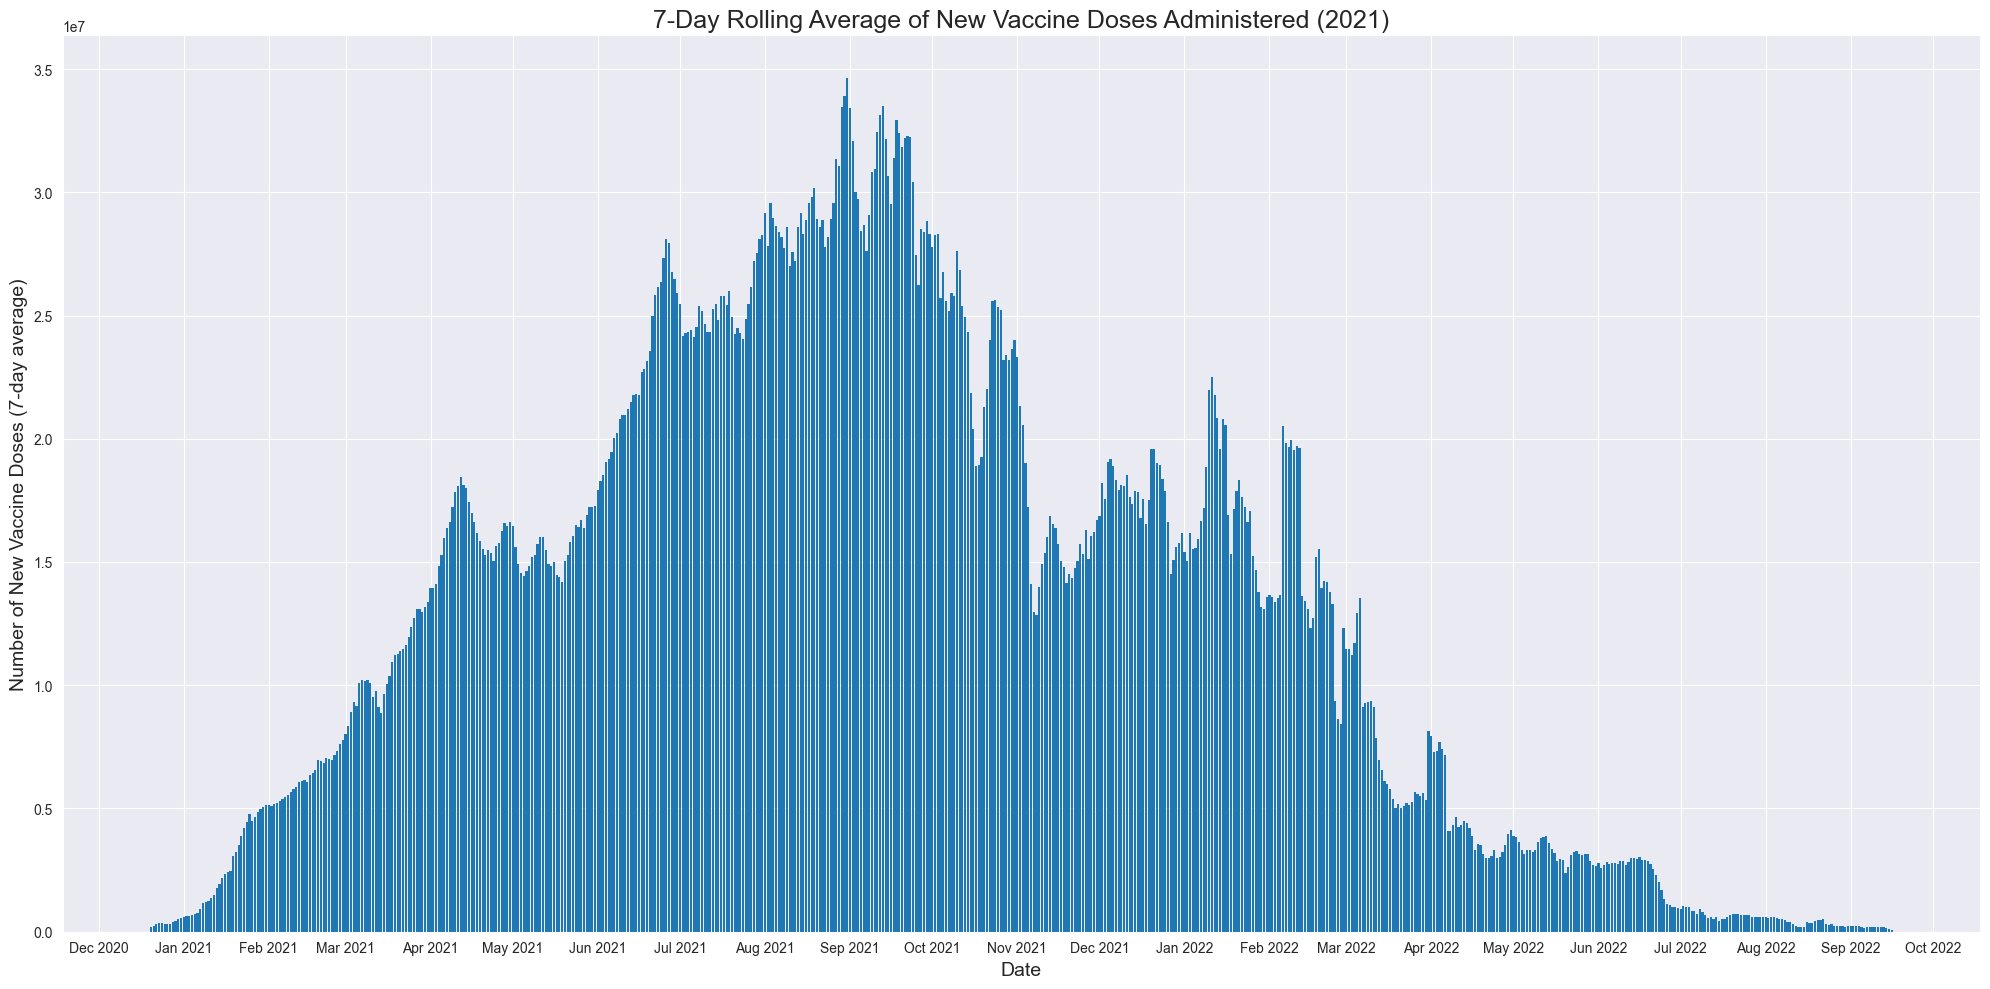

In [142]:
# Calculate 7-day rolling mean for vaccine doses administered
df_daily['rolling_mean_doses'] = df_daily['new_vaccine_doses_administered'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_doses'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New Vaccine Doses Administered (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Vaccine Doses (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

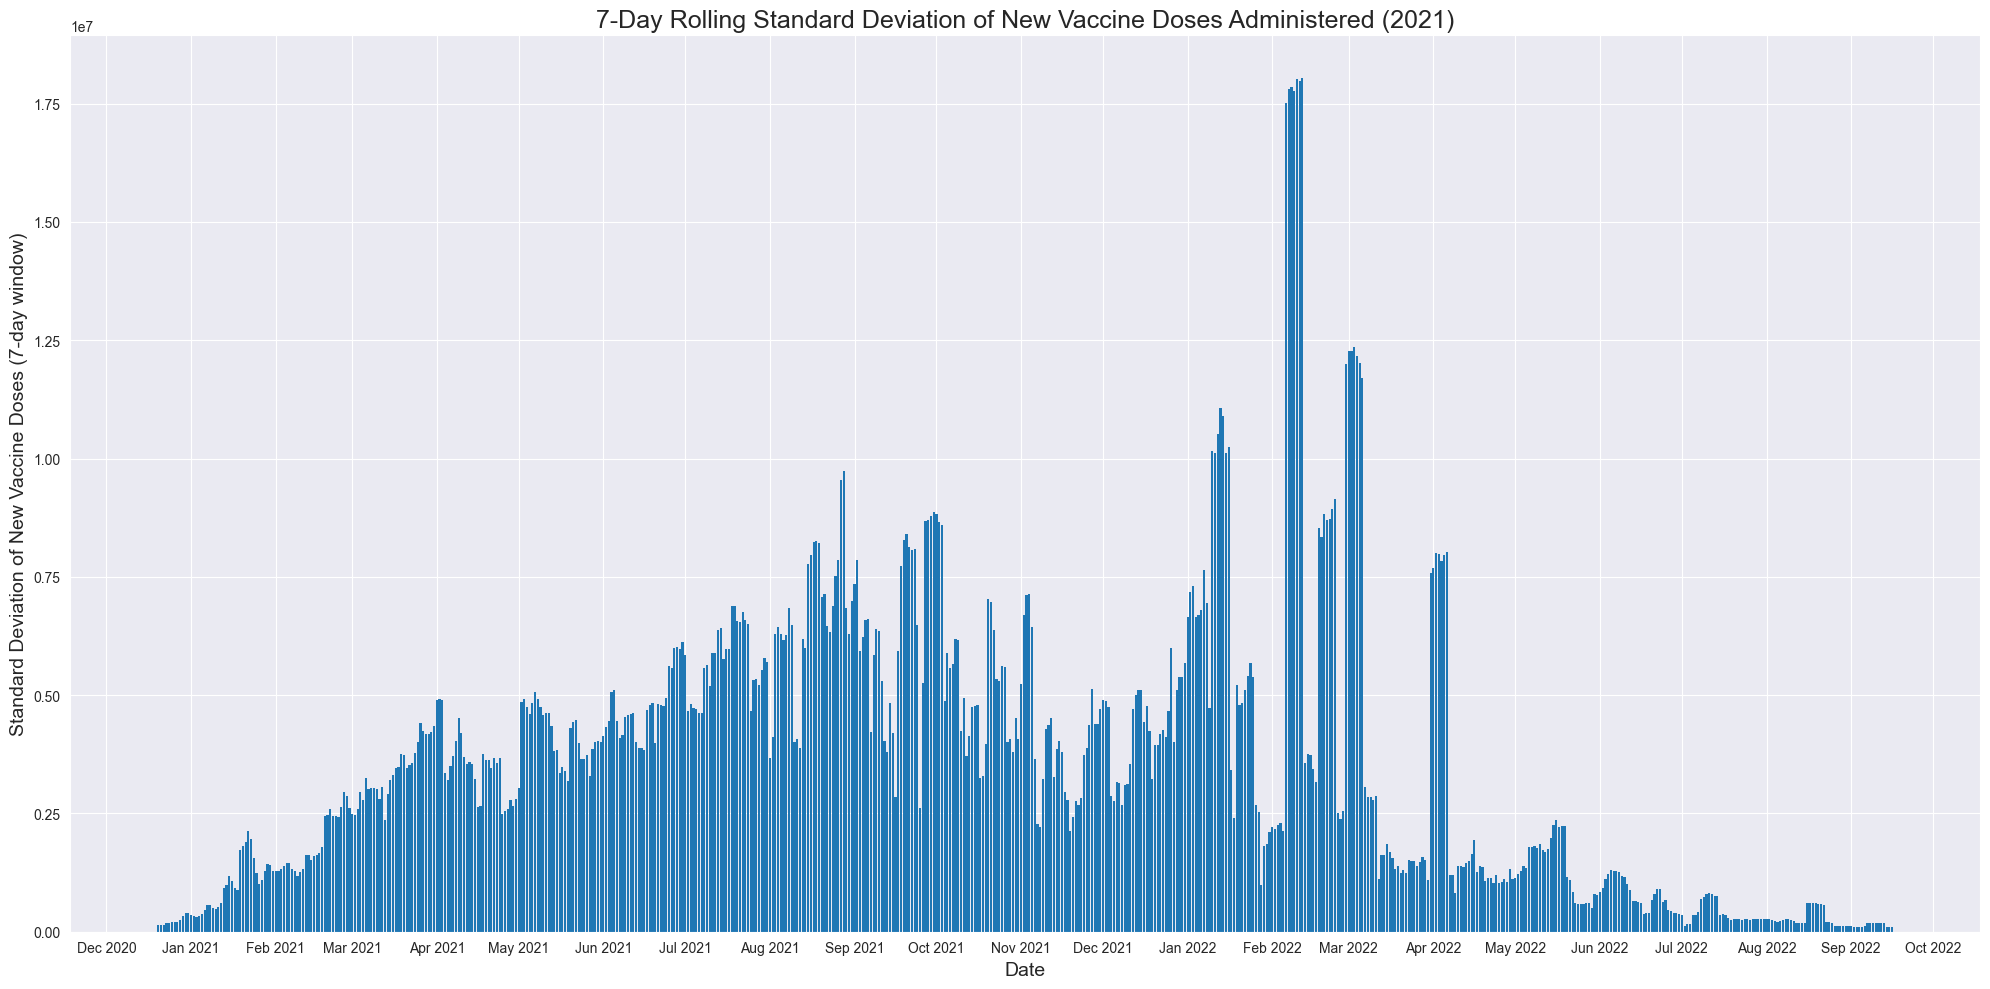

In [143]:
# Calculate 7-day rolling standard deviation for vaccine doses administered
df_daily['rolling_std_doses'] = df_daily['new_vaccine_doses_administered'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_doses'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New Vaccine Doses Administered (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Vaccine Doses (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


## Część 2

2.1 Analiza szeregu czasowego liczby nowych zachorowań

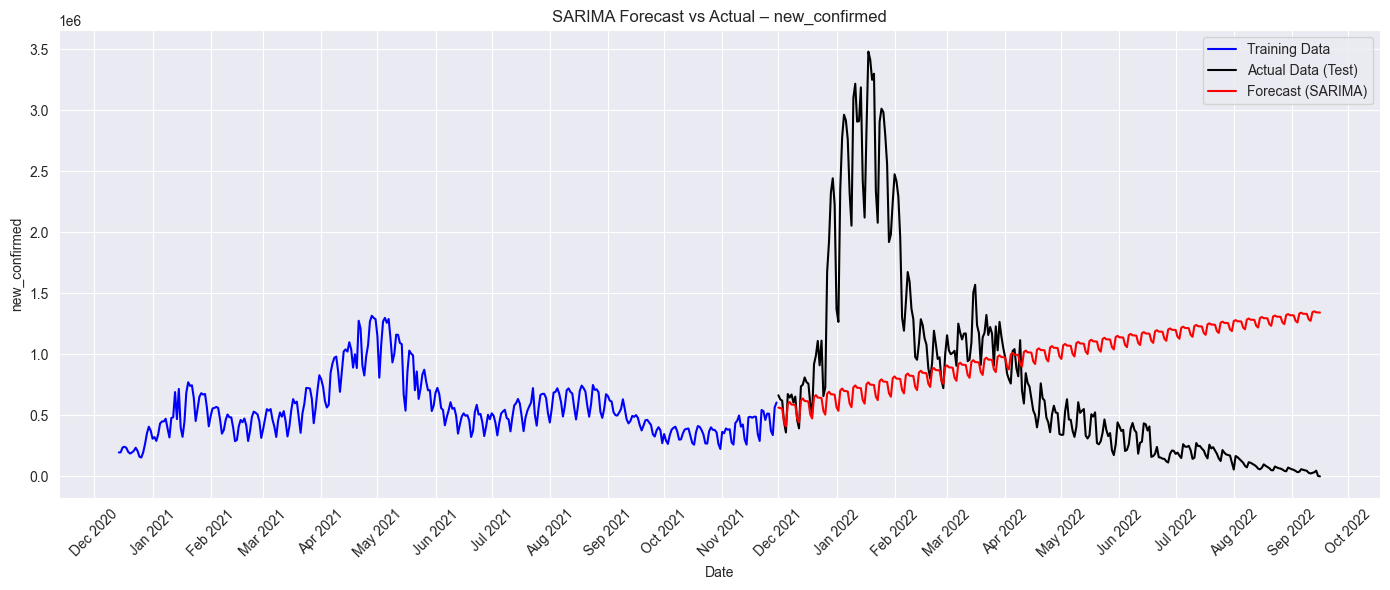

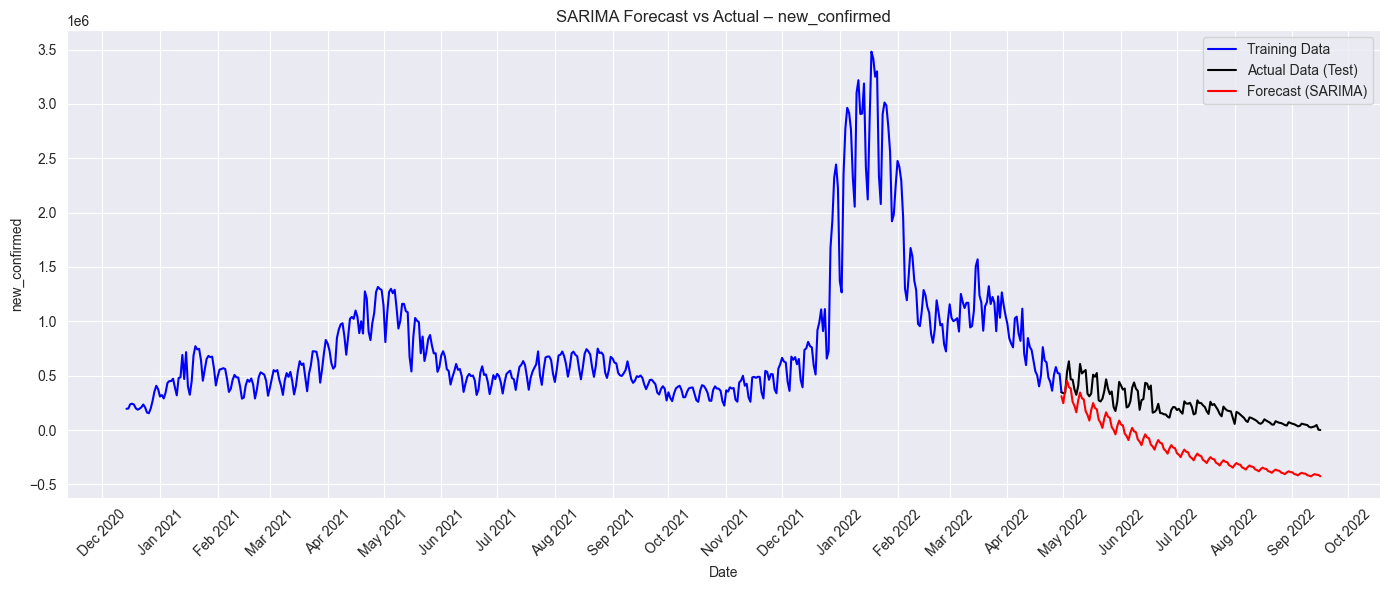

In [144]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# from pmdarima import auto_arima
#
# stepwise_model = auto_arima(
#     df_daily['new_confirmed'],
#     seasonal=True,
#     m=31,                # 7-dniowa sezonowość (tygodniowa)
#     trace=True,
#     suppress_warnings=True
# )
# stepwise_model.summary() # TODO: best (5,1,3)(1,0,1)[7]; (5,1,4)(0,0,0)[31]
feature = 'new_confirmed'


# Define date ranges
train_start = '2020-07-01'
train_end = '2021-12-01'
test_start = train_end
test_end = '2023-01-01'



# Split
train = df_daily[(df_daily.date >= train_start) & (df_daily.date < train_end)][['date', feature]]
test = df_daily[(df_daily.date >= test_start) & (df_daily.date < test_end)][['date', feature]]

model = SARIMAX(train[feature],
                order=(1,1,1),
                seasonal_order=(1,0,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast the same number of steps as test data length
n_periods = len(test)
forecast = results.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))
# Plot training data
plt.plot(train['date'], train[feature], label='Training Data', color='blue')
# Plot actual test data
plt.plot(test['date'], test[feature], label='Actual Data (Test)', color='black')

# Plot forecast
plt.plot(test['date'], forecast_values, label='Forecast (SARIMA)', color='red')



# Format x-axis to show month ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2021

plt.title(f'SARIMA Forecast vs Actual – {feature}')
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


train_start = '2020-07-01'
train_end = '2022-04-30'
test_start = train_end
test_end = '2023-01-01'

# Split
train = df_daily[(df_daily.date >= train_start) & (df_daily.date <= train_end)][['date', feature]]
test = df_daily[(df_daily.date >= test_start) & (df_daily.date <= test_end)][['date', feature]]

model = SARIMAX(train[feature],
                order=(1,1,1),
                seasonal_order=(1,0,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast the same number of steps as test data length
n_periods = len(test)
forecast = results.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(14,6))
# Plot training data
plt.plot(train['date'], train[feature], label='Training Data', color='blue')
# Plot actual test data
plt.plot(test['date'], test[feature], label='Actual Data (Test)', color='black')

# Plot forecast
plt.plot(test['date'], forecast_values, label='Forecast (SARIMA)', color='red')



# Format x-axis to show month ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2021

plt.title(f'SARIMA Forecast vs Actual – {feature}')
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2.2 Analiza szeregu czasowego liczby nowych śmierci

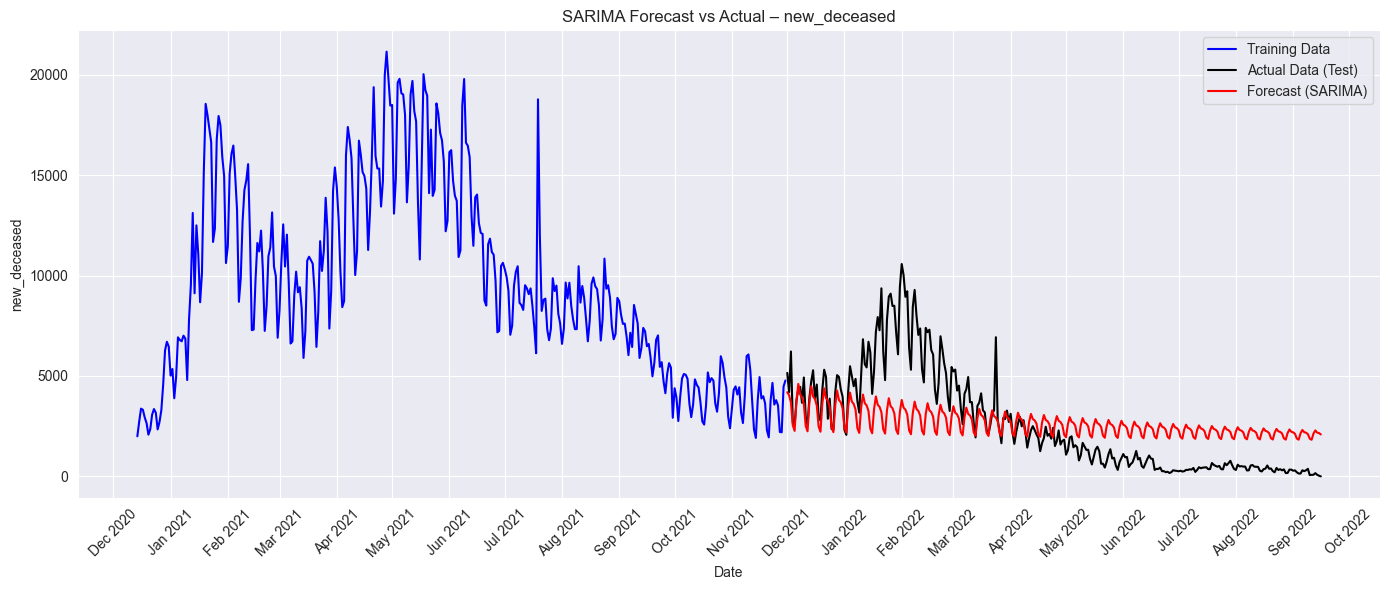

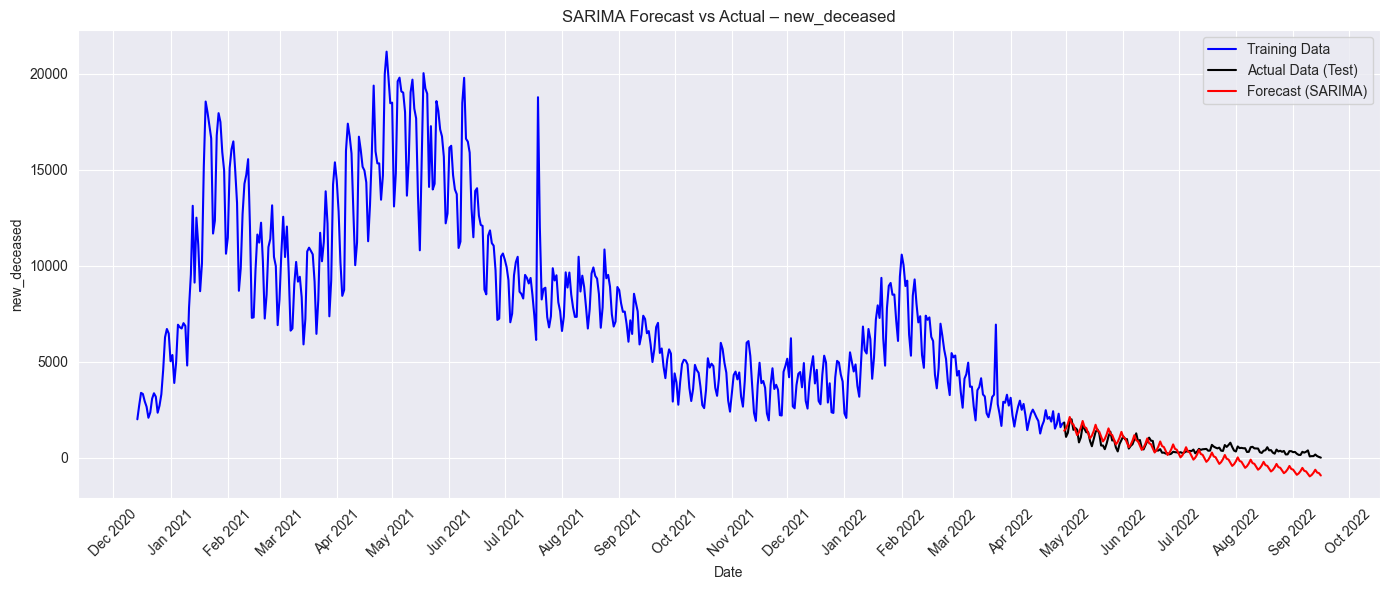

In [145]:
feature = 'new_deceased'


# Define date ranges
train_start = '2020-07-01'
train_end = '2021-12-01'
test_start = train_end
test_end = '2023-01-01'



# Split
train = df_daily[(df_daily.date >= train_start) & (df_daily.date < train_end)][['date', feature]]
test = df_daily[(df_daily.date >= test_start) & (df_daily.date < test_end)][['date', feature]]

model = SARIMAX(train[feature],
                order=(1,1,1),
                seasonal_order=(1,0,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast the same number of steps as test data length
n_periods = len(test)
forecast = results.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))
# Plot training data
plt.plot(train['date'], train[feature], label='Training Data', color='blue')
# Plot actual test data
plt.plot(test['date'], test[feature], label='Actual Data (Test)', color='black')

# Plot forecast
plt.plot(test['date'], forecast_values, label='Forecast (SARIMA)', color='red')



# Format x-axis to show month ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2021

plt.title(f'SARIMA Forecast vs Actual – {feature}')
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


train_start = '2020-07-01'
train_end = '2022-04-30'
test_start = train_end
test_end = '2023-01-01'

# Split
train = df_daily[(df_daily.date >= train_start) & (df_daily.date <= train_end)][['date', feature]]
test = df_daily[(df_daily.date >= test_start) & (df_daily.date <= test_end)][['date', feature]]

model = SARIMAX(train[feature],
                order=(1,1,1),
                seasonal_order=(1,0,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast the same number of steps as test data length
n_periods = len(test)
forecast = results.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(14,6))
# Plot training data
plt.plot(train['date'], train[feature], label='Training Data', color='blue')
# Plot actual test data
plt.plot(test['date'], test[feature], label='Actual Data (Test)', color='black')

# Plot forecast
plt.plot(test['date'], forecast_values, label='Forecast (SARIMA)', color='red')



# Format x-axis to show month ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2021

plt.title(f'SARIMA Forecast vs Actual – {feature}')
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2.3 Analiza szeregu czasowego liczby nowych szczepień

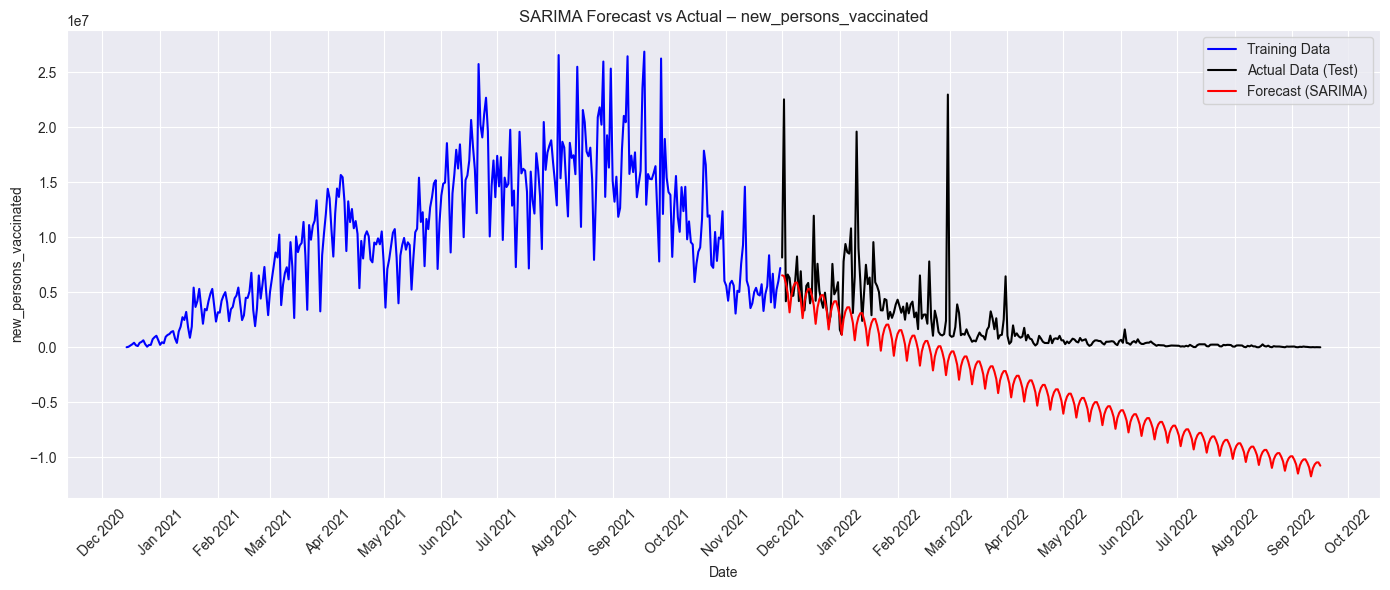

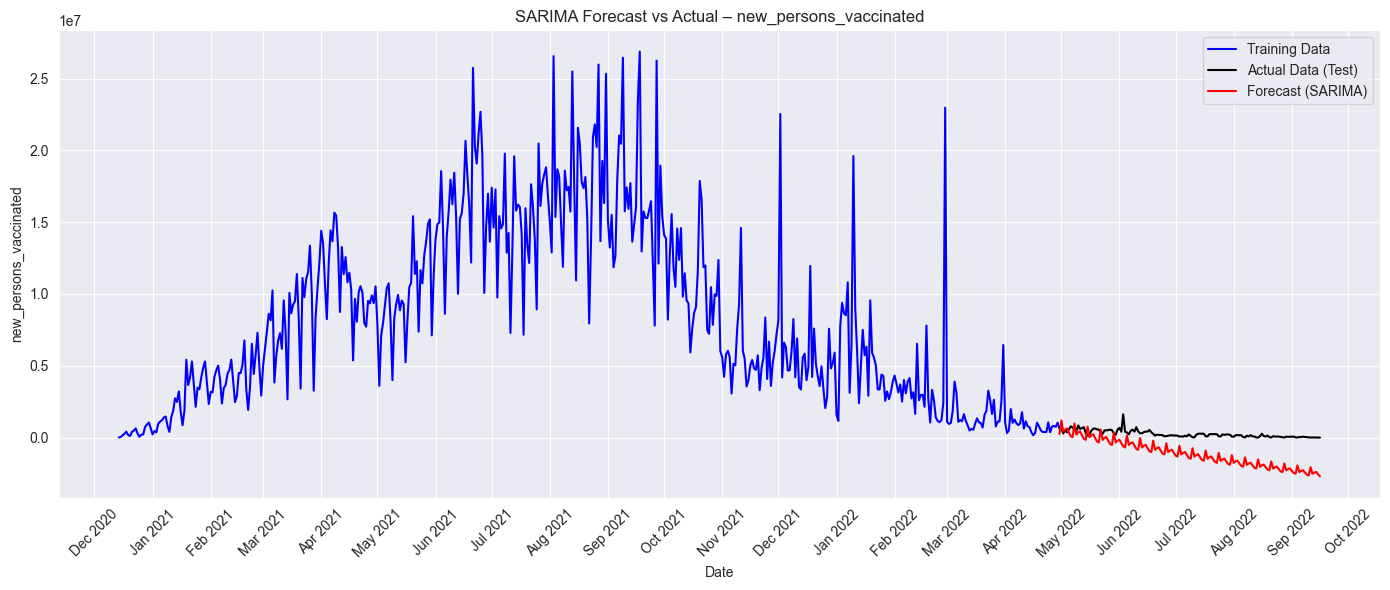

In [146]:
feature = 'new_persons_vaccinated'


# Define date ranges
train_start = '2020-07-01'
train_end = '2021-12-01'
test_start = train_end
test_end = '2023-01-01'



# Split
train = df_daily[(df_daily.date >= train_start) & (df_daily.date < train_end)][['date', feature]]
test = df_daily[(df_daily.date >= test_start) & (df_daily.date < test_end)][['date', feature]]

model = SARIMAX(train[feature],
                order=(1,1,1),
                seasonal_order=(1,0,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast the same number of steps as test data length
n_periods = len(test)
forecast = results.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))
# Plot training data
plt.plot(train['date'], train[feature], label='Training Data', color='blue')
# Plot actual test data
plt.plot(test['date'], test[feature], label='Actual Data (Test)', color='black')

# Plot forecast
plt.plot(test['date'], forecast_values, label='Forecast (SARIMA)', color='red')



# Format x-axis to show month ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2021

plt.title(f'SARIMA Forecast vs Actual – {feature}')
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


train_start = '2020-07-01'
train_end = '2022-04-30'
test_start = train_end
test_end = '2023-01-01'

# Split
train = df_daily[(df_daily.date >= train_start) & (df_daily.date <= train_end)][['date', feature]]
test = df_daily[(df_daily.date >= test_start) & (df_daily.date <= test_end)][['date', feature]]

model = SARIMAX(train[feature],
                order=(1,1,1),
                seasonal_order=(1,0,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast the same number of steps as test data length
n_periods = len(test)
forecast = results.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(14,6))
# Plot training data
plt.plot(train['date'], train[feature], label='Training Data', color='blue')
# Plot actual test data
plt.plot(test['date'], test[feature], label='Actual Data (Test)', color='black')

# Plot forecast
plt.plot(test['date'], forecast_values, label='Forecast (SARIMA)', color='red')



# Format x-axis to show month ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2021

plt.title(f'SARIMA Forecast vs Actual – {feature}')
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2.4 Analiza szeregu czasowego liczby osób w pełni zaszczepionych

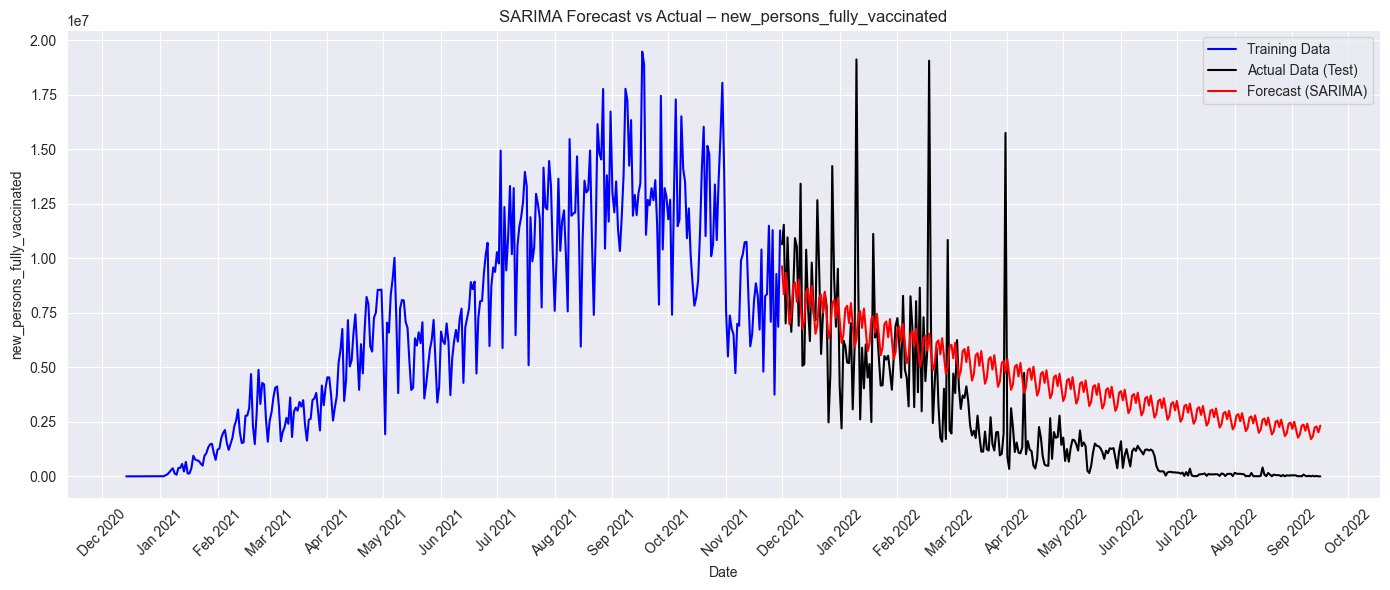

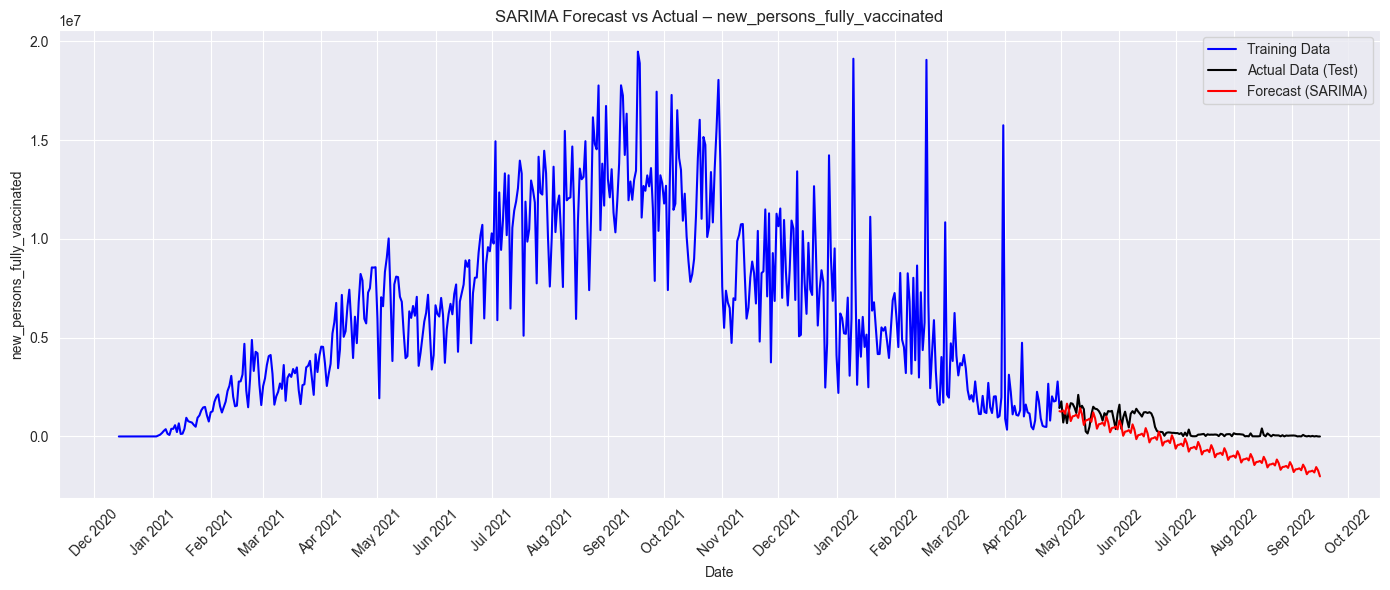

In [147]:
feature = 'new_persons_fully_vaccinated'


# Define date ranges
train_start = '2020-07-01'
train_end = '2021-12-01'
test_start = train_end
test_end = '2023-01-01'



# Split
train = df_daily[(df_daily.date >= train_start) & (df_daily.date < train_end)][['date', feature]]
test = df_daily[(df_daily.date >= test_start) & (df_daily.date < test_end)][['date', feature]]

model = SARIMAX(train[feature],
                order=(1,1,1),
                seasonal_order=(1,0,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast the same number of steps as test data length
n_periods = len(test)
forecast = results.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))
# Plot training data
plt.plot(train['date'], train[feature], label='Training Data', color='blue')
# Plot actual test data
plt.plot(test['date'], test[feature], label='Actual Data (Test)', color='black')

# Plot forecast
plt.plot(test['date'], forecast_values, label='Forecast (SARIMA)', color='red')



# Format x-axis to show month ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2021

plt.title(f'SARIMA Forecast vs Actual – {feature}')
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


train_start = '2020-07-01'
train_end = '2022-04-30'
test_start = train_end
test_end = '2023-01-01'

# Split
train = df_daily[(df_daily.date >= train_start) & (df_daily.date <= train_end)][['date', feature]]
test = df_daily[(df_daily.date >= test_start) & (df_daily.date <= test_end)][['date', feature]]

model = SARIMAX(train[feature],
                order=(1,1,1),
                seasonal_order=(1,0,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast the same number of steps as test data length
n_periods = len(test)
forecast = results.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(14,6))
# Plot training data
plt.plot(train['date'], train[feature], label='Training Data', color='blue')
# Plot actual test data
plt.plot(test['date'], test[feature], label='Actual Data (Test)', color='black')

# Plot forecast
plt.plot(test['date'], forecast_values, label='Forecast (SARIMA)', color='red')



# Format x-axis to show month ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2021

plt.title(f'SARIMA Forecast vs Actual – {feature}')
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2.5 Analiza szeregu czasowego liczby zaaplikowanych szczepionek

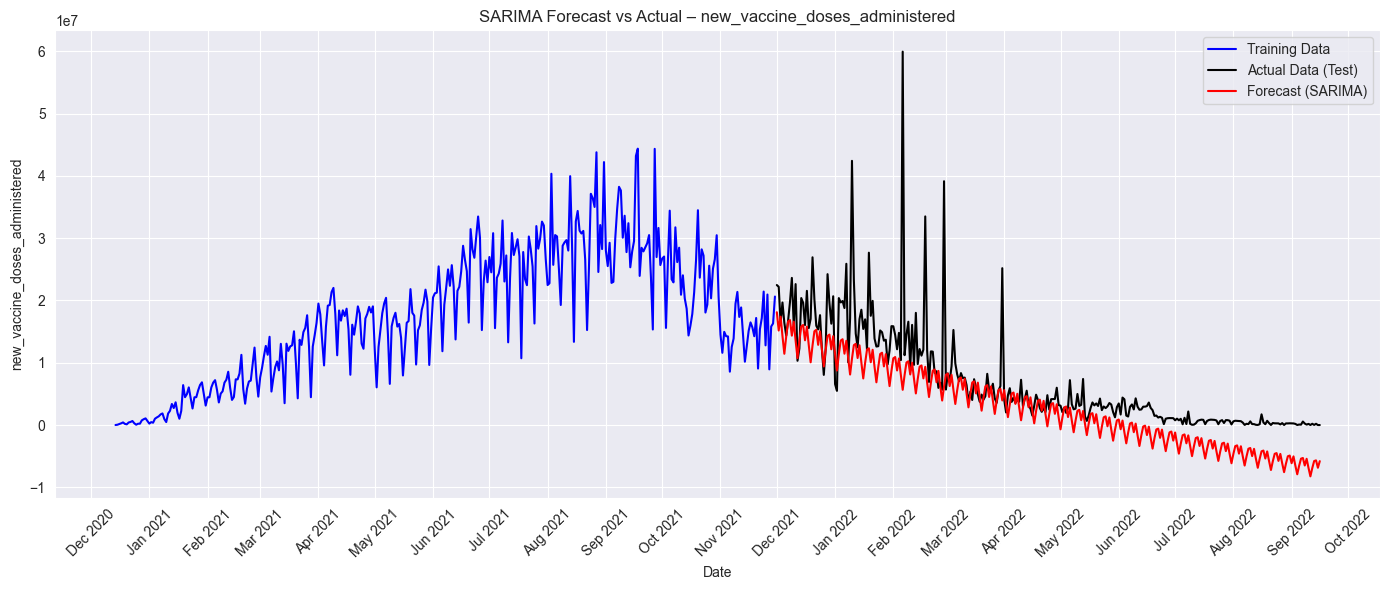

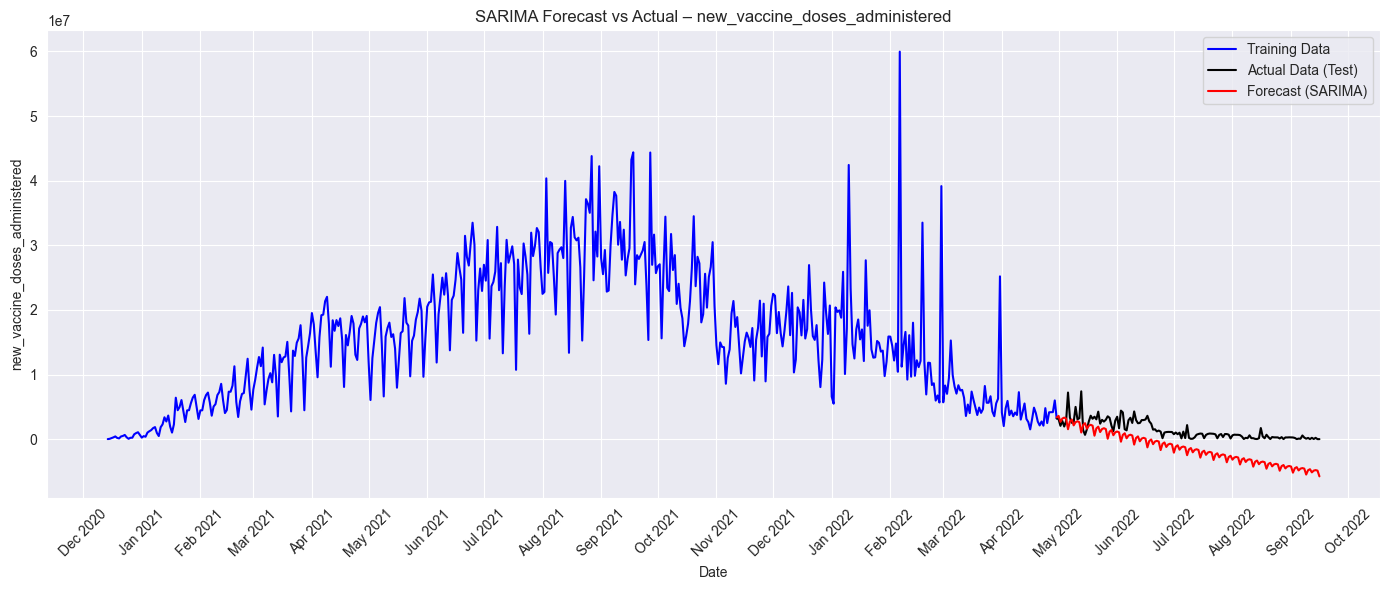

In [148]:
feature = 'new_vaccine_doses_administered'


# Define date ranges
train_start = '2020-07-01'
train_end = '2021-12-01'
test_start = train_end
test_end = '2023-01-01'



# Split
train = df_daily[(df_daily.date >= train_start) & (df_daily.date < train_end)][['date', feature]]
test = df_daily[(df_daily.date >= test_start) & (df_daily.date < test_end)][['date', feature]]

model = SARIMAX(train[feature],
                order=(1,1,1),
                seasonal_order=(1,0,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast the same number of steps as test data length
n_periods = len(test)
forecast = results.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14,6))
# Plot training data
plt.plot(train['date'], train[feature], label='Training Data', color='blue')
# Plot actual test data
plt.plot(test['date'], test[feature], label='Actual Data (Test)', color='black')

# Plot forecast
plt.plot(test['date'], forecast_values, label='Forecast (SARIMA)', color='red')



# Format x-axis to show month ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2021

plt.title(f'SARIMA Forecast vs Actual – {feature}')
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


train_start = '2020-07-01'
train_end = '2022-04-30'
test_start = train_end
test_end = '2023-01-01'

# Split
train = df_daily[(df_daily.date >= train_start) & (df_daily.date <= train_end)][['date', feature]]
test = df_daily[(df_daily.date >= test_start) & (df_daily.date <= test_end)][['date', feature]]

model = SARIMAX(train[feature],
                order=(1,1,1),
                seasonal_order=(1,0,1,7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Forecast the same number of steps as test data length
n_periods = len(test)
forecast = results.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(14,6))
# Plot training data
plt.plot(train['date'], train[feature], label='Training Data', color='blue')
# Plot actual test data
plt.plot(test['date'], test[feature], label='Actual Data (Test)', color='black')

# Plot forecast
plt.plot(test['date'], forecast_values, label='Forecast (SARIMA)', color='red')



# Format x-axis to show month ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format: Jan 2021

plt.title(f'SARIMA Forecast vs Actual – {feature}')
plt.xlabel('Date')
plt.ylabel(feature)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Część 3

3.1 Liczba nowych zachorowań

Training Data Metrics:
MAE: 171355.21
MSE: 53246702166.14
R²: 0.03

Future Data Metrics:
MAE: 569165.87
MSE: 752070744492.99
R²: -0.12


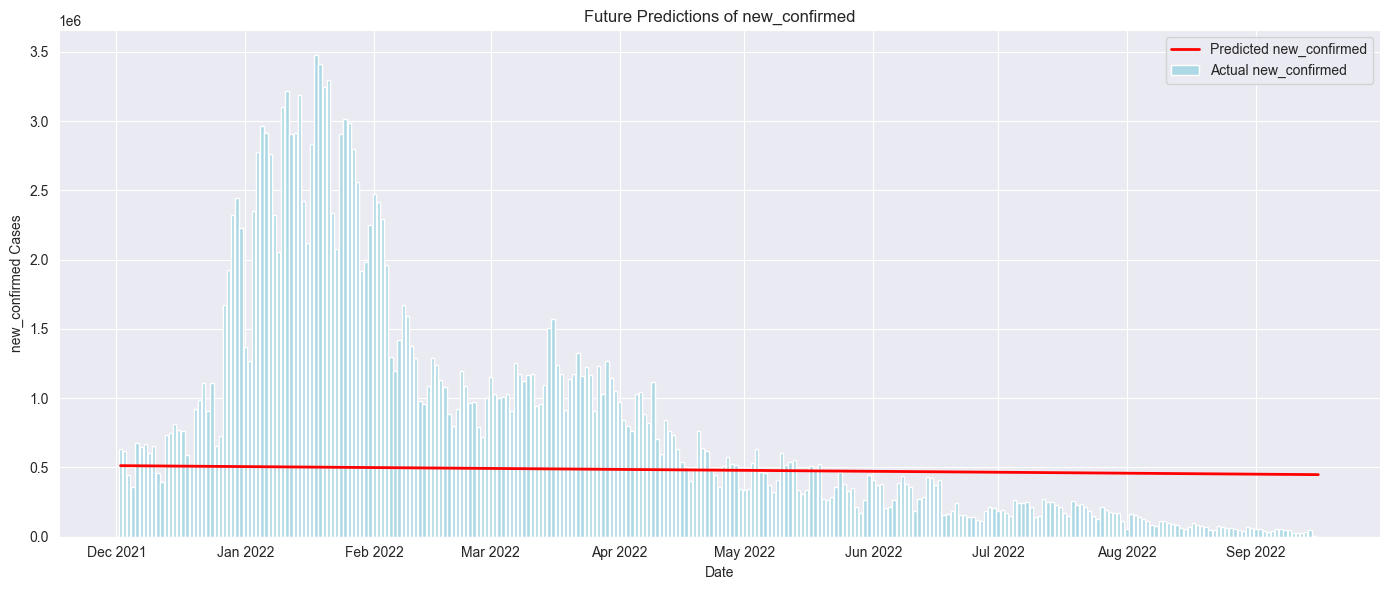


Analysis with shorter time periods (quarterly):
Training Quarter 2020Q4 - R²: -18.21 - MSE: 539923199.33 - MAE: 20988.67
Future Quarter 2021Q1 - R²: -0.86 - MSE: 88209070259.81 - MAE: 250272.49 


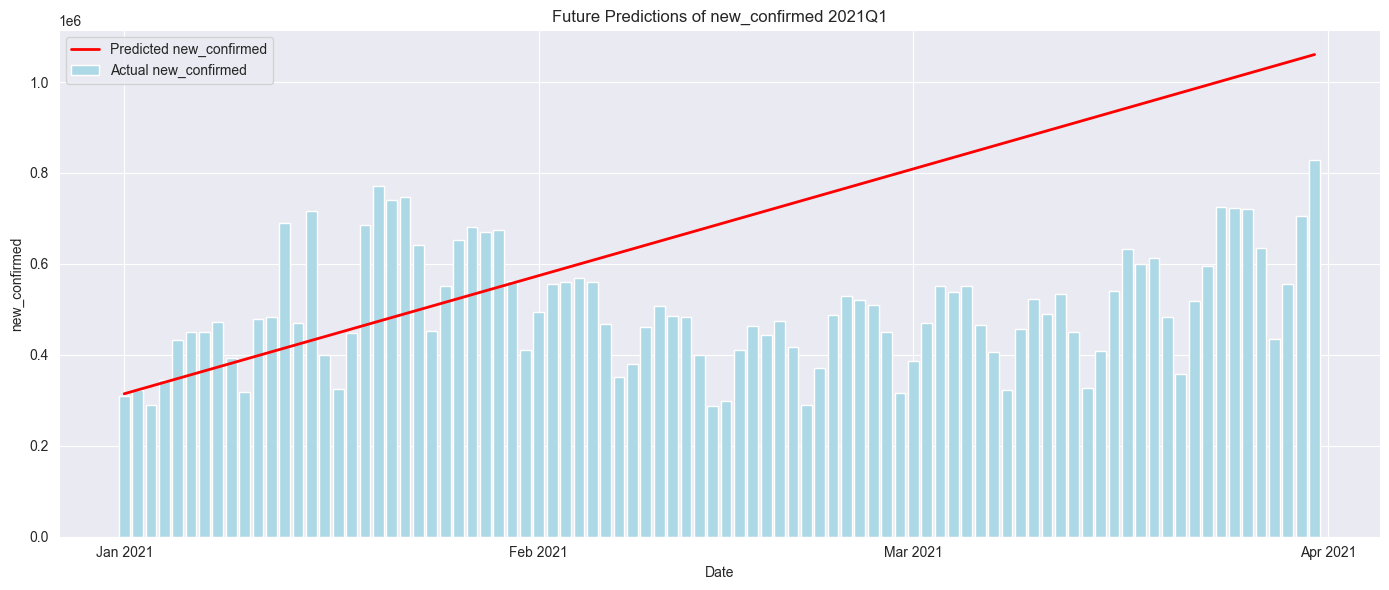

Training Quarter 2021Q1 - R²: -0.23 - MSE: 17854832215.01 - MAE: 102909.61
Future Quarter 2021Q2 - R²: -105.31 - MSE: 126917075508.33 - MAE: 294122.27 


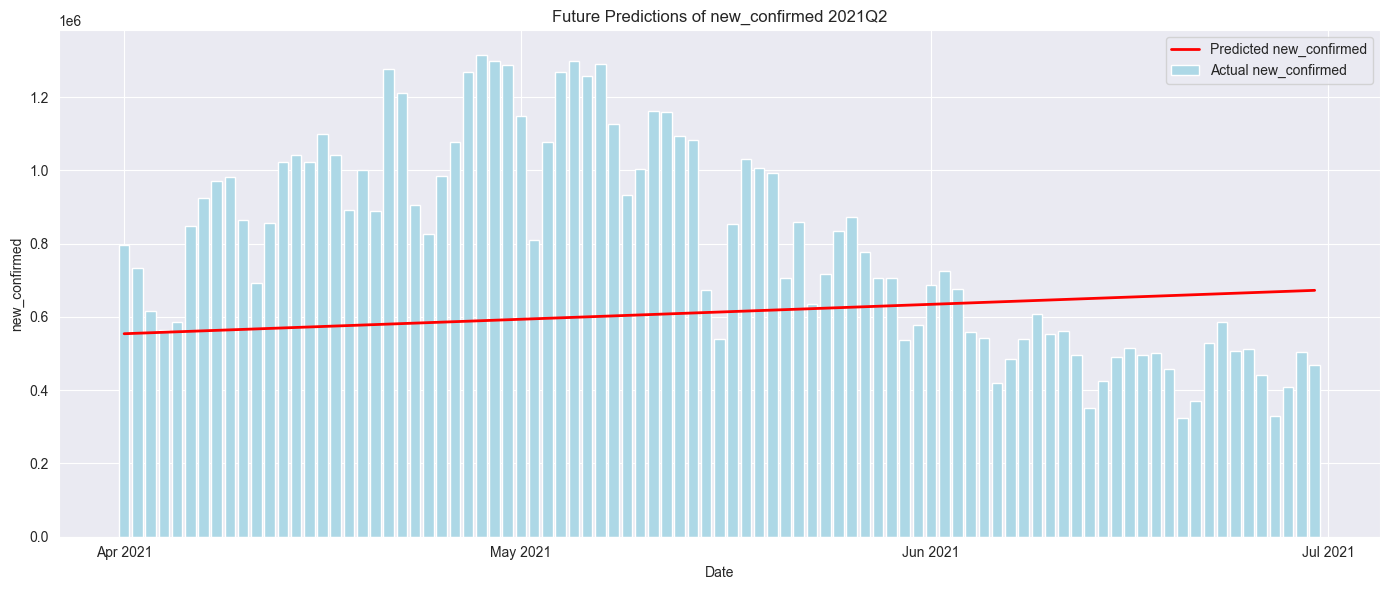

Training Quarter 2021Q2 - R²: 0.18 - MSE: 63178536797.19 - MAE: 200173.89
Future Quarter 2021Q3 - R²: -4.78 - MSE: 226280643918.15 - MAE: 431670.30 


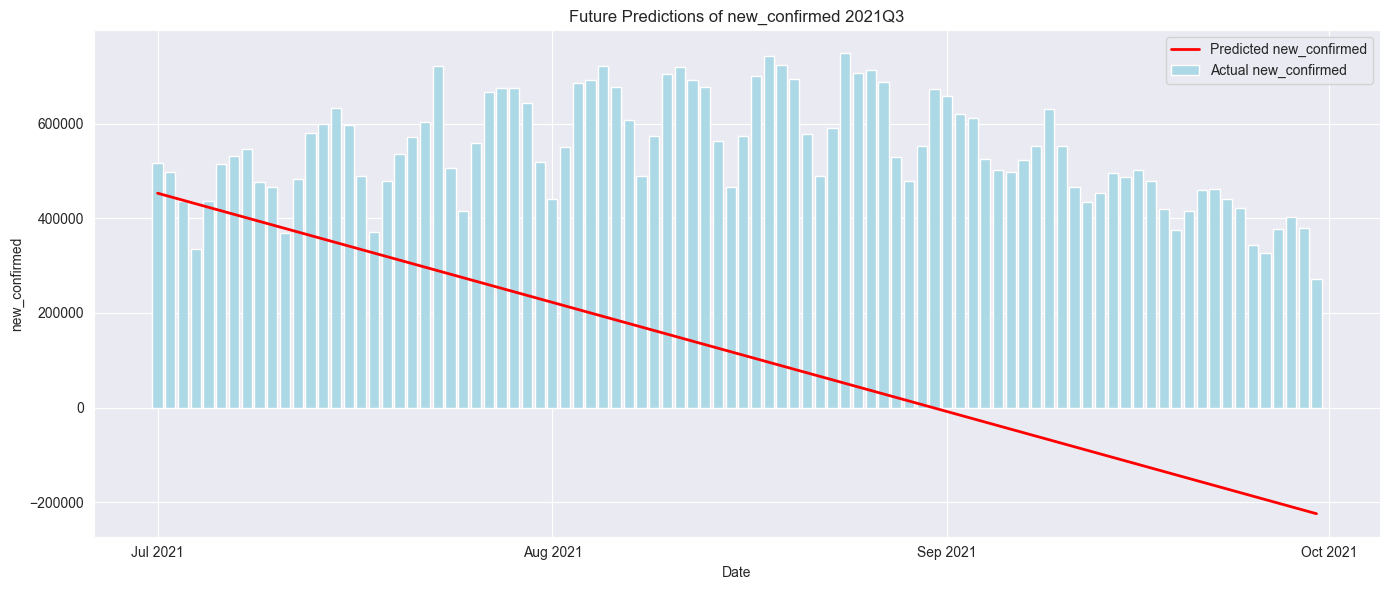

Training Quarter 2021Q3 - R²: -0.10 - MSE: 15025296767.15 - MAE: 104830.71
Future Quarter 2021Q4 - R²: -280.43 - MSE: 209219474770.37 - MAE: 248227.20 


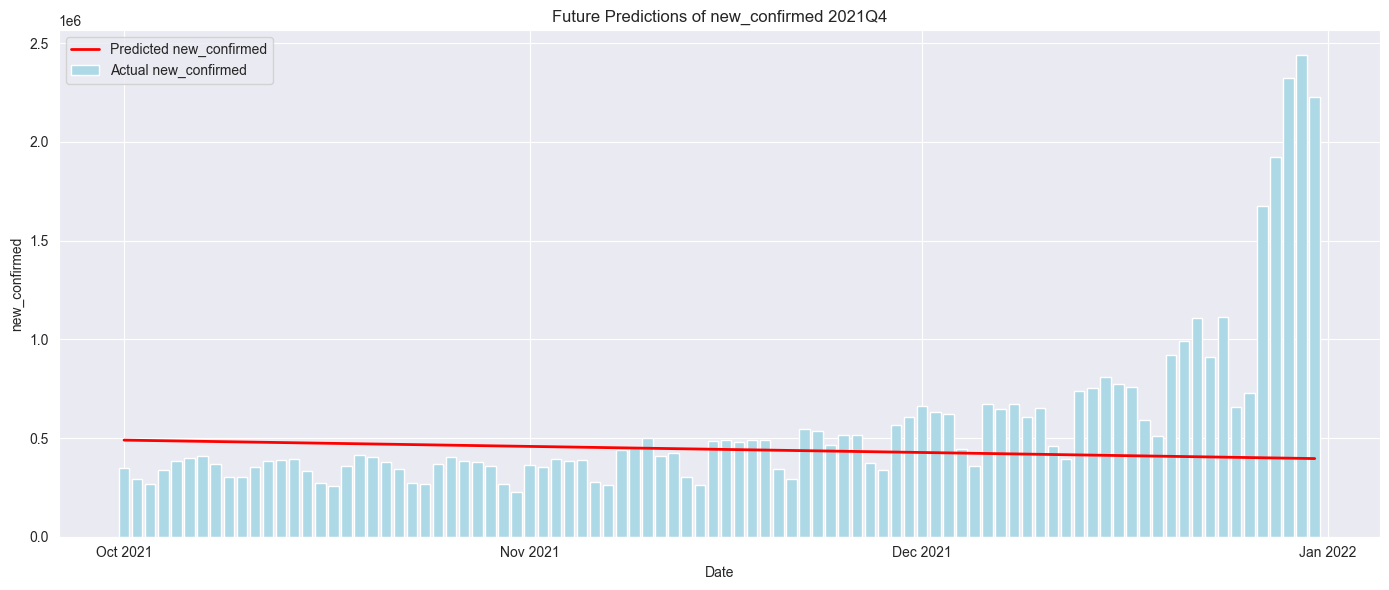

Training Quarter 2021Q4 - R²: 0.39 - MSE: 120338074394.98 - MAE: 197379.27
Future Quarter 2022Q1 - R²: -13.71 - MSE: 1091717635426.95 - MAE: 887159.05 


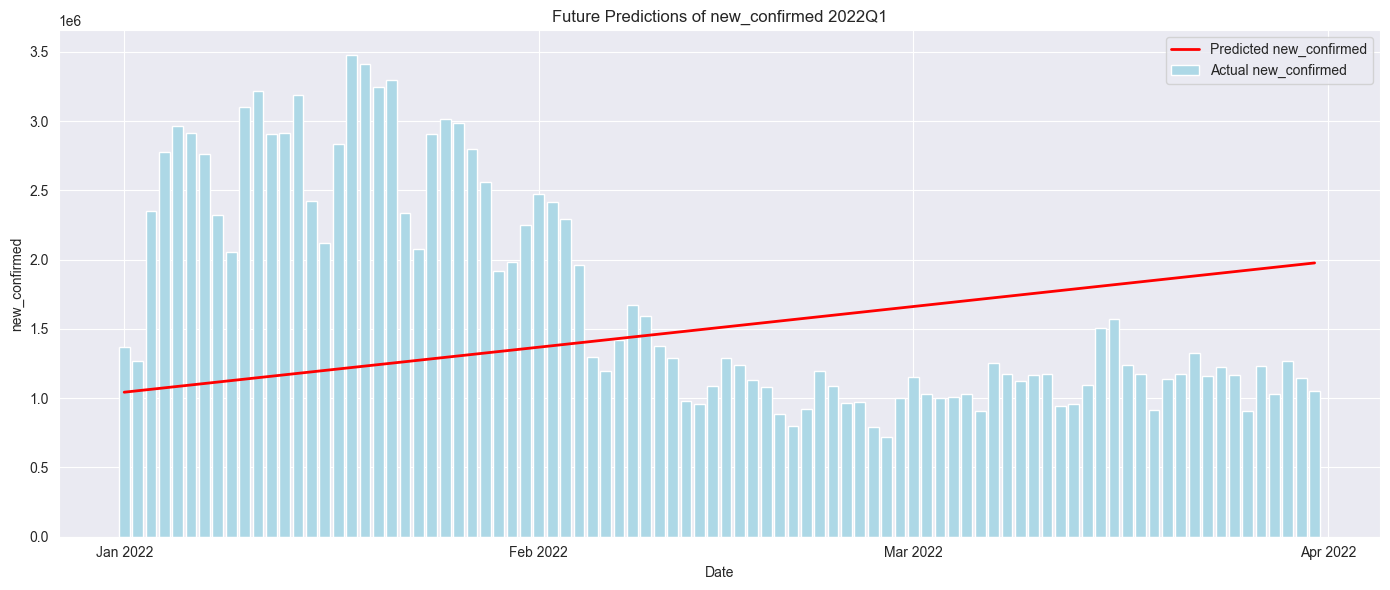

Training Quarter 2022Q1 - R²: 0.52 - MSE: 349166563441.85 - MAE: 488401.81
Future Quarter 2022Q2 - R²: -1.44 - MSE: 925261686790.24 - MAE: 852639.31 


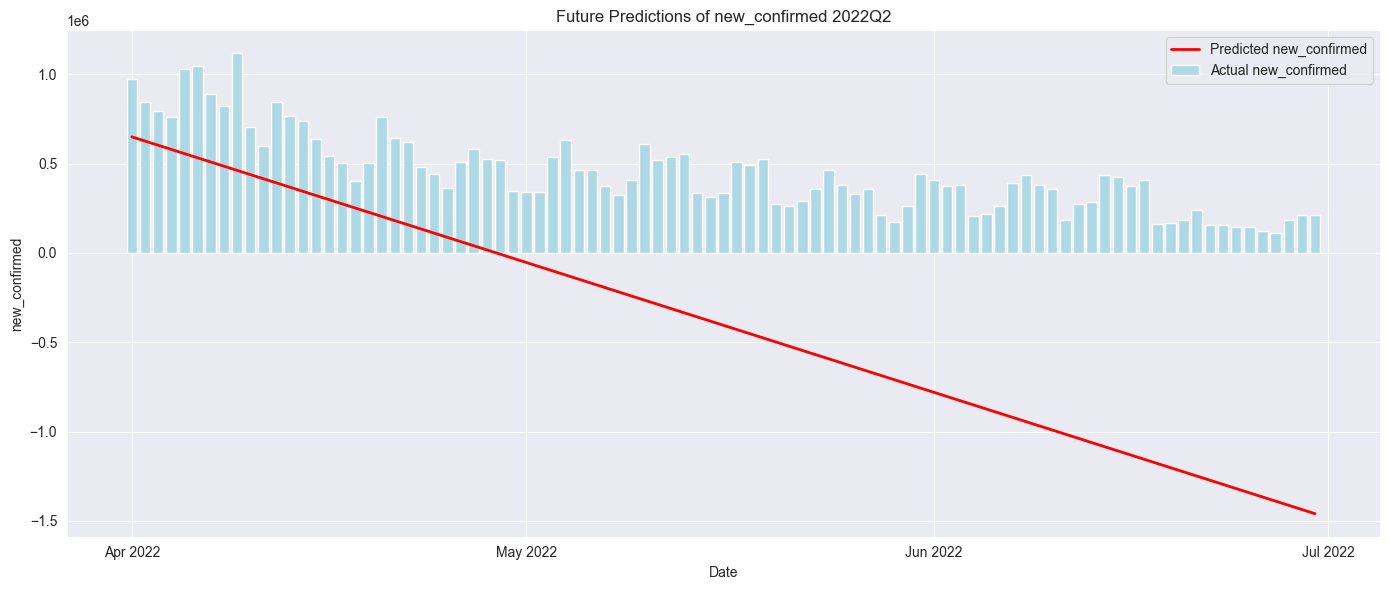

Training Quarter 2022Q2 - R²: 0.75 - MSE: 13731200046.47 - MAE: 93390.96
Future Quarter 2022Q3 - R²: -2.17 - MSE: 77846603216.50 - MAE: 262156.72 


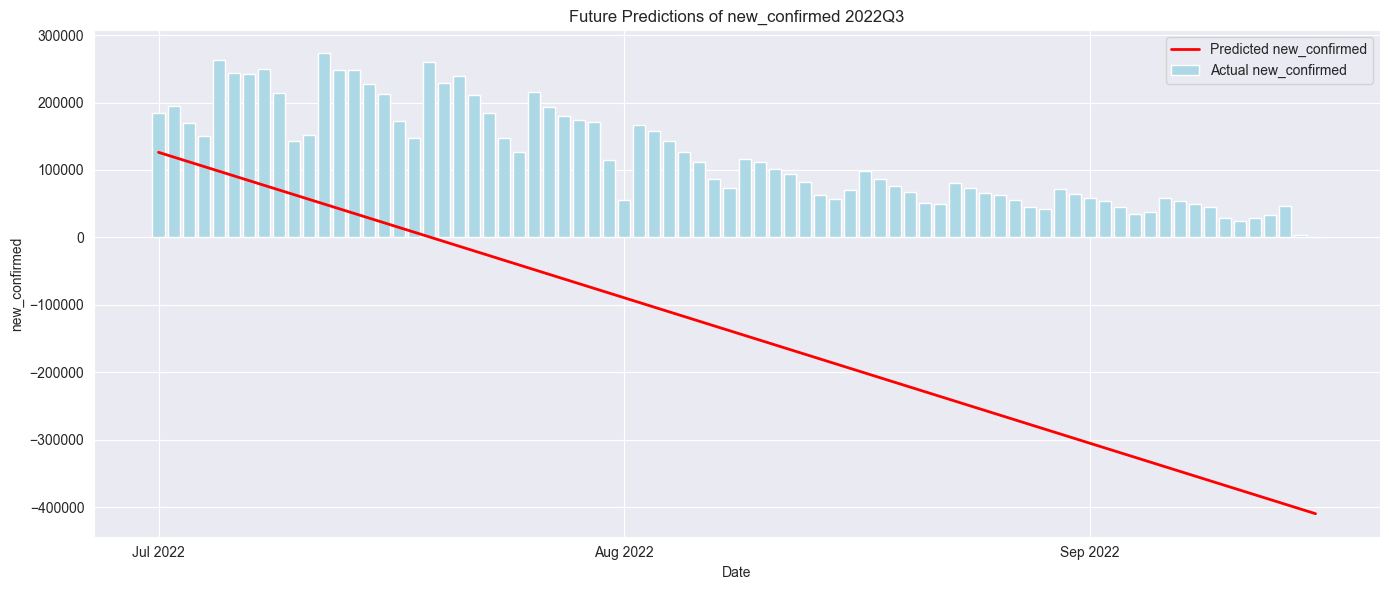

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature = 'new_confirmed'

train_start = '2020-07-01'
train_end = '2021-12-01'
test_start = train_end
test_end = '2023-01-01'

def part3_func(feature, train_start, train_end, test_start, test_end):

    # Linear regression for new confirmed cases
    df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
    df1 = df_daily[(df_daily['date'] > train_start) & (df_daily['date'] < train_end)][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
    df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)
    # Train the model
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1[feature], test_size=0.2)
    model.fit(X_train, y_train)

    # Evaluate on test data
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Training Data Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.2f}")

    # Predict future values
    df2 = df_daily[(df_daily['date'] > test_start) & (df_daily['date'] < test_end)]
    X_future, y_future = df2[['data_num']], df2[feature]

    y_future_pred = model.predict(X_future)
    mse = mean_squared_error(y_future, y_future_pred)
    mae = mean_absolute_error(y_future, y_future_pred)
    r2 = r2_score(y_future, y_future_pred)
    print(f"\nFuture Data Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.2f}")

    # Plot
    ax, fig = plt.subplots(figsize=(14, 6))
    plt.bar(df2['date'], df2[feature], color='lightblue', label=f'Actual {feature}')
    plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
    plt.xlabel('Date')
    plt.ylabel(f'{feature} Cases')
    plt.title(f'Future Predictions of {feature}')
    plt.legend()
    fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.tight_layout()
    plt.show()

    # Analysis with shorter time periods
    print("\nAnalysis with shorter time periods (quarterly):")
    quarters = df_daily['Q'].unique()
    training_quarters = quarters[:-1]
    future_quarters = quarters[1:]
    for quarter, future_quarter in zip(training_quarters, future_quarters):
        quarter_data = df_daily[df_daily['Q'] == quarter]
        future_quarter_data = df_daily[df_daily['Q'] == future_quarter]
        if len(quarter_data) > 10 and len(future_quarter_data) > 10:  # Ensure enough data points
            X = quarter_data[['data_num']]
            y = quarter_data[feature]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            print(f"Training Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f}")
            y_future_pred = model.predict(future_quarter_data[['data_num']])
            r2 = r2_score(y_future_pred, future_quarter_data[feature])
            mse = mean_squared_error(y_future_pred, future_quarter_data[feature])
            mae = mean_absolute_error(y_future_pred, future_quarter_data[feature])
            print(f"Future Quarter {future_quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f} ")

            fig, ax = plt.subplots(figsize=(14, 6))
            plt.bar(df_daily['date'][df_daily['Q'] == future_quarter], df_daily[feature][df_daily['Q'] == future_quarter], color='lightblue', label=f'Actual {feature}')
            plt.plot(df_daily['date'][df_daily['Q'] == future_quarter], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
            ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
            plt.xlabel('Date')
            plt.ylabel(f'{feature}')
            plt.title(f'Future Predictions of {feature} {future_quarter}')
            plt.legend()
            plt.tight_layout()
            plt.show()
part3_func(feature, train_start, train_end, test_start, test_end)

3.2 Liczba nowych śmierci

Training Data Metrics:
MAE: 2908.70
MSE: 13895695.25
R²: 0.22

Future Data Metrics:
MAE: 1611.05
MSE: 3378621.36
R²: 0.46


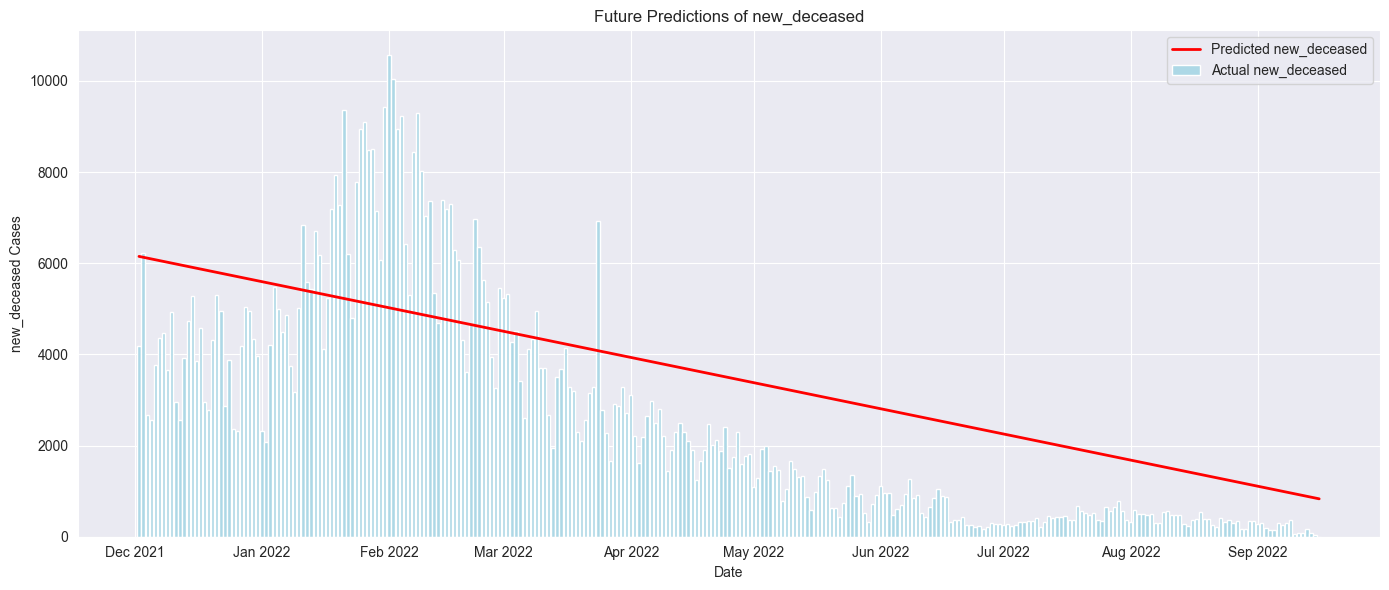


Analysis with shorter time periods (quarterly):
Training Quarter 2020Q4 - R²: -0.85 - MSE: 280557.36 - MAE: 416.43
Future Quarter 2021Q1 - R²: -1.02 - MSE: 67603477.62 - MAE: 6609.58 


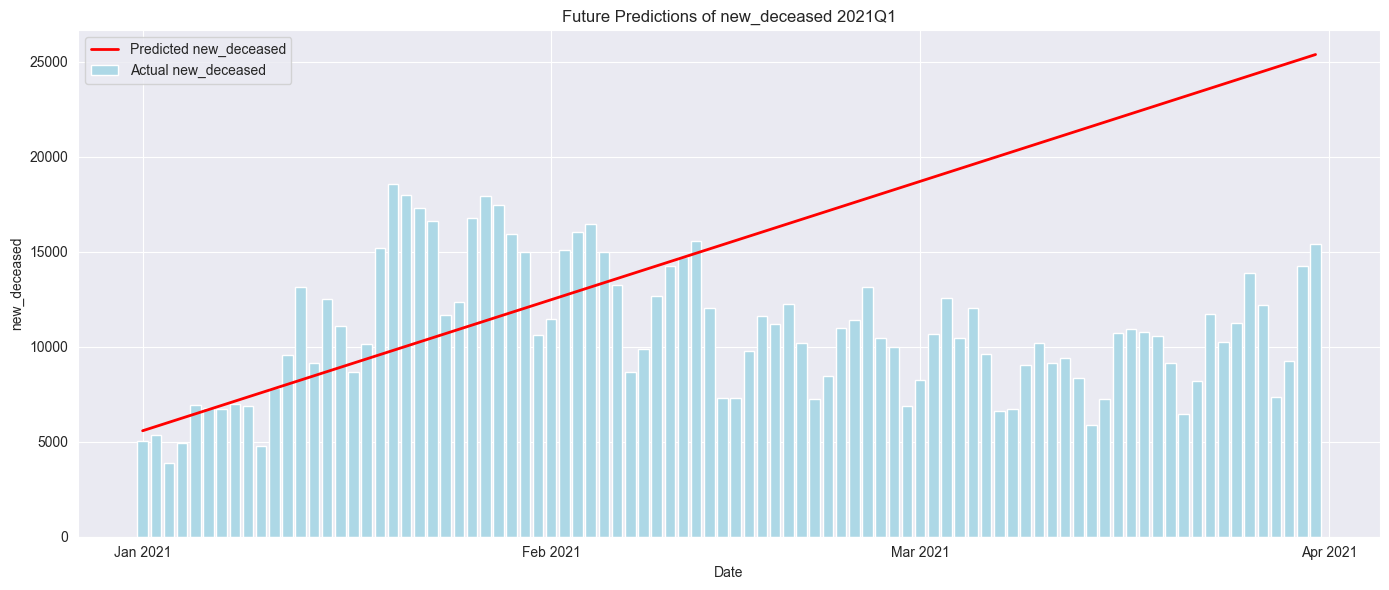

Training Quarter 2021Q1 - R²: -0.05 - MSE: 15680940.87 - MAE: 3533.76
Future Quarter 2021Q2 - R²: -2171.12 - MSE: 25219034.10 - MAE: 4198.33 


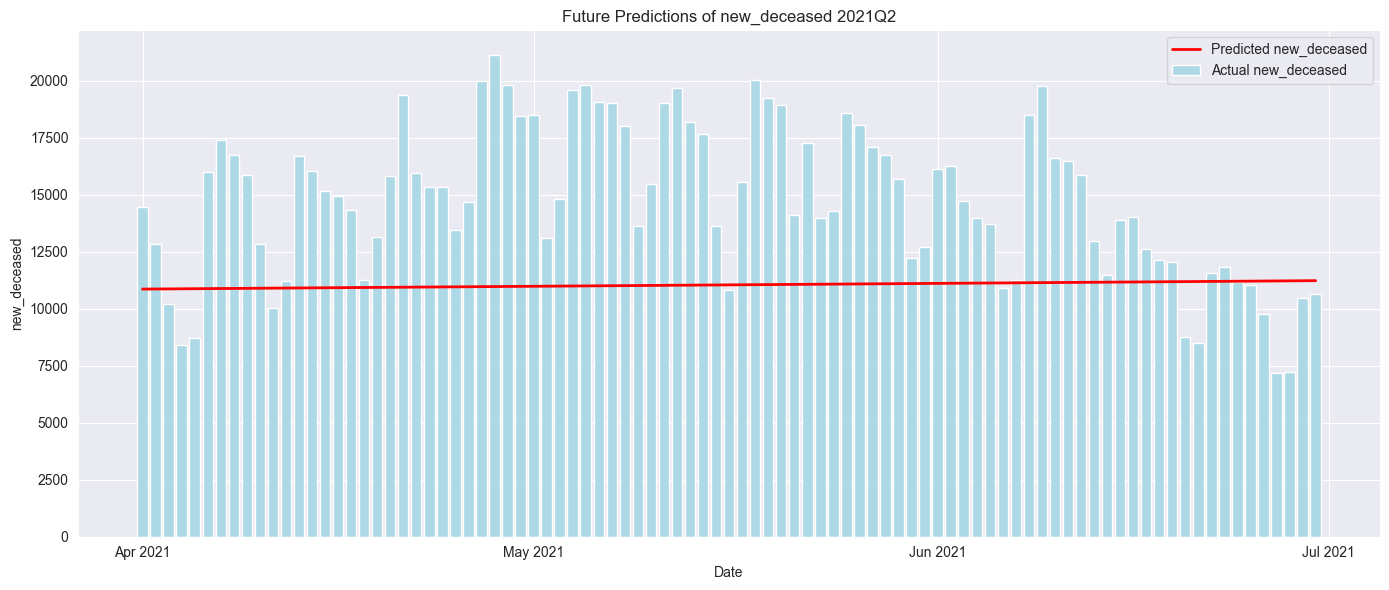

Training Quarter 2021Q2 - R²: 0.01 - MSE: 14392791.87 - MAE: 3267.24
Future Quarter 2021Q3 - R²: -10.69 - MSE: 12556730.96 - MAE: 3302.75 


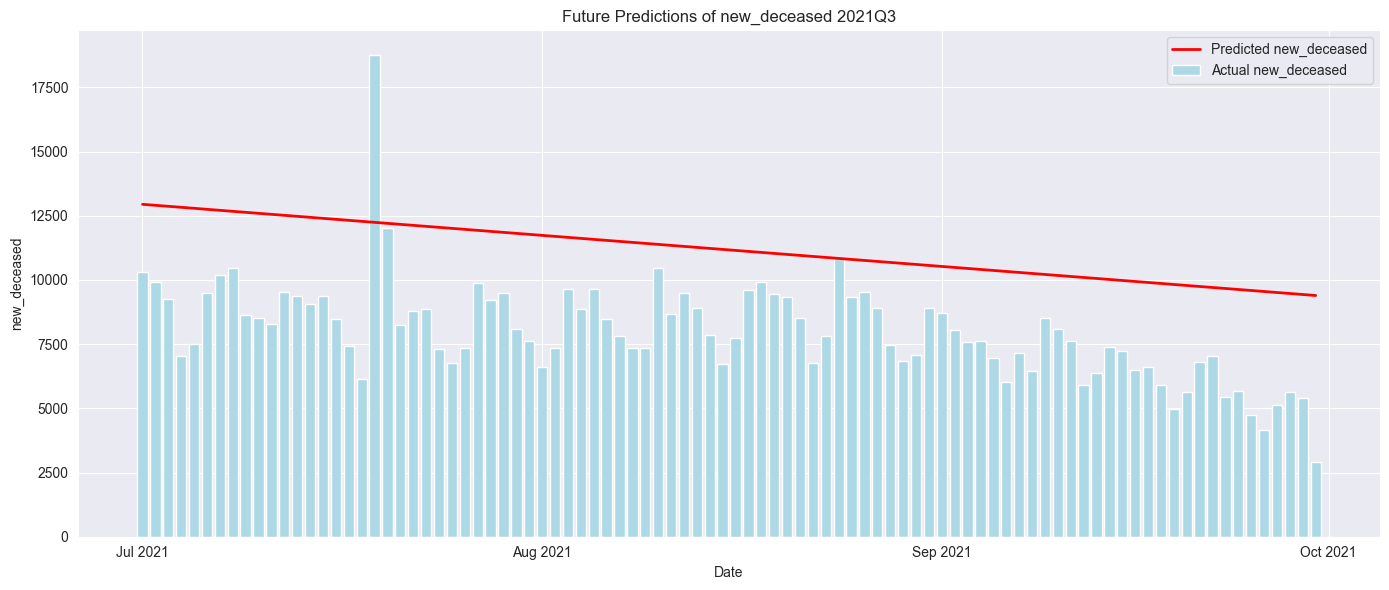

Training Quarter 2021Q3 - R²: 0.06 - MSE: 6613003.93 - MAE: 1521.23
Future Quarter 2021Q4 - R²: -0.78 - MSE: 2018926.59 - MAE: 1161.90 


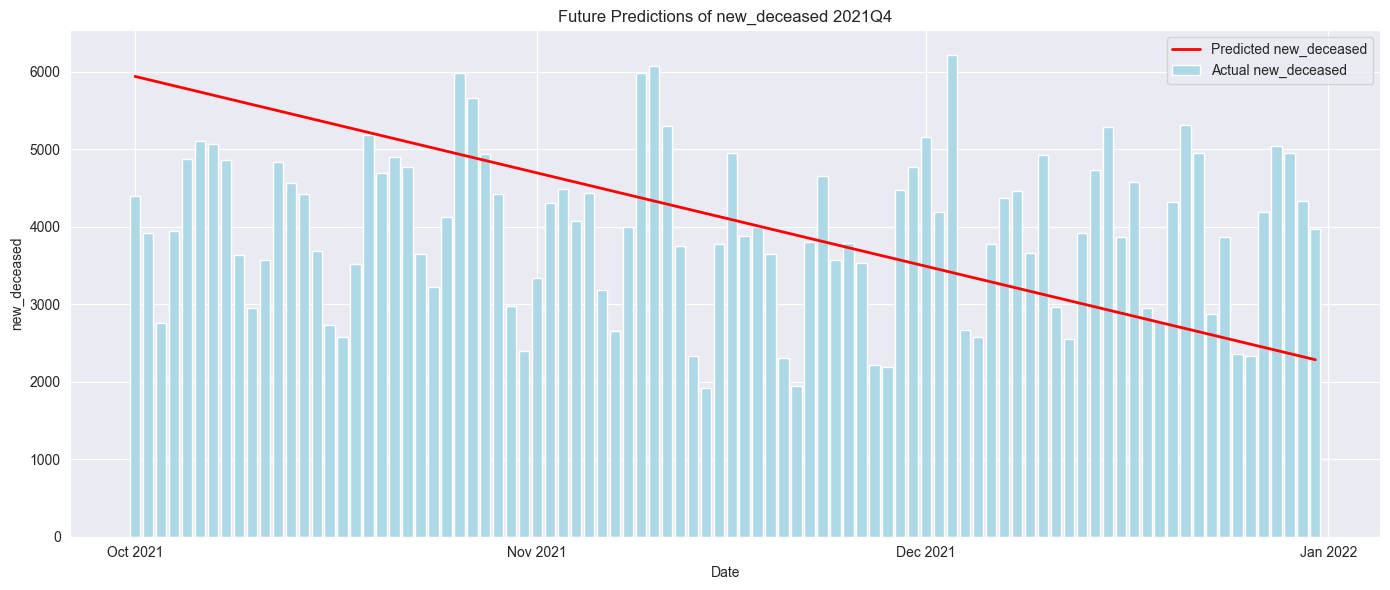

Training Quarter 2021Q4 - R²: -0.11 - MSE: 1281964.35 - MAE: 924.28
Future Quarter 2022Q1 - R²: -141063.19 - MSE: 6953516.32 - MAE: 2053.71 


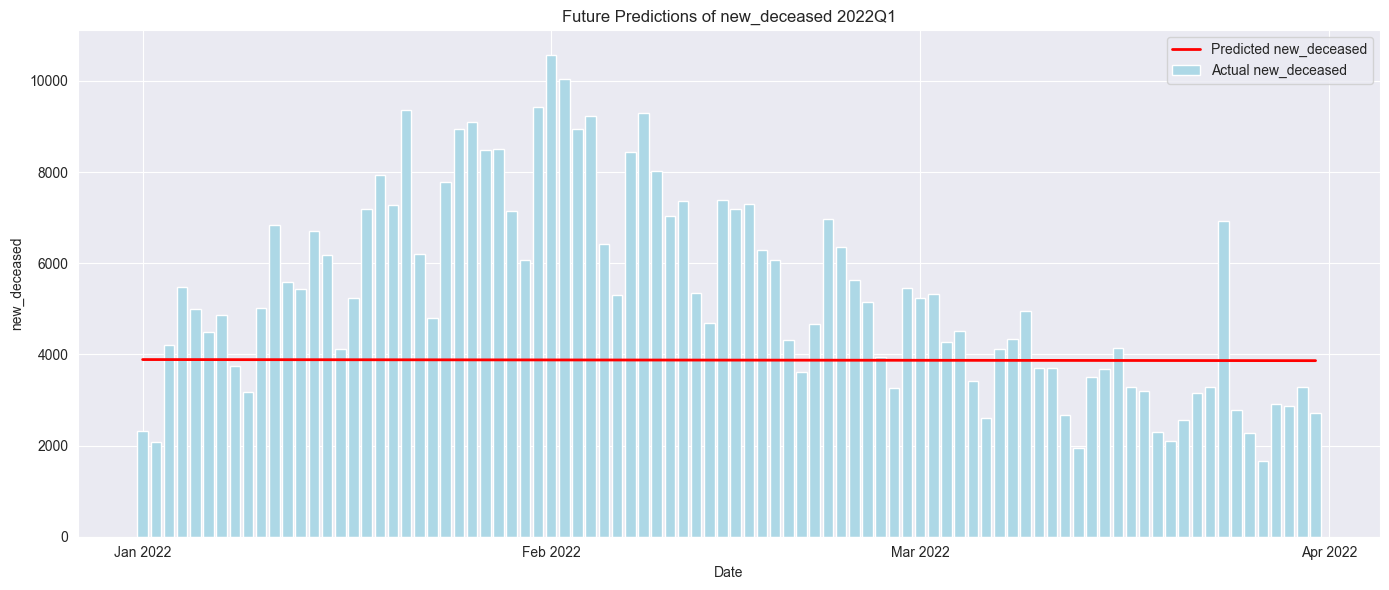

Training Quarter 2022Q1 - R²: 0.13 - MSE: 3256388.88 - MAE: 1427.80
Future Quarter 2022Q2 - R²: 0.69 - MSE: 387995.82 - MAE: 510.73 


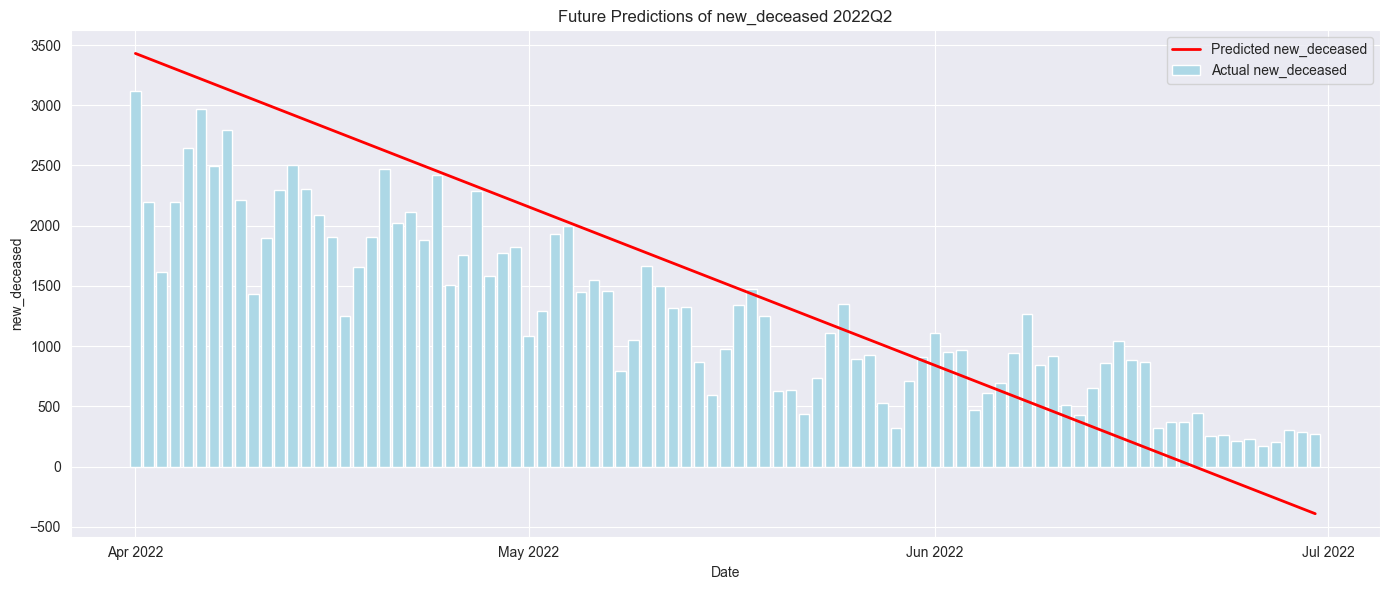

Training Quarter 2022Q2 - R²: 0.81 - MSE: 124749.08 - MAE: 265.50
Future Quarter 2022Q3 - R²: -4.27 - MSE: 1534573.05 - MAE: 1140.43 


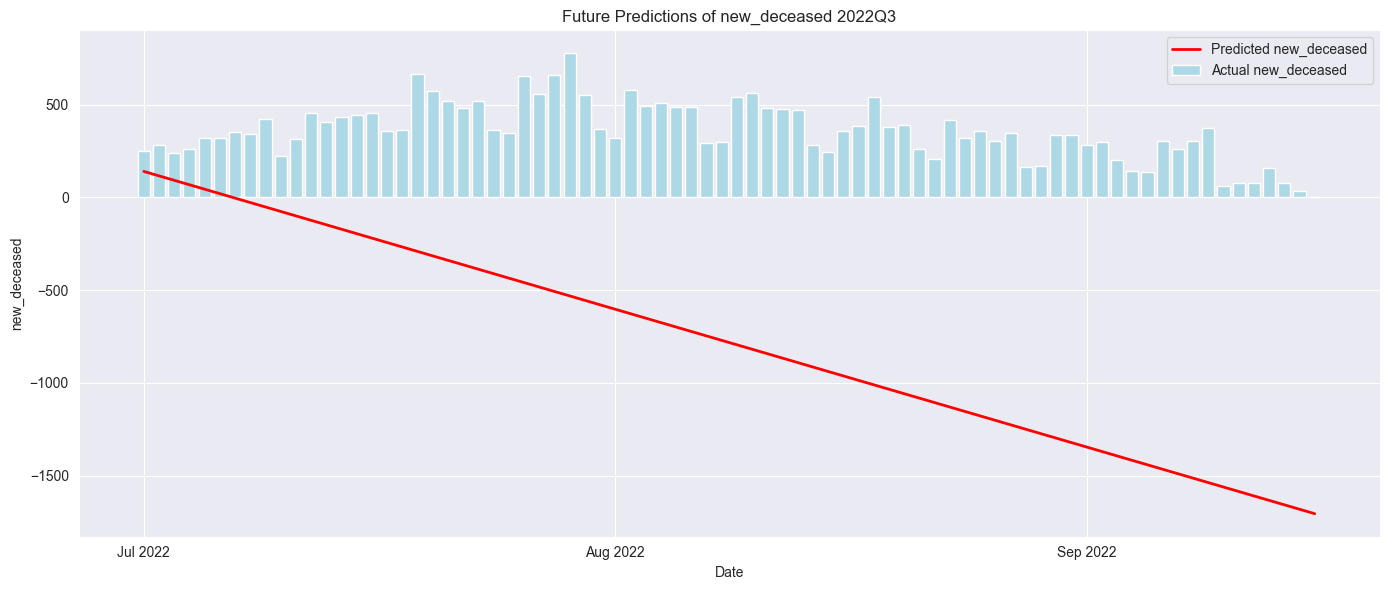

In [150]:
feature = 'new_deceased'

train_start = '2020-07-01'
train_end = '2021-12-01'
test_start = train_end
test_end = '2023-01-01'

part3_func(feature, train_start, train_end, test_start, test_end)

3.3 Liczba nowych szczepień

Training Data Metrics:
MAE: 291694.08
MSE: 120195311088.41
R²: 0.20

Future Data Metrics:
MAE: 5745537.14
MSE: 47316707687906.84
R²: -0.42


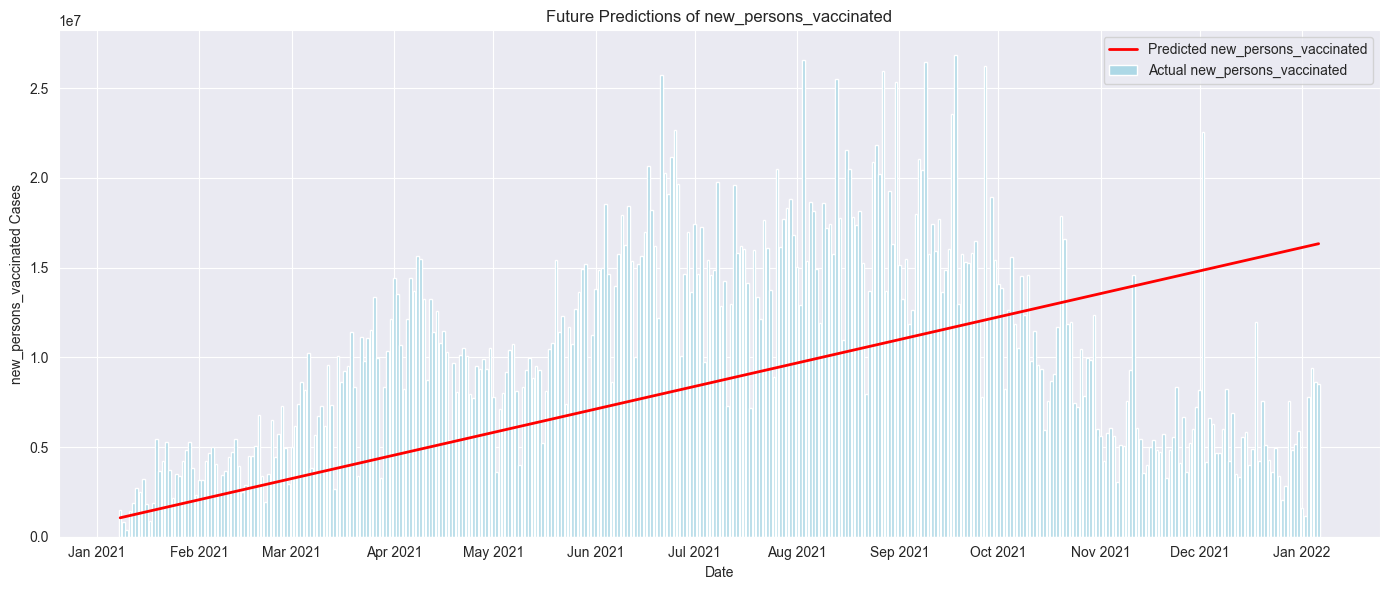


Analysis with shorter time periods (quarterly):
Training Quarter 2020Q4 - R²: 0.83 - MSE: 6203991224.76 - MAE: 72362.25
Future Quarter 2021Q1 - R²: -11.66 - MSE: 12474386055491.42 - MAE: 2701511.07 


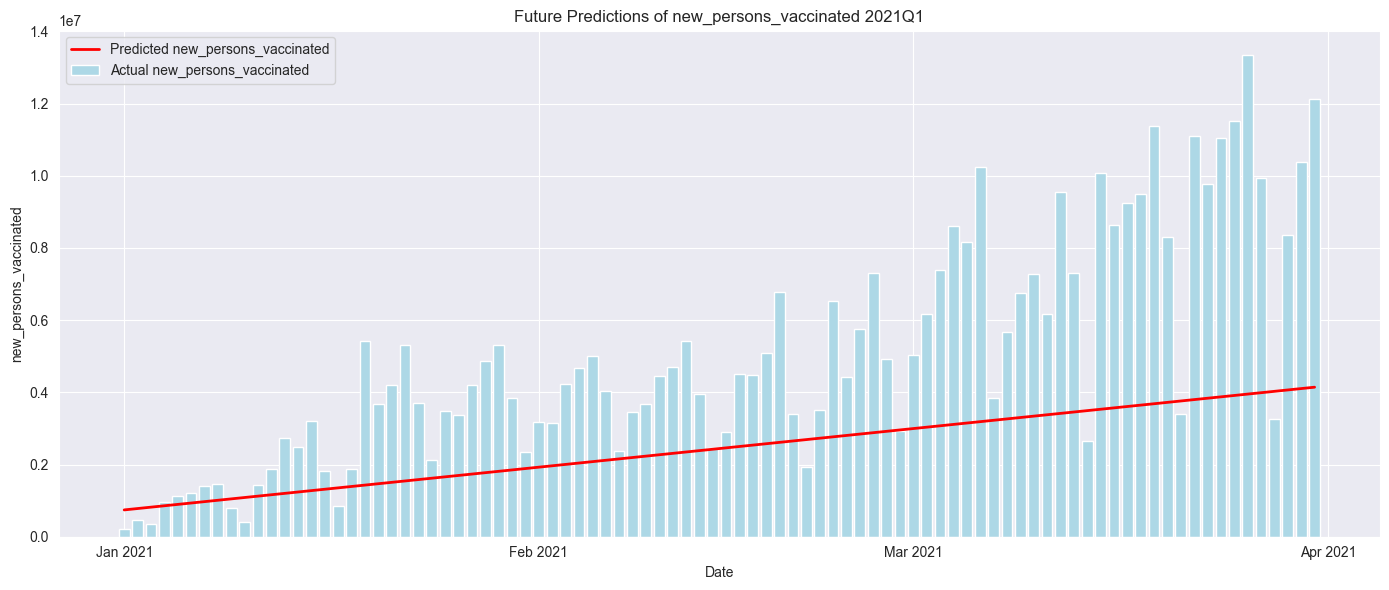

Training Quarter 2021Q1 - R²: 0.28 - MSE: 4582944458346.64 - MAE: 1526970.02
Future Quarter 2021Q2 - R²: -1.35 - MSE: 18818309856455.13 - MAE: 3611094.15 


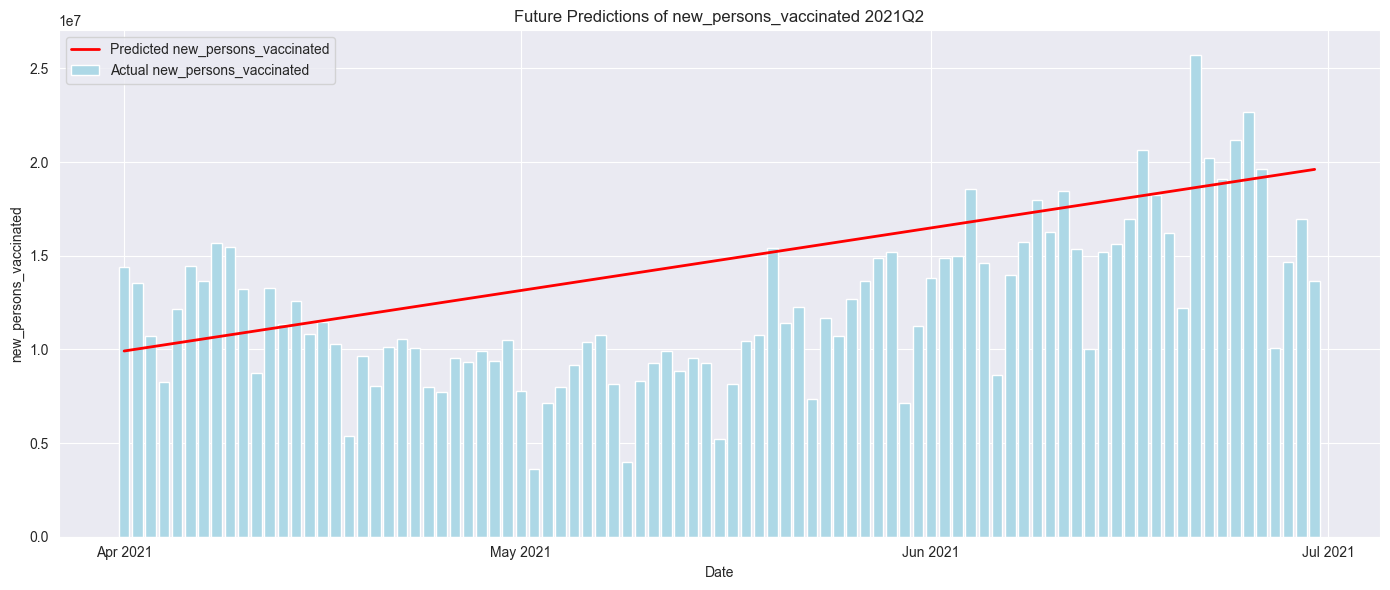

Training Quarter 2021Q2 - R²: 0.27 - MSE: 9299928299521.06 - MAE: 2366934.65
Future Quarter 2021Q3 - R²: -5.32 - MSE: 35040156477358.28 - MAE: 4791110.41 


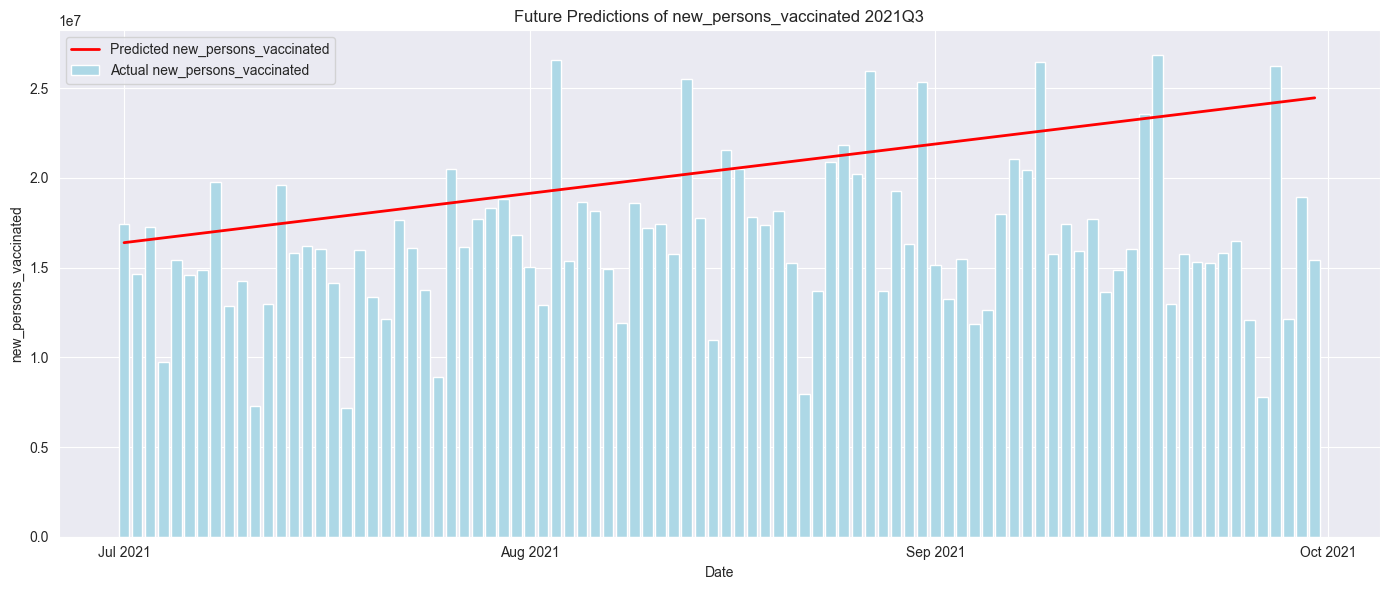

Training Quarter 2021Q3 - R²: -0.10 - MSE: 9575305697096.64 - MAE: 2300650.71
Future Quarter 2021Q4 - R²: -179.94 - MSE: 169527486721054.44 - MAE: 12267883.92 


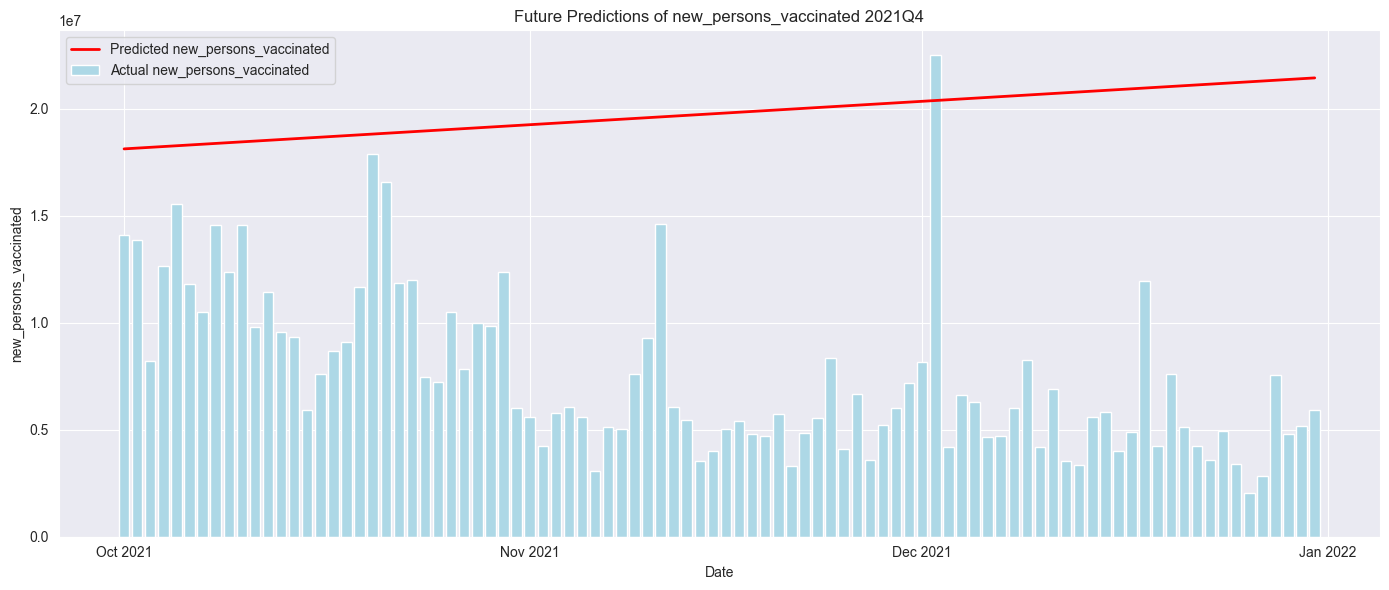

Training Quarter 2021Q4 - R²: 0.20 - MSE: 18954939763996.48 - MAE: 2627932.95
Future Quarter 2022Q1 - R²: -4.40 - MSE: 24116762205087.86 - MAE: 3830117.71 


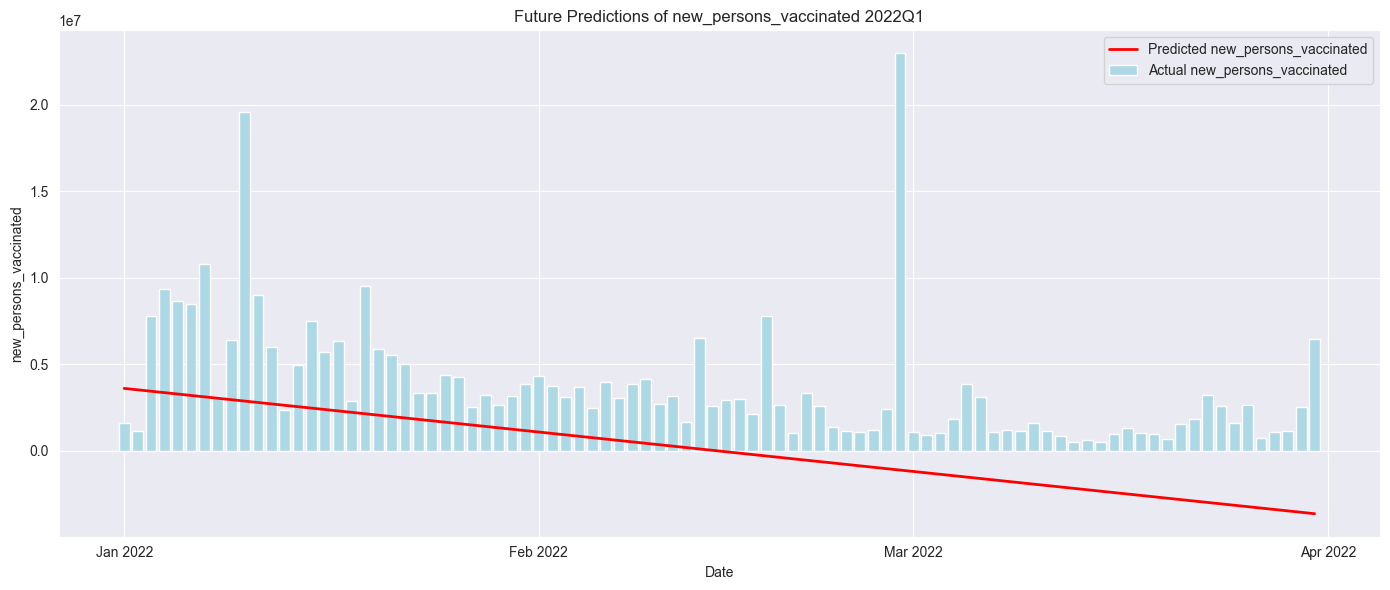

Training Quarter 2022Q1 - R²: 0.18 - MSE: 6050845414139.12 - MAE: 2134942.28
Future Quarter 2022Q2 - R²: -2.17 - MSE: 9850681666332.56 - MAE: 2723649.29 


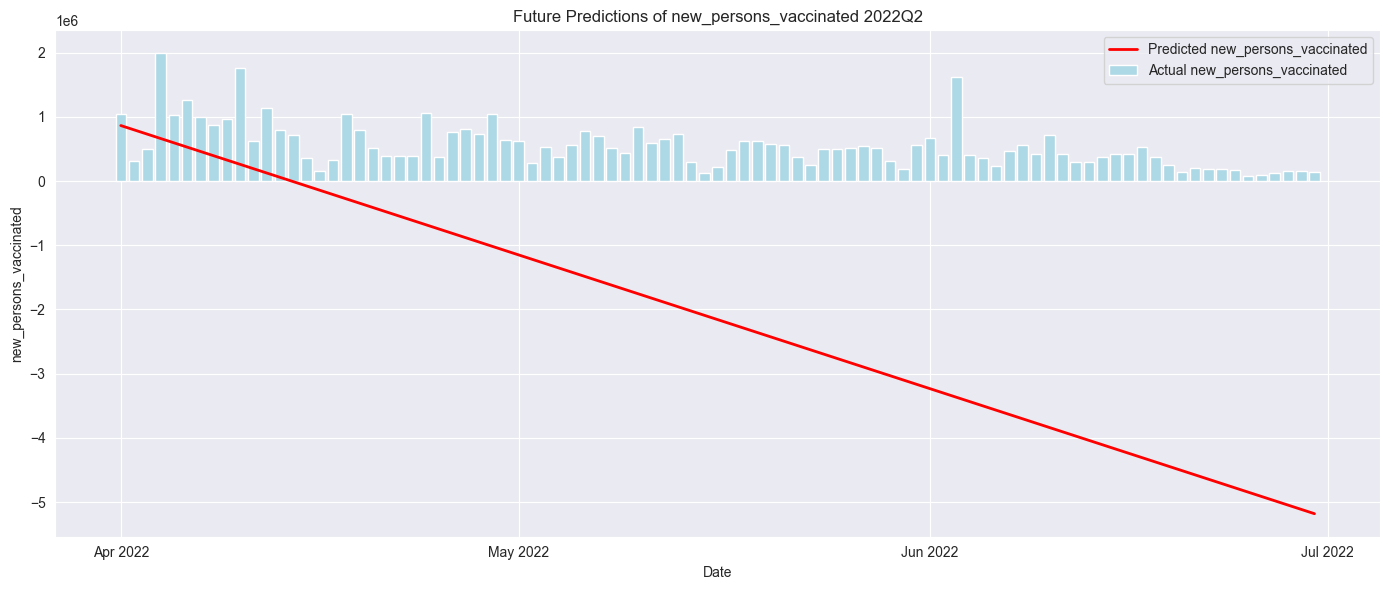

Training Quarter 2022Q2 - R²: 0.52 - MSE: 42954736399.65 - MAE: 163520.08
Future Quarter 2022Q3 - R²: -0.94 - MSE: 55384437816.74 - MAE: 210925.05 


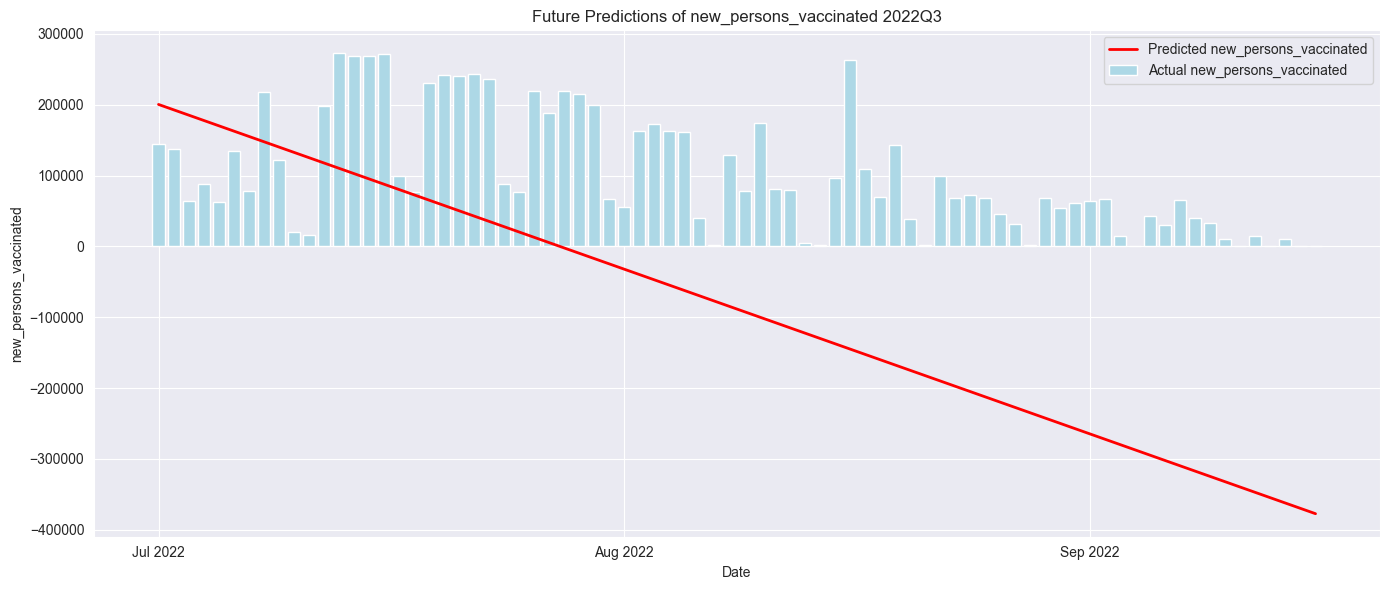

In [151]:
feature = 'new_persons_vaccinated'

train_start = '2020-07-01'
train_end = '2021-12-01'
test_start = train_end
test_end = '2023-01-01'

# Linear regression for new confirmed cases
df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)
# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1[feature], test_size=0.2)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
X_future, y_future = df2[['data_num']], df2[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df2['date'], df2[feature], color='lightblue', label=f'Actual {feature}')
plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

# Analysis with shorter time periods
print("\nAnalysis with shorter time periods (quarterly):")
quarters = df_daily['Q'].unique()
training_quarters = quarters[:-1]
future_quarters = quarters[1:]
for quarter, future_quarter in zip(training_quarters, future_quarters):
    quarter_data = df_daily[df_daily['Q'] == quarter]
    future_quarter_data = df_daily[df_daily['Q'] == future_quarter]
    if len(quarter_data) > 10 and len(future_quarter_data) > 10:  # Ensure enough data points
        X = quarter_data[['data_num']]
        y = quarter_data[feature]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Training Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f}")
        y_future_pred = model.predict(future_quarter_data[['data_num']])
        r2 = r2_score(y_future_pred, future_quarter_data[feature])
        mse = mean_squared_error(y_future_pred, future_quarter_data[feature])
        mae = mean_absolute_error(y_future_pred, future_quarter_data[feature])
        print(f"Future Quarter {future_quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f} ")

        fig, ax = plt.subplots(figsize=(14, 6))
        plt.bar(df_daily['date'][df_daily['Q'] == future_quarter], df_daily[feature][df_daily['Q'] == future_quarter], color='lightblue', label=f'Actual {feature}')
        plt.plot(df_daily['date'][df_daily['Q'] == future_quarter], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        plt.xlabel('Date')
        plt.ylabel(f'{feature}')
        plt.title(f'Future Predictions of {feature} {future_quarter}')
        plt.legend()
        plt.tight_layout()
        plt.show()

3.4.1 Liczba osób w pełni zaszczepionych

Training Data Metrics:
MAE: 1829711.54
MSE: 6047492164265.13
R²: 0.67

Future Data Metrics:
MAE: 16875391.10
MSE: 322486857563210.69
R²: -26.64


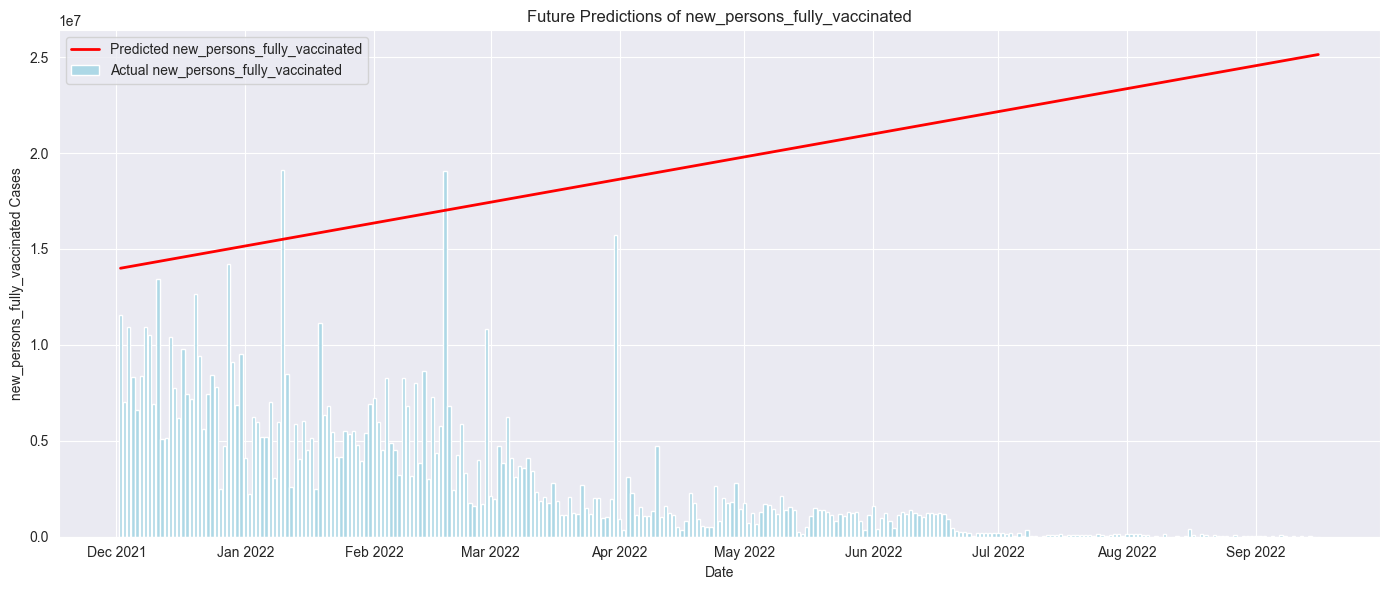


Analysis with shorter time periods (quarterly):
Training Quarter 2020Q4 - R²: 0.44 - MSE: 715200.40 - MAE: 770.55
Future Quarter 2021Q1 - R²: -87065.90 - MSE: 5531791621435.72 - MAE: 1954447.80 


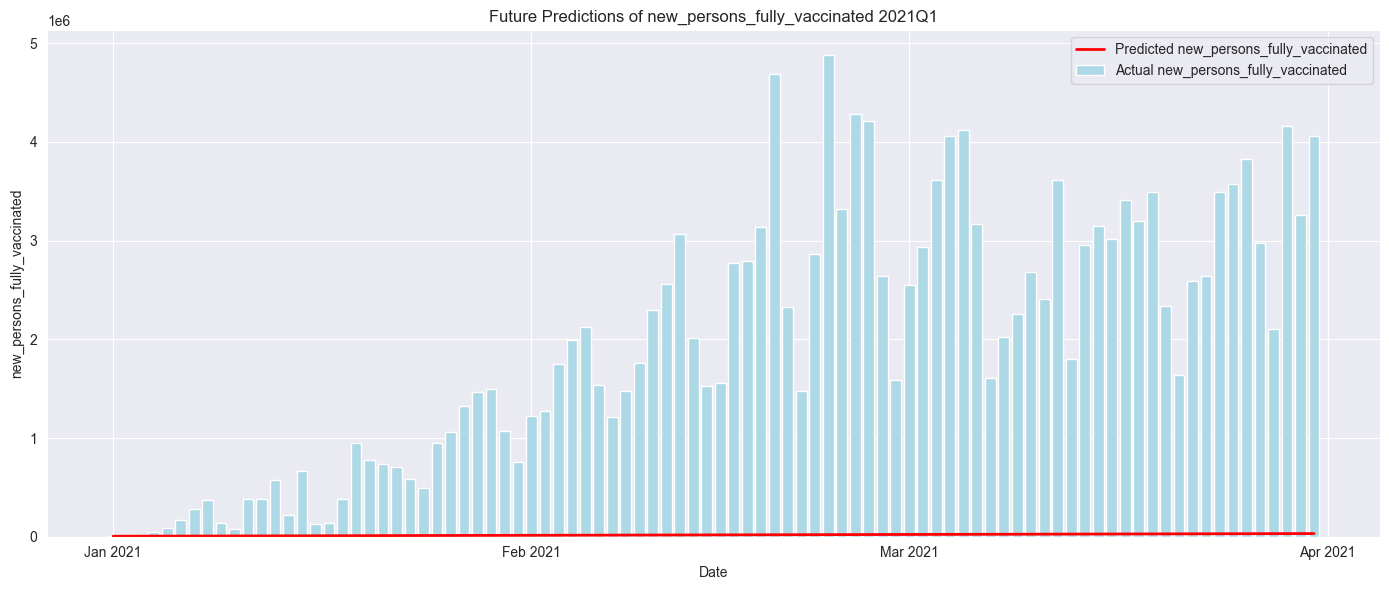

Training Quarter 2021Q1 - R²: 0.55 - MSE: 720094059908.05 - MAE: 594696.32
Future Quarter 2021Q2 - R²: -1.62 - MSE: 3311093618580.23 - MAE: 1472506.80 


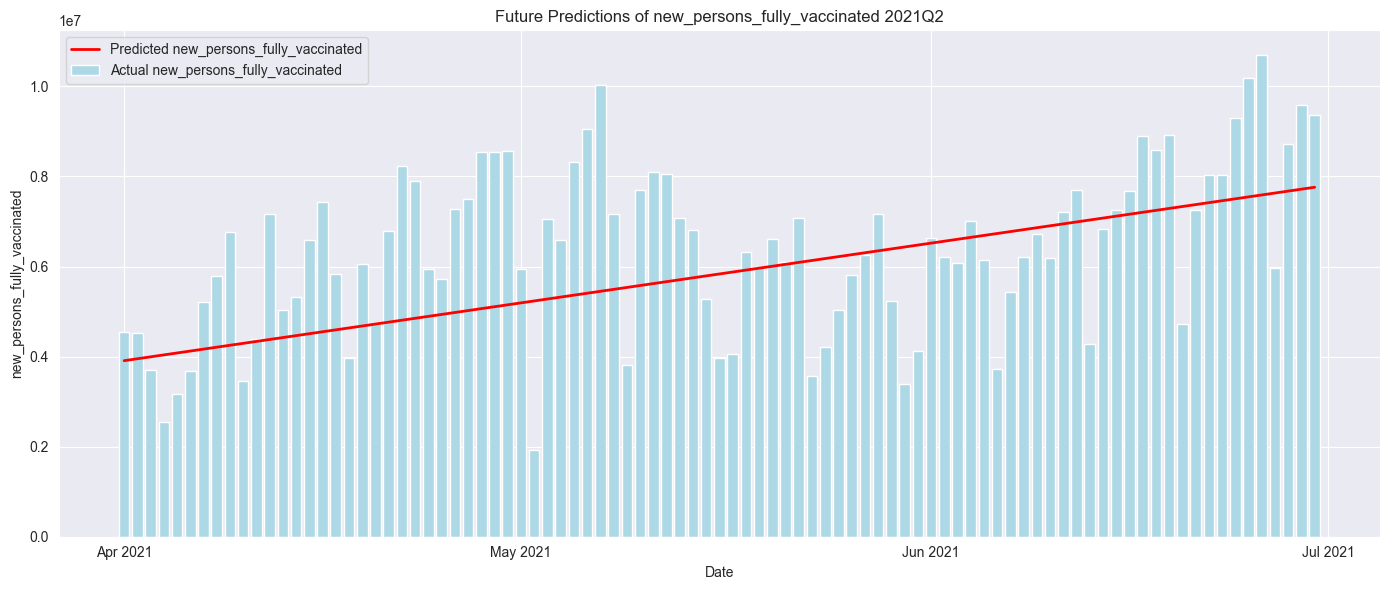

Training Quarter 2021Q2 - R²: 0.15 - MSE: 3035073754147.88 - MAE: 1468484.00
Future Quarter 2021Q3 - R²: -29.20 - MSE: 17614615946646.23 - MAE: 3672421.11 


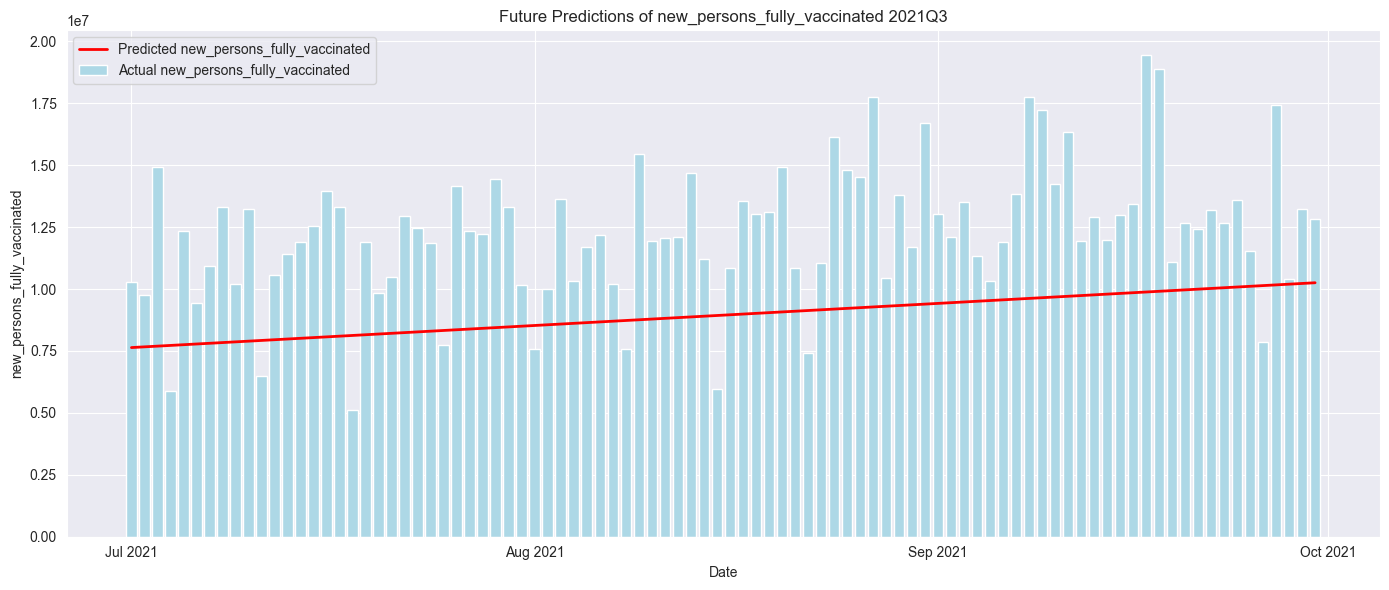

Training Quarter 2021Q3 - R²: 0.09 - MSE: 4008715379244.31 - MAE: 1505035.75
Future Quarter 2021Q4 - R²: -46.81 - MSE: 52653693028681.95 - MAE: 6410054.44 


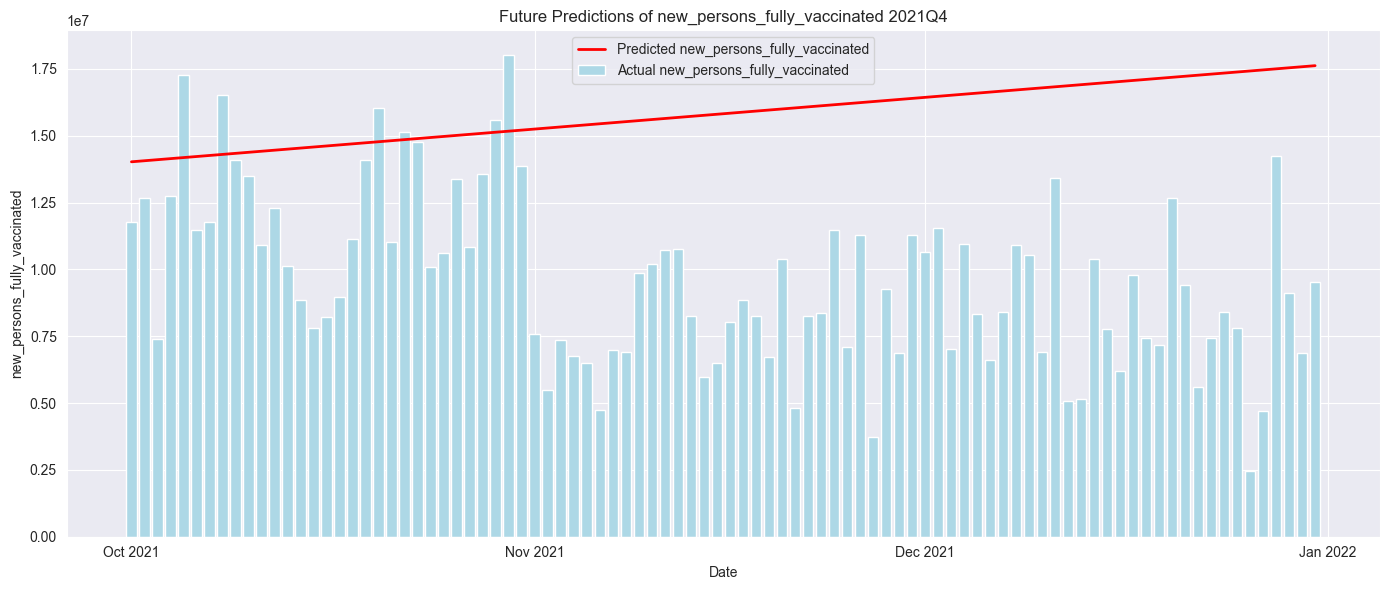

Training Quarter 2021Q4 - R²: 0.31 - MSE: 7678379678764.66 - MAE: 2119633.49
Future Quarter 2022Q1 - R²: -5.25 - MSE: 9847175668264.98 - MAE: 2099842.60 


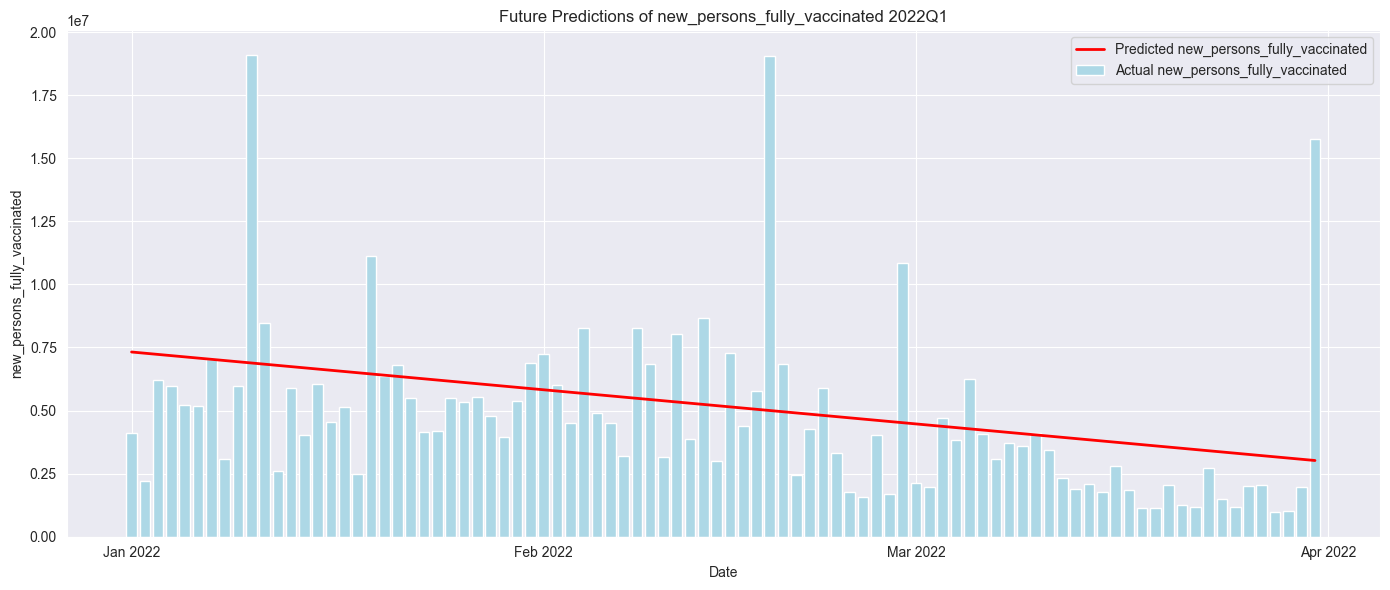

Training Quarter 2022Q1 - R²: 0.31 - MSE: 3976420172103.03 - MAE: 1632176.92
Future Quarter 2022Q2 - R²: 0.12 - MSE: 1150198568516.09 - MAE: 918345.12 


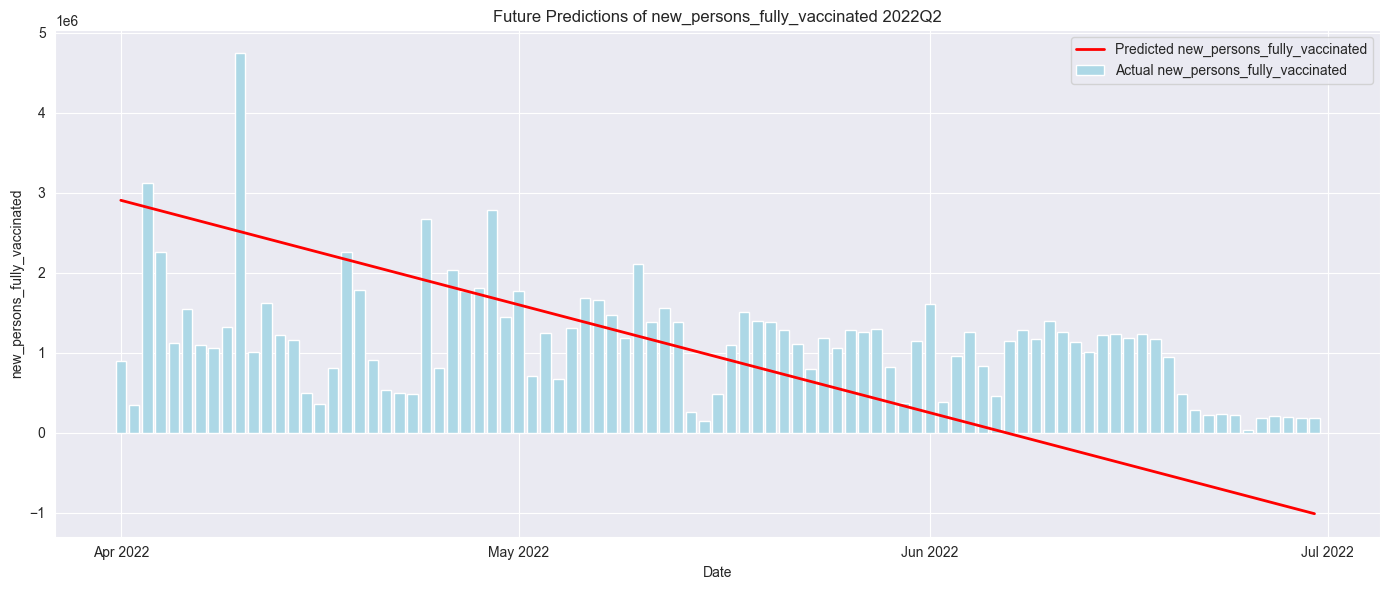

Training Quarter 2022Q2 - R²: 0.16 - MSE: 423313937566.68 - MAE: 573897.43
Future Quarter 2022Q3 - R²: 0.11 - MSE: 66214108707.87 - MAE: 221923.52 


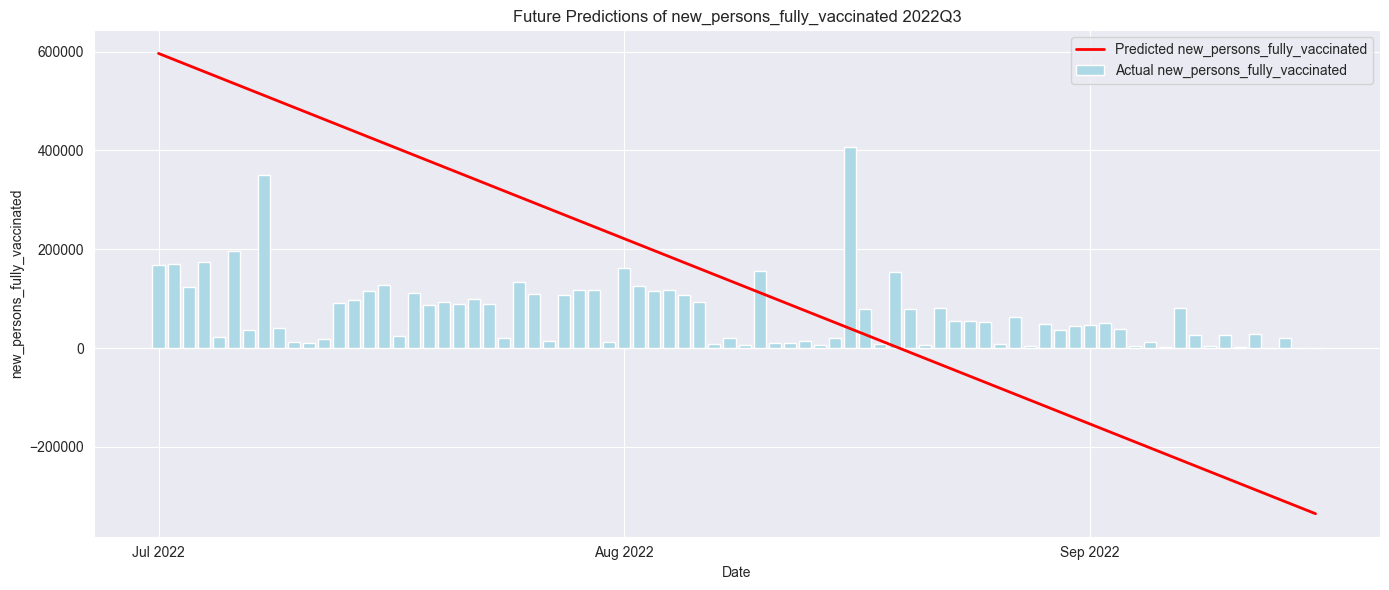

In [152]:
feature = 'new_persons_fully_vaccinated'

train_start = '2020-07-01'
train_end = '2021-12-01'
test_start = train_end
test_end = '2023-01-01'

part3_func(feature, train_start, train_end, test_start, test_end)

3.4.2 Liczba zaaplikowanych szczepionek

Training Data Metrics:
MAE: 5682651.94
MSE: 46793670429475.97
R²: 0.54

Future Data Metrics:
MAE: 33254067.06
MSE: 1262756493323880.25
R²: -18.15


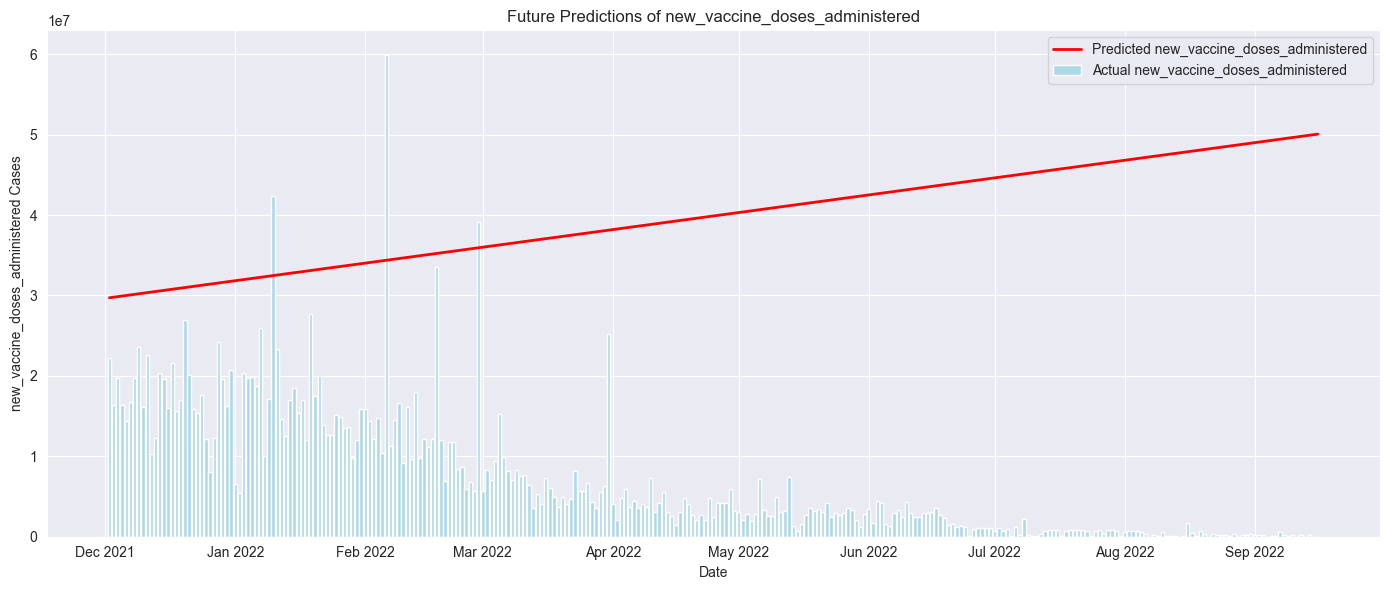


Analysis with shorter time periods (quarterly):
Training Quarter 2020Q4 - R²: 0.82 - MSE: 6450903486.82 - MAE: 73985.68
Future Quarter 2021Q1 - R²: -30.86 - MSE: 32454885240248.77 - MAE: 4522907.46 


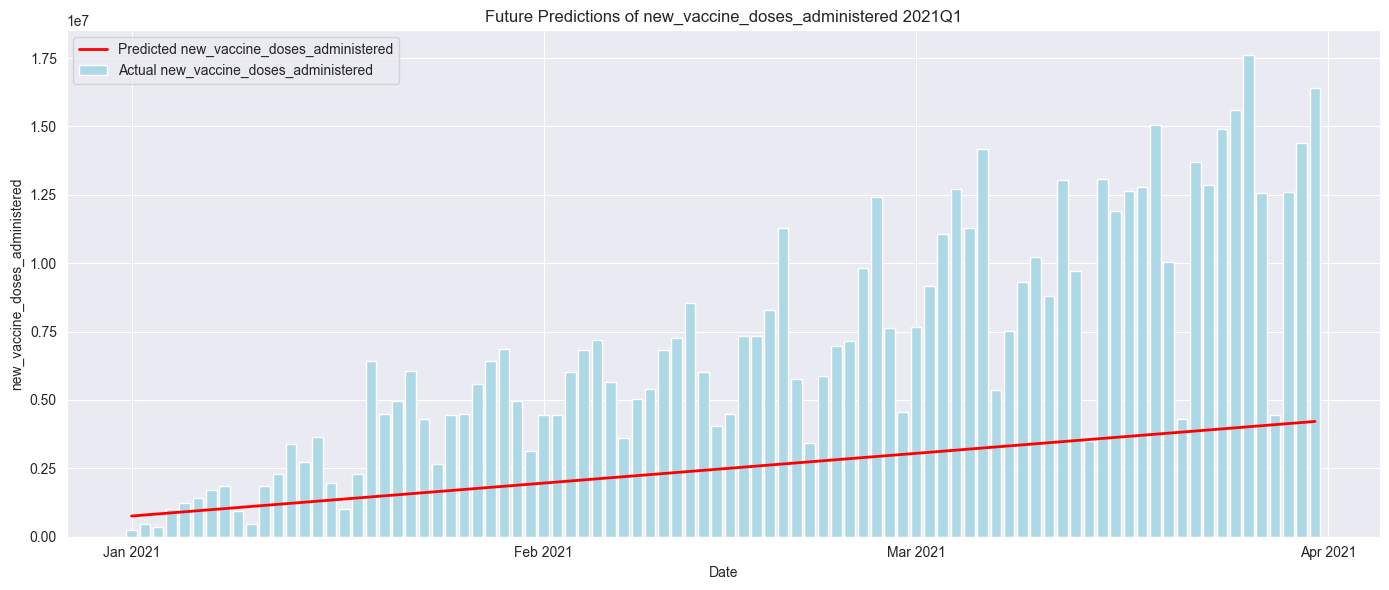

Training Quarter 2021Q1 - R²: 0.38 - MSE: 8448313430511.21 - MAE: 2047479.68
Future Quarter 2021Q2 - R²: -0.69 - MSE: 26099313526290.10 - MAE: 3917485.78 


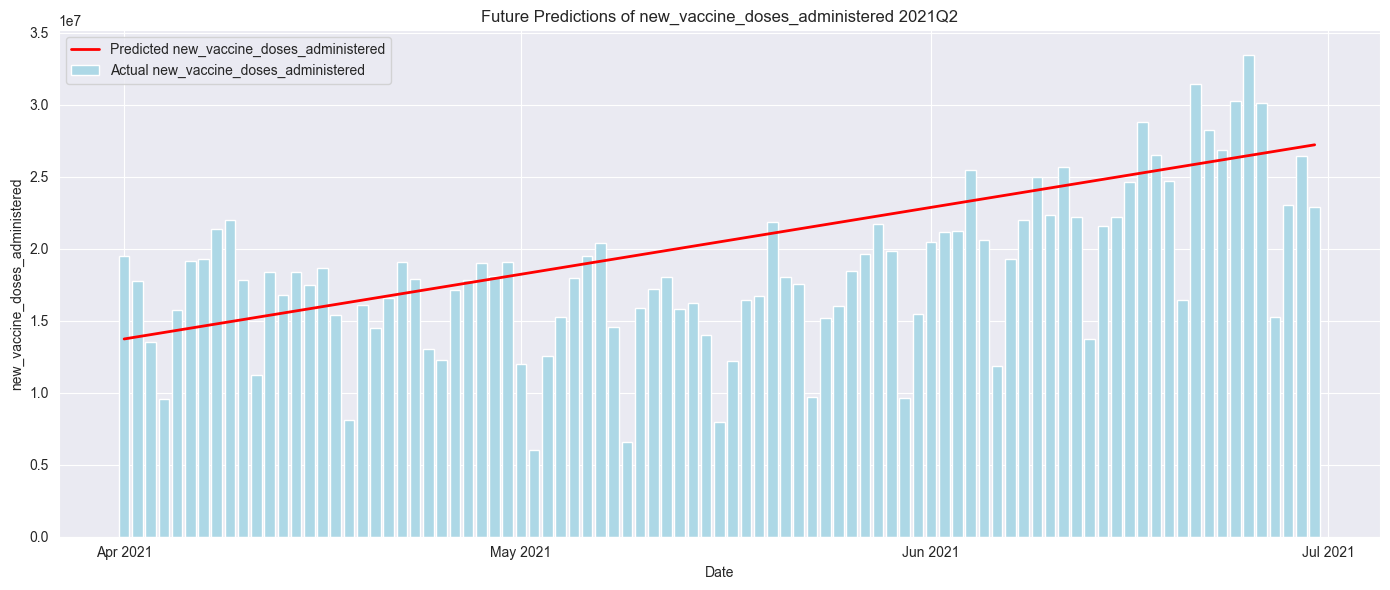

Training Quarter 2021Q2 - R²: 0.29 - MSE: 15821727115477.57 - MAE: 2892325.69
Future Quarter 2021Q3 - R²: -3.42 - MSE: 41284839268735.48 - MAE: 5023574.02 


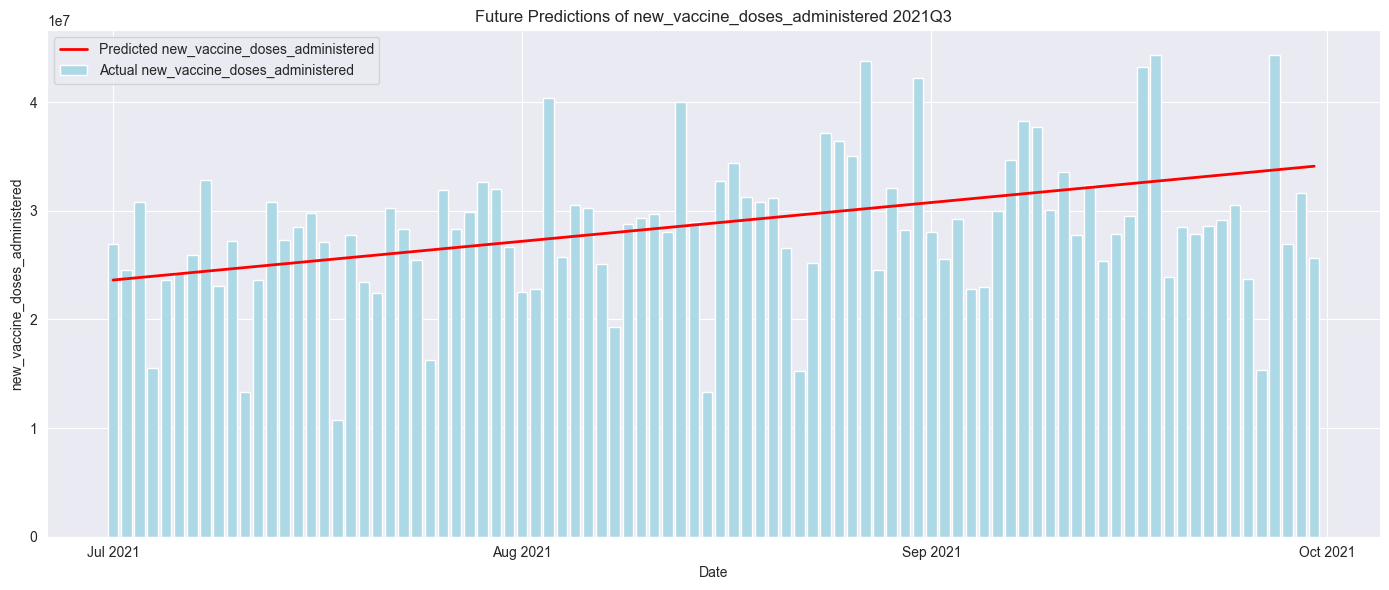

Training Quarter 2021Q3 - R²: 0.12 - MSE: 17748071158047.32 - MAE: 3108624.58
Future Quarter 2021Q4 - R²: -74.90 - MSE: 314654465330436.06 - MAE: 16454607.24 


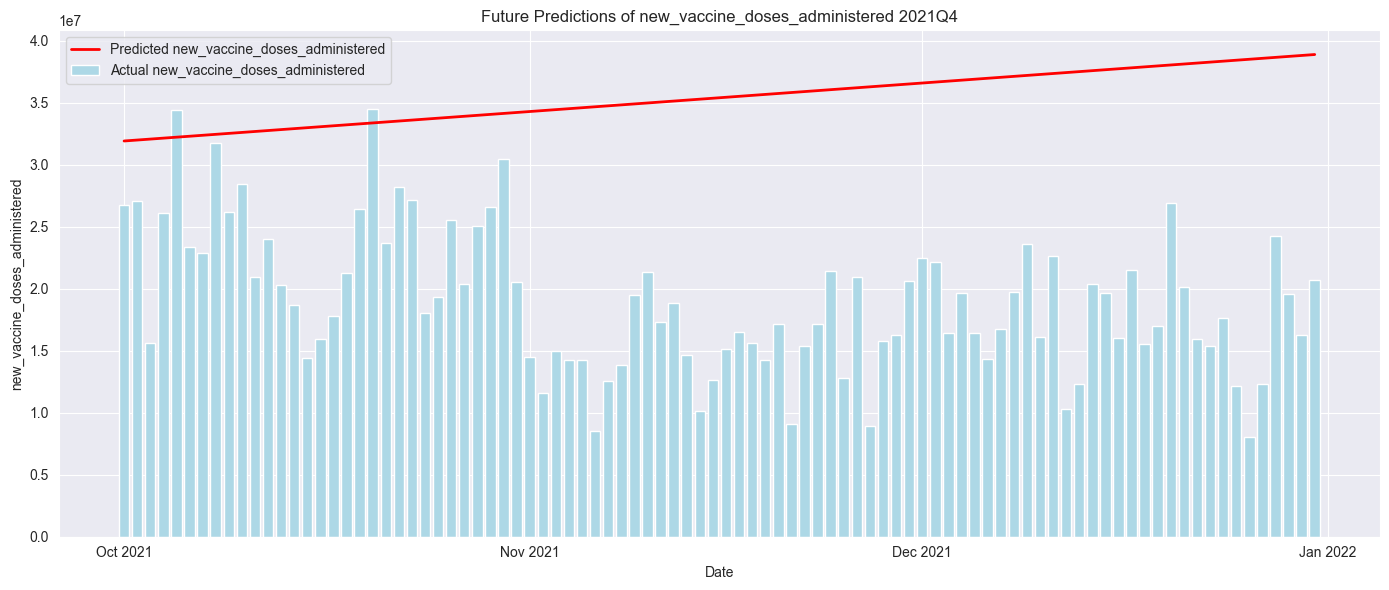

Training Quarter 2021Q4 - R²: 0.28 - MSE: 28057008569927.52 - MAE: 4197835.26
Future Quarter 2022Q1 - R²: -17.23 - MSE: 66894428260611.13 - MAE: 4801488.46 


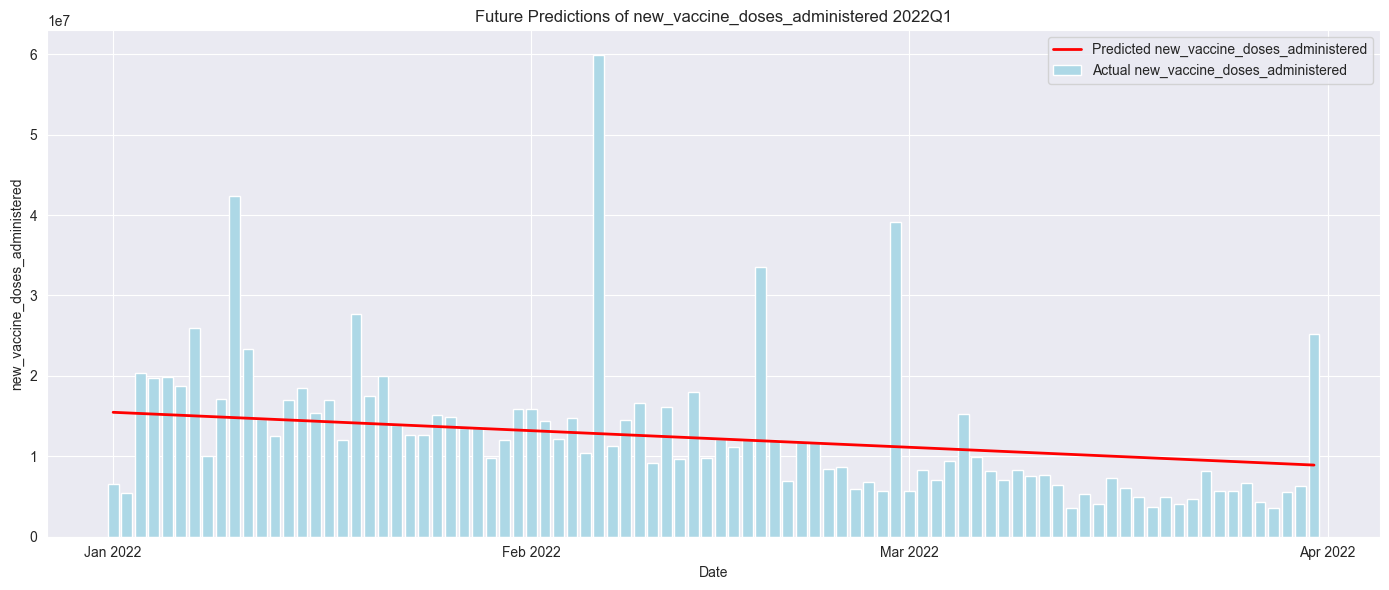

Training Quarter 2022Q1 - R²: 0.20 - MSE: 31151400556891.14 - MAE: 4583598.75
Future Quarter 2022Q2 - R²: -0.86 - MSE: 34255760991351.79 - MAE: 4856718.41 


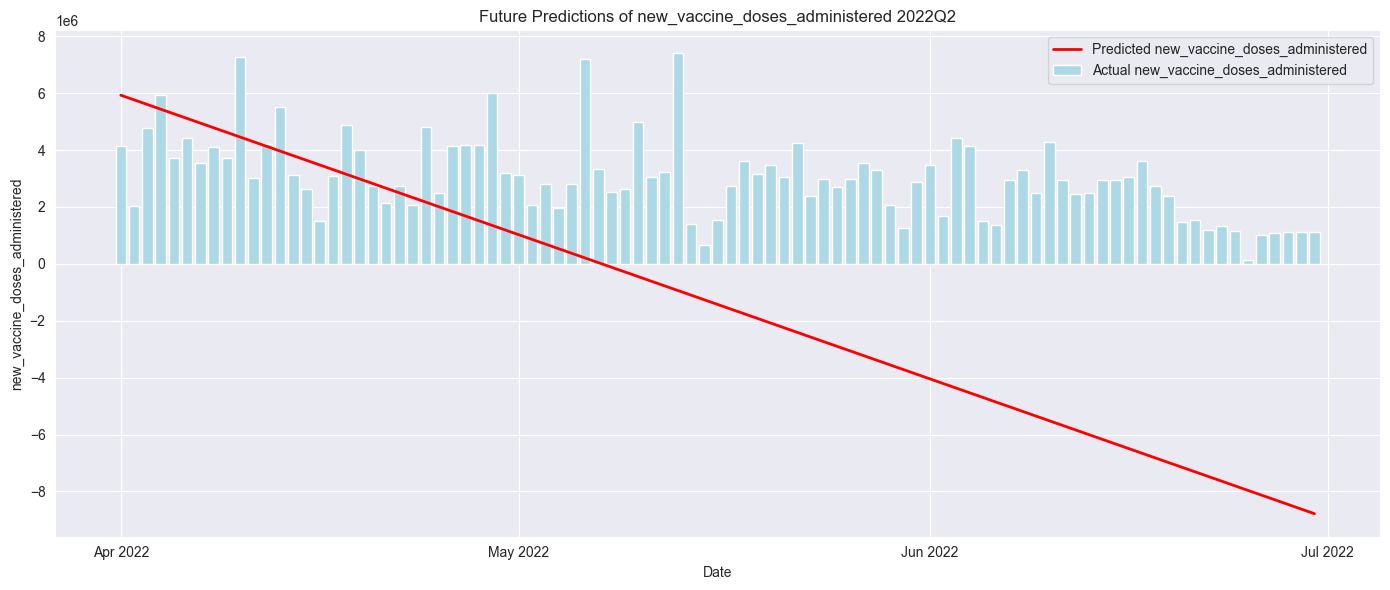

Training Quarter 2022Q2 - R²: 0.24 - MSE: 2535666229386.13 - MAE: 1244625.13
Future Quarter 2022Q3 - R²: -0.68 - MSE: 502708063106.98 - MAE: 574186.49 


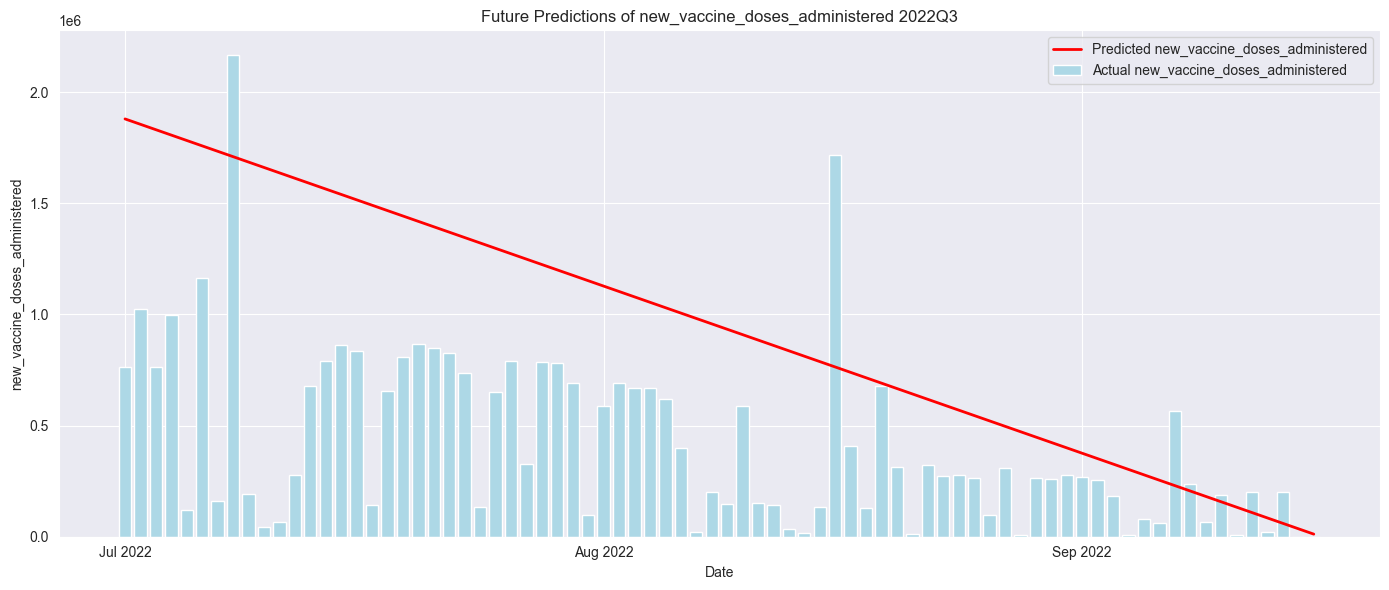

In [153]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature = 'new_vaccine_doses_administered'

train_start = '2020-07-01'
train_end = '2021-12-01'
test_start = train_end
test_end = '2023-01-01'

part3_func(feature, train_start, train_end, test_start, test_end)

## Część 4

4.1

Degree 1: Mean CV MSE = 78562227569856.06
Degree 2: Mean CV MSE = 46311554691399.11
Degree 3: Mean CV MSE = 46303445133128.44
Degree 4: Mean CV MSE = 46295285290639.67
Degree 5: Mean CV MSE = 46287125354428.52
Best polynomial degree: 5
Test Set Evaluation:
Mean Squared Error: 863172728839579.12
Mean Absolute Error: 23287283.21
R² Score: -89.1446


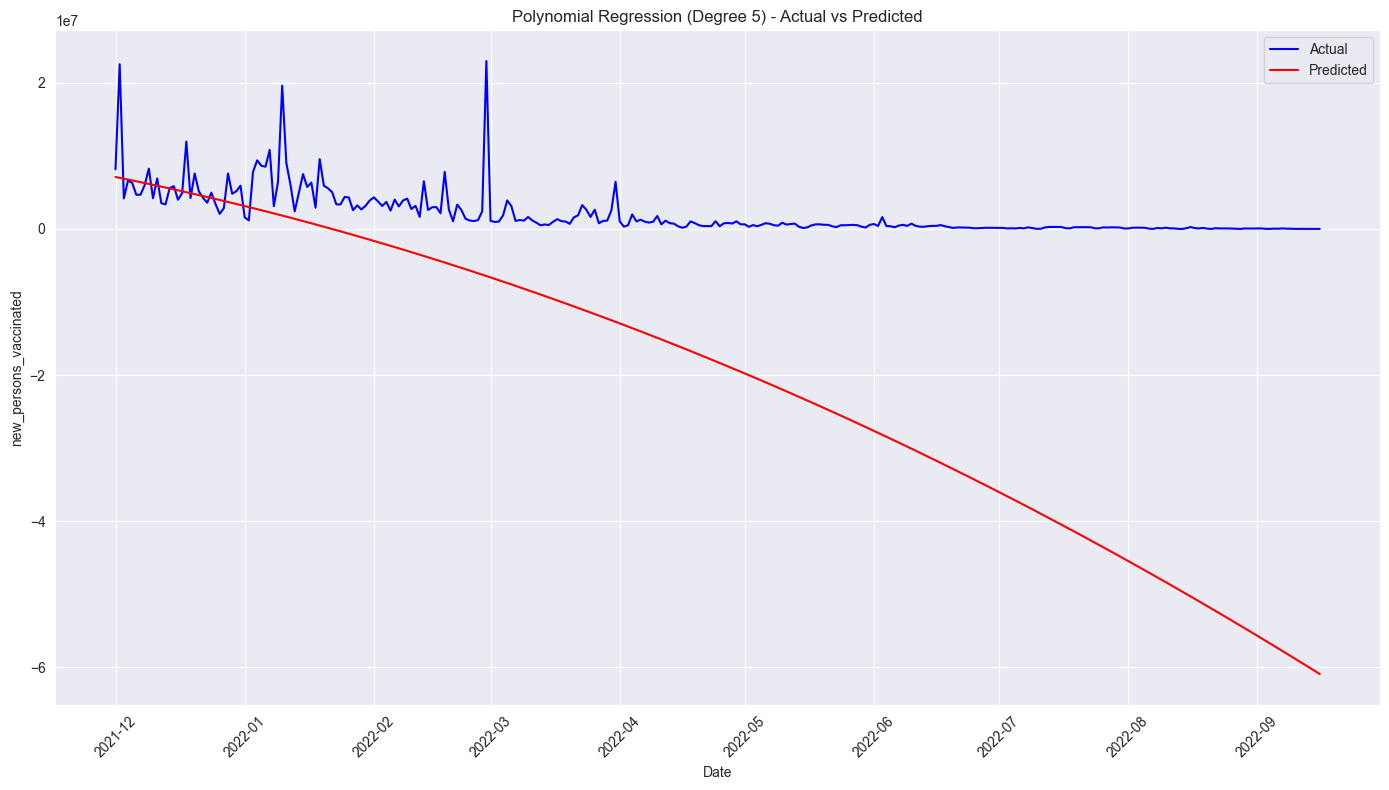

Training Data Metrics (Polynomial Regression):
MAE: 5182023.66
MSE: 38748890325631.80
R²: -0.02

Future Data Metrics (Polynomial Regression):
MAE: 8738284.74
MSE: 81591557221425.42
R²: -7.61


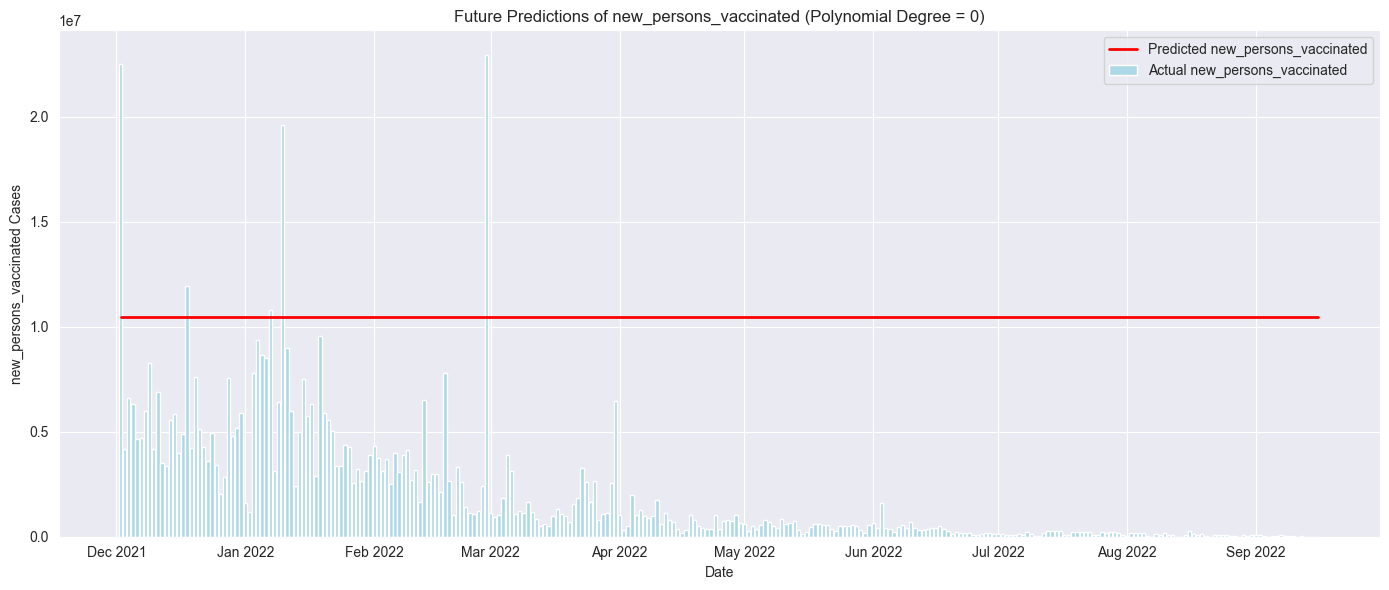

Training Data Metrics (Polynomial Regression):
MAE: 4414858.02
MSE: 29447853558795.68
R²: 0.22

Future Data Metrics (Polynomial Regression):
MAE: 18521654.15
MSE: 366467179088846.31
R²: -37.67


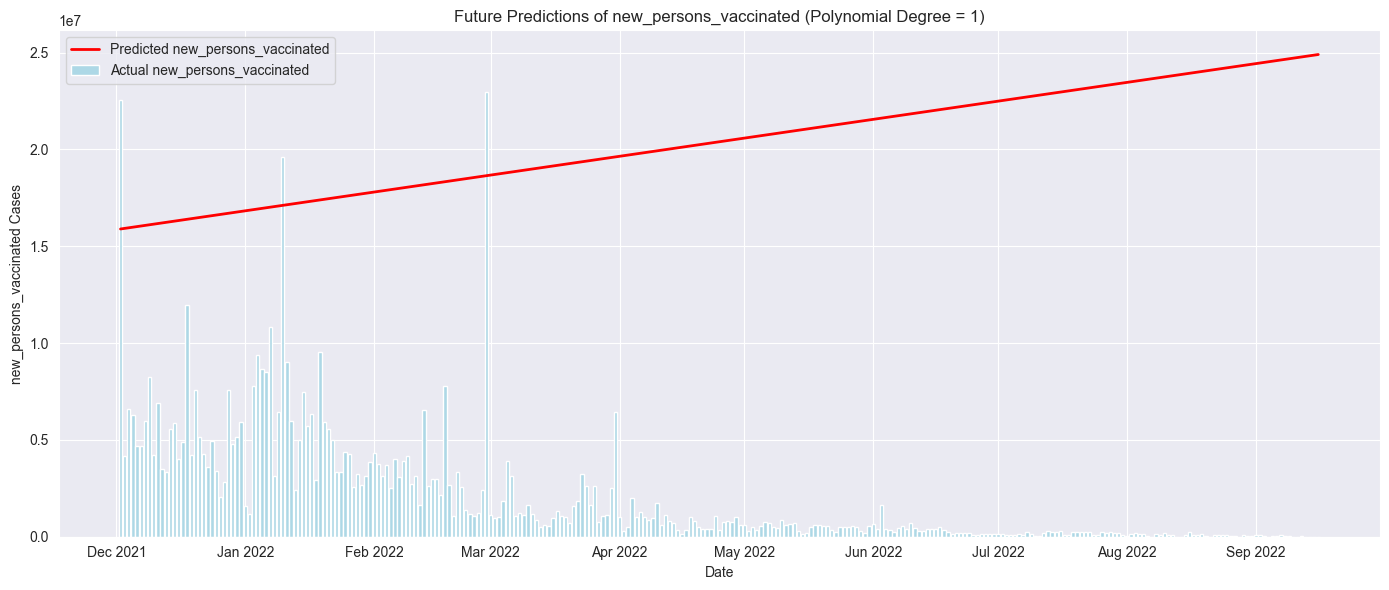

Training Data Metrics (Polynomial Regression):
MAE: 3156562.15
MSE: 16247822905595.05
R²: 0.57

Future Data Metrics (Polynomial Regression):
MAE: 23768285.87
MSE: 894879810021018.25
R²: -93.43


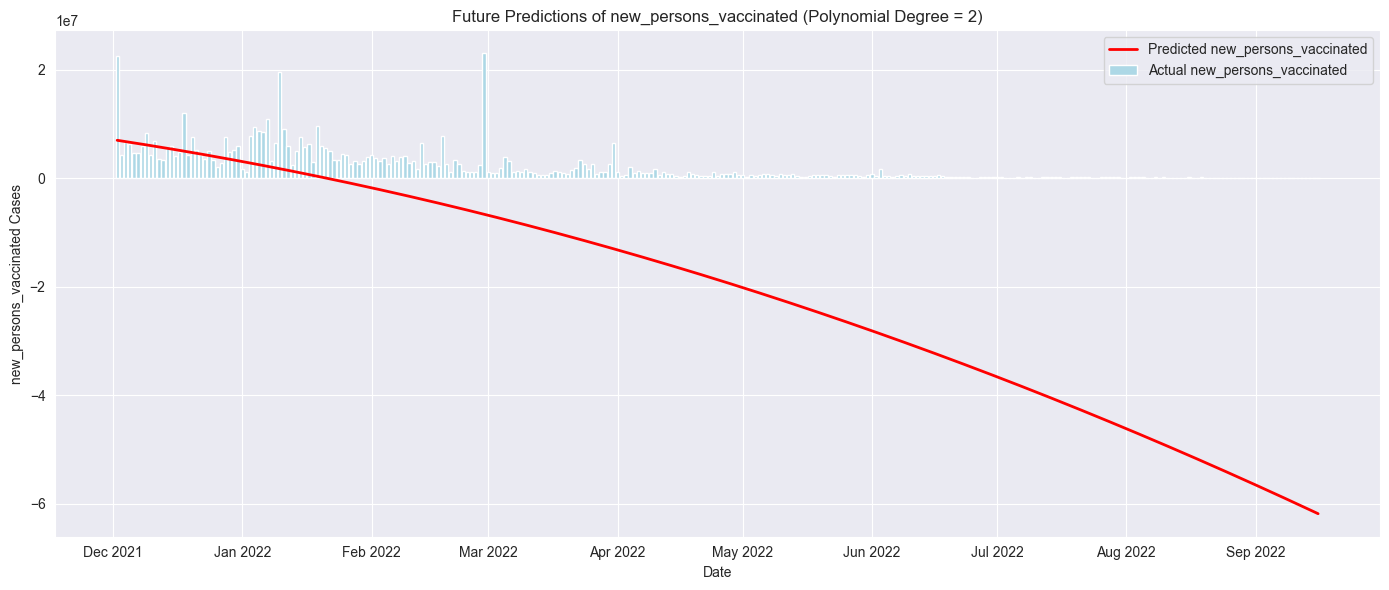

Training Data Metrics (Polynomial Regression):
MAE: 3156443.74
MSE: 16246880874176.14
R²: 0.57

Future Data Metrics (Polynomial Regression):
MAE: 23782437.21
MSE: 895948859426652.88
R²: -93.54


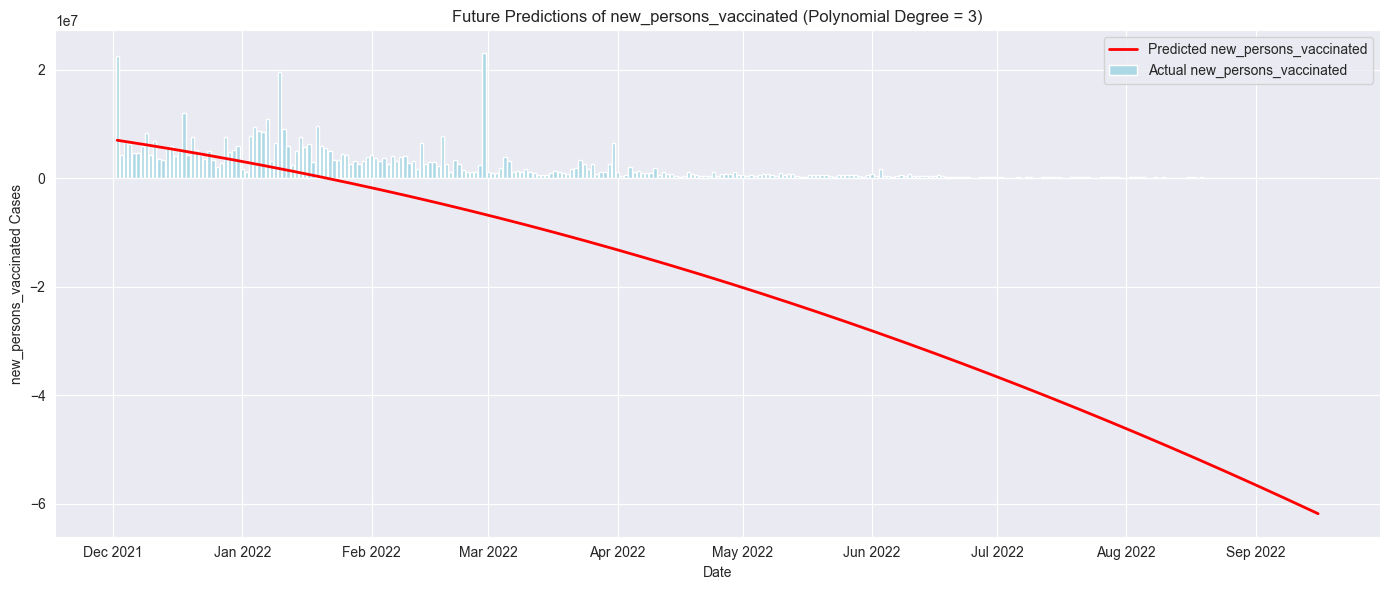

Training Data Metrics (Polynomial Regression):
MAE: 3156325.15
MSE: 16245938915755.53
R²: 0.57

Future Data Metrics (Polynomial Regression):
MAE: 23796596.40
MSE: 897019150490285.88
R²: -93.66


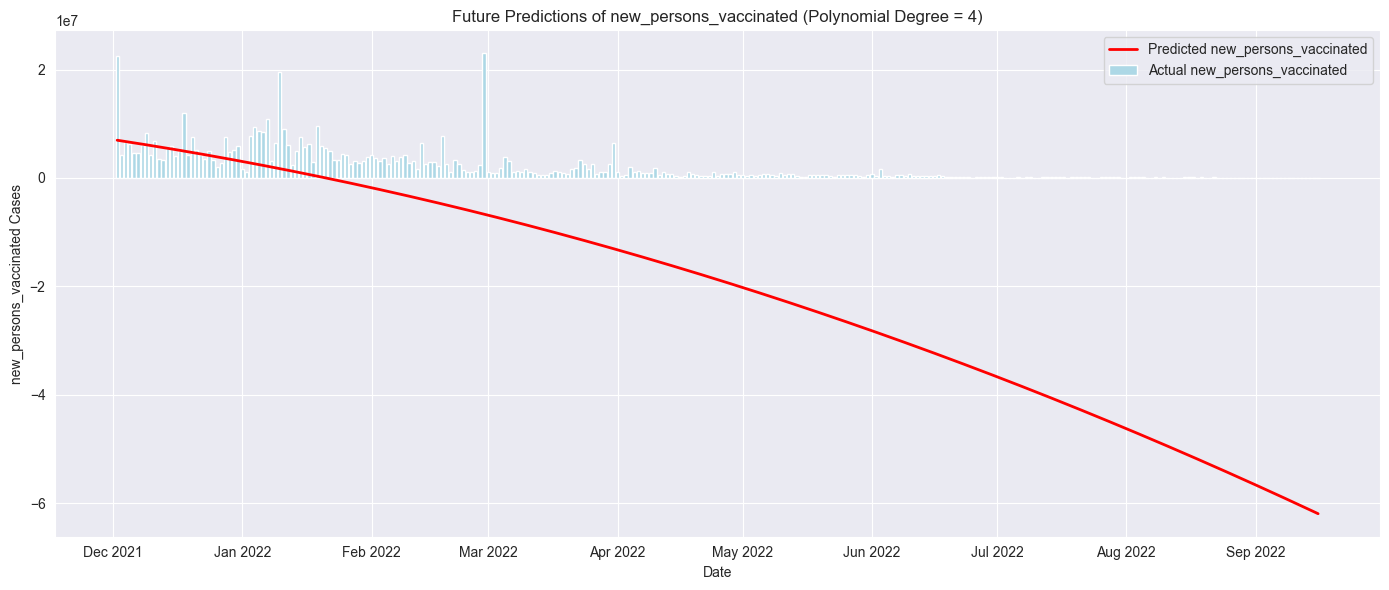

Training Data Metrics (Polynomial Regression):
MAE: 3156206.54
MSE: 16244997052776.94
R²: 0.57

Future Data Metrics (Polynomial Regression):
MAE: 23810761.32
MSE: 898090553121283.50
R²: -93.77


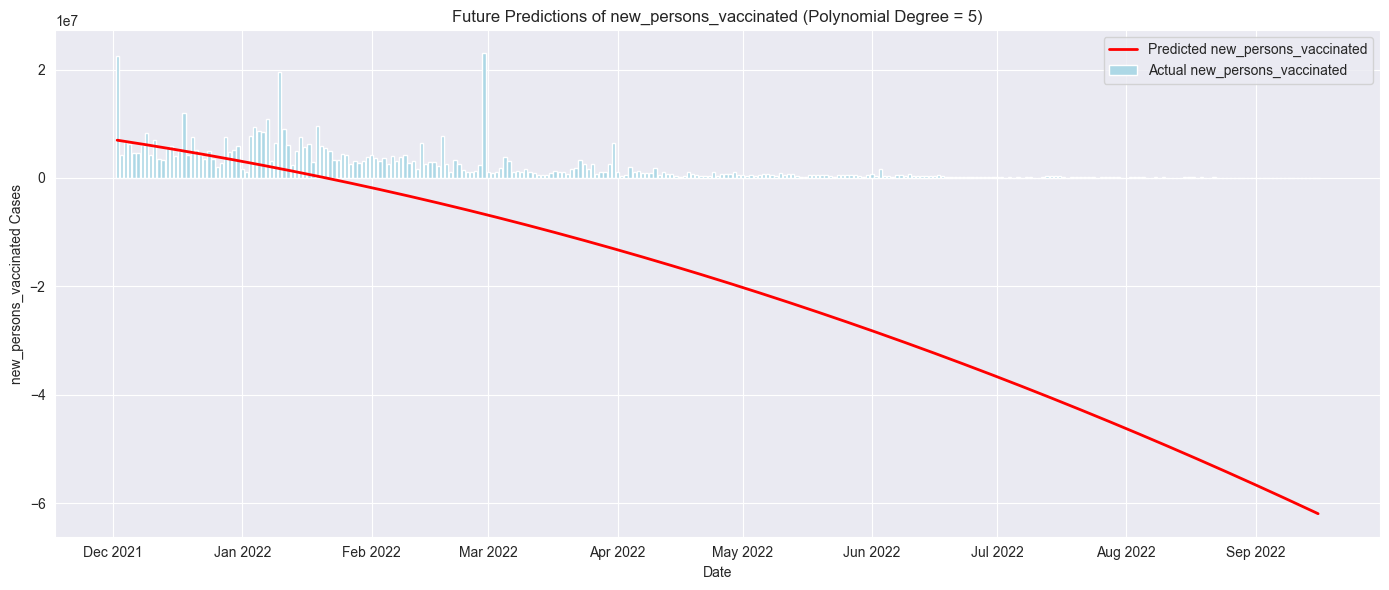

Training Data Metrics (Polynomial Regression):
MAE: 3156087.89
MSE: 16244054985597.09
R²: 0.57

Future Data Metrics (Polynomial Regression):
MAE: 23824932.29
MSE: 899163084759015.00
R²: -93.88


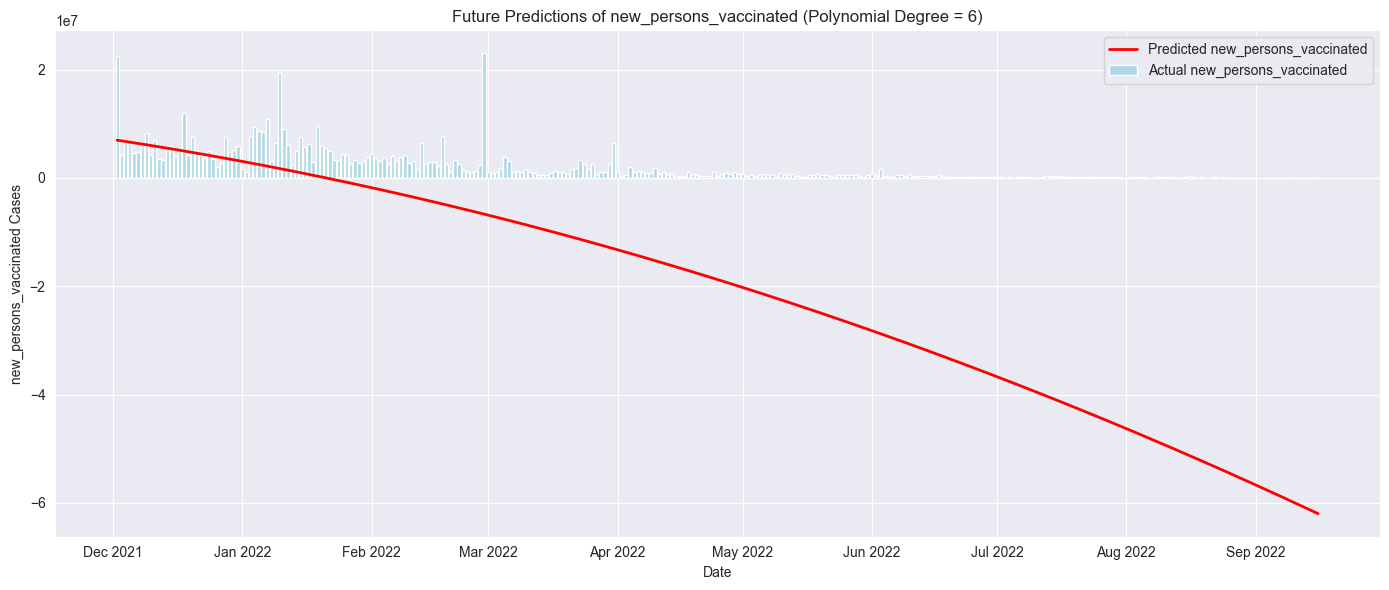

Training Data Metrics (Polynomial Regression):
MAE: 3155969.25
MSE: 16243113279662.28
R²: 0.57

Future Data Metrics (Polynomial Regression):
MAE: 23839108.62
MSE: 900236709059682.12
R²: -94.00


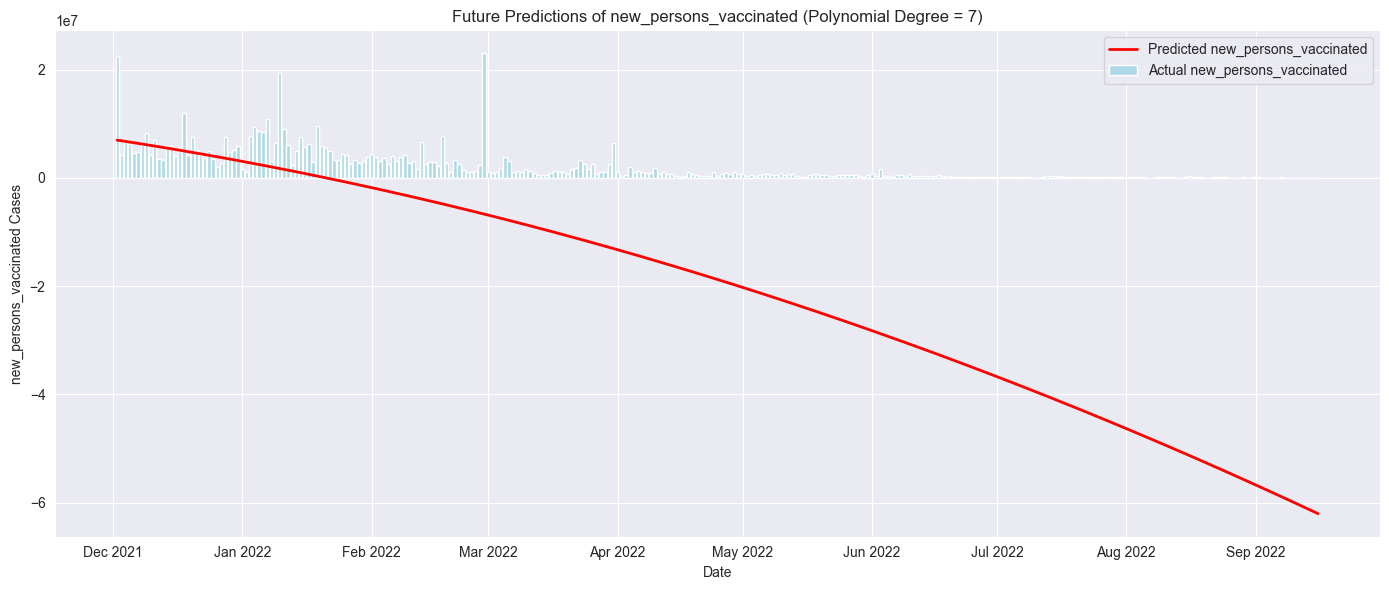

Training Data Metrics (Polynomial Regression):
MAE: 3155850.59
MSE: 16242171517157.13
R²: 0.57

Future Data Metrics (Polynomial Regression):
MAE: 23853290.84
MSE: 901311456472594.00
R²: -94.11


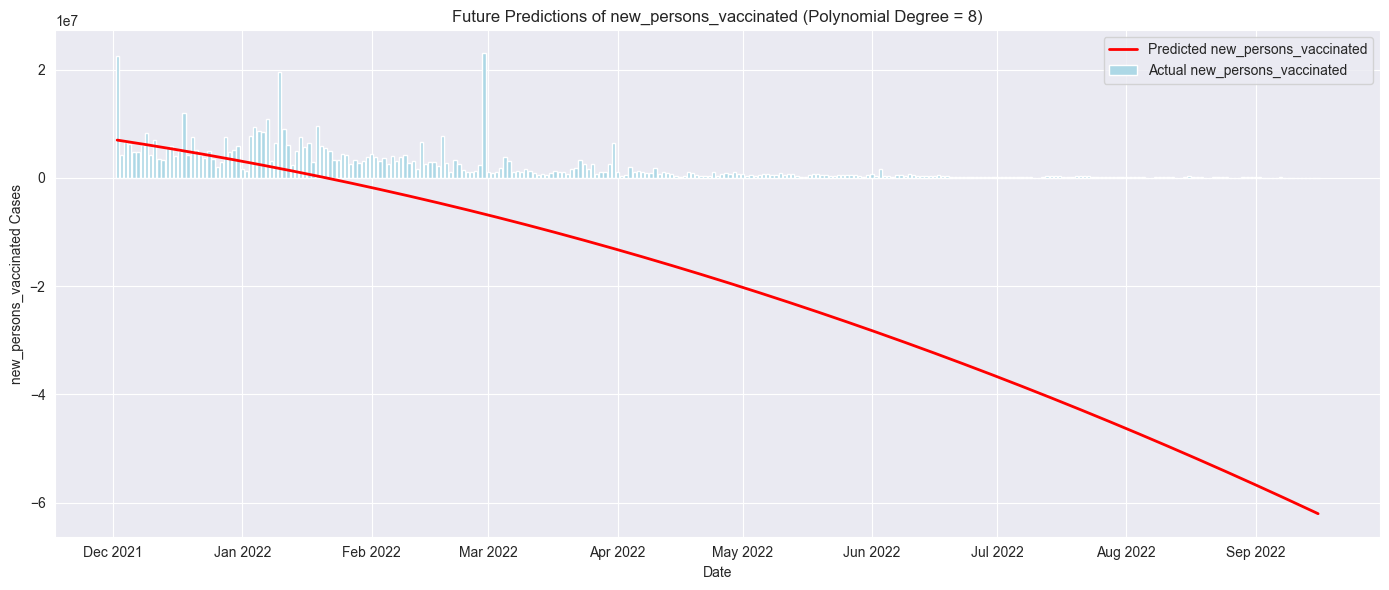

Training Data Metrics (Polynomial Regression):
MAE: 3155731.91
MSE: 16241229820609.52
R²: 0.57

Future Data Metrics (Polynomial Regression):
MAE: 23867478.79
MSE: 902387318633942.75
R²: -94.22


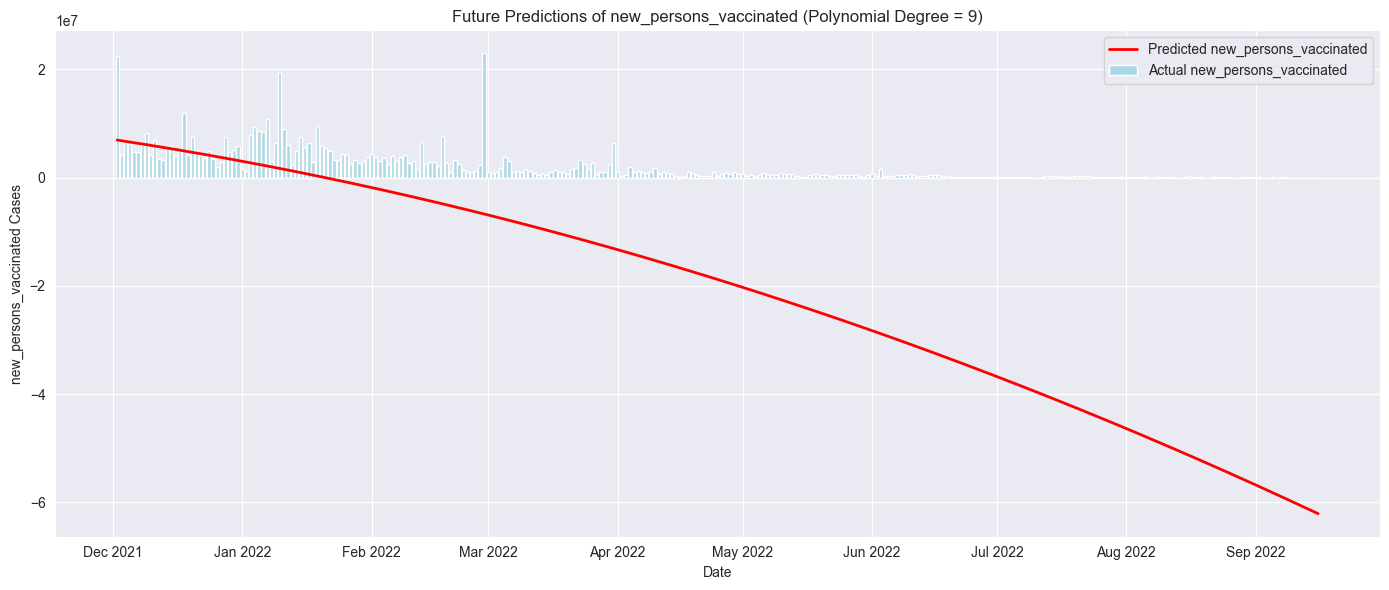

In [154]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

feature = 'new_persons_vaccinated'
poly_degree = 10

train_start = '2020-07-01'
train_end = '2021-12-01'
test_start = train_end
test_end = '2023-01-01'

def polynomial_regression_experiment(data, feature, date_column, train_start, train_end, test_start, test_end, degrees):
    """
    Perform a polynomial regression experiment with cross-validation and evaluate test data performance.

    Parameters:
    - data: DataFrame containing the feature and date columns
    - feature: The target feature to predict
    - date_column: The column containing dates
    - train_start, train_end: Strings representing the training data range (inclusive)
    - test_start, test_end: Strings representing the test data range (inclusive)
    - degrees: List of polynomial degrees to evaluate
    """
    # Ensure the date column is in datetime format
    data[date_column] = pd.to_datetime(data[date_column])
    data['date_num'] = data[date_column].map(lambda x: x.toordinal())  # Convert date to ordinal

    # Split the dataset into training and test sets
    train = data[(data[date_column] >= train_start) & (data[date_column] <= train_end)]
    test = data[(data[date_column] >= test_start) & (data[date_column] <= test_end)]
    X_train, y_train = train[['date_num']], train[feature]
    X_test, y_test = test[['date_num']], test[feature]

    # Cross-validation to find the best polynomial degree
    best_degree, best_score = None, float('inf')
    for degree in degrees:
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(X_train)
        model = LinearRegression()
        scores = -cross_val_score(model, X_train_poly, y_train, scoring='neg_mean_squared_error', cv=5)
        mean_score = scores.mean()

        if mean_score < best_score:
            best_score = mean_score
            best_degree = degree

        print(f"Degree {degree}: Mean CV MSE = {mean_score:.2f}")

    print(f"Best polynomial degree: {best_degree}")

    # Train the final model with the best degree
    final_poly = PolynomialFeatures(best_degree)
    X_train_poly = final_poly.fit_transform(X_train)
    final_model = LinearRegression()
    final_model.fit(X_train_poly, y_train)

    # Evaluate the model on the test data
    X_test_poly = final_poly.transform(X_test)
    y_pred = final_model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Test Set Evaluation:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")

    # Visualize actual vs predicted values
    plt.figure(figsize=(14, 8))
    plt.plot(test[date_column], y_test, label="Actual", color="blue")
    plt.plot(test[date_column], y_pred, label="Predicted", color="red")
    plt.title(f"Polynomial Regression (Degree {best_degree}) - Actual vs Predicted")
    plt.xlabel("Date")
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage:
# polynomial_regression_experiment(
#     data=df_daily,
#     feature='new_confirmed',
#     date_column='date',
#     train_start='2020-07-01',
#     train_end='2021-12-01',
#     test_start='2022-01-01',
#     test_end='2023-01-01',
#     degrees=[1, 2, 3, 4, 5]
# )
polynomial_regression_experiment(df_daily, feature, 'date', train_start, train_end, test_start, test_end, degrees=[1,2,3,4,5])

def part4_func(feature, train_start, train_end, test_start, test_end, poly_degree=2):

    # Convert dates to ordinal values
    df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)

    # Training data according to the specified date range
    df_train = df_daily[
        (df_daily['date'] > train_start) & (df_daily['date'] < train_end)
        ].copy()

    # Extract training features/labels
    X_train = df_train[['data_num']]
    y_train = df_train[feature]

    # Split for training/testing
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    # Create polynomial features
    poly = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly.fit_transform(X_train_split)
    X_test_poly = poly.transform(X_test_split)

    # Train the polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train_split)

    # Predict on the test split for evaluation
    y_pred = model.predict(X_test_poly)
    mse_test = mean_squared_error(y_test_split, y_pred)
    mae_test = mean_absolute_error(y_test_split, y_pred)
    r2_test = r2_score(y_test_split, y_pred)

    print("Training Data Metrics (Polynomial Regression):")
    print(f"MAE: {mae_test:.2f}")
    print(f"MSE: {mse_test:.2f}")
    print(f"R²: {r2_test:.2f}")

    # Future data for prediction
    df_future = df_daily[
        (df_daily['date'] > test_start) & (df_daily['date'] < test_end)
        ].copy()

    X_future = df_future[['data_num']]
    y_future = df_future[feature]
    X_future_poly = poly.transform(X_future)

    # Predict future data
    y_future_pred = model.predict(X_future_poly)
    mse_future = mean_squared_error(y_future, y_future_pred)
    mae_future = mean_absolute_error(y_future, y_future_pred)
    r2_future = r2_score(y_future, y_future_pred)

    print("\nFuture Data Metrics (Polynomial Regression):")
    print(f"MAE: {mae_future:.2f}")
    print(f"MSE: {mse_future:.2f}")
    print(f"R²: {r2_future:.2f}")

    # Plot future data and predictions
    fig, ax = plt.subplots(figsize=(14, 6))
    plt.bar(df_future['date'], df_future[feature], color='lightblue', label=f'Actual {feature}')
    plt.plot(df_future['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
    plt.xlabel('Date')
    plt.ylabel(f'{feature} Cases')
    plt.title(f'Future Predictions of {feature} (Polynomial Degree = {poly_degree})')
    plt.legend()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.tight_layout()
    plt.show()

for i in range(10):
    part4_func(feature, train_start, train_end, test_start, test_end, i)

## Część 5

5.1 liczba nowych zachorowań

In [155]:
# df[(df.date > '2021-07-01') & (df.date < '2022-07-01') & (df.subregion1_name_x.isna())].groupby('country_name_x').size()


Training Data Metrics:
MAE: 405.46
MSE: 206341.71
R²: 0.63

Future Data Metrics:
MAE: 31804.01
MSE: 1490052497.27
R²: -2.09


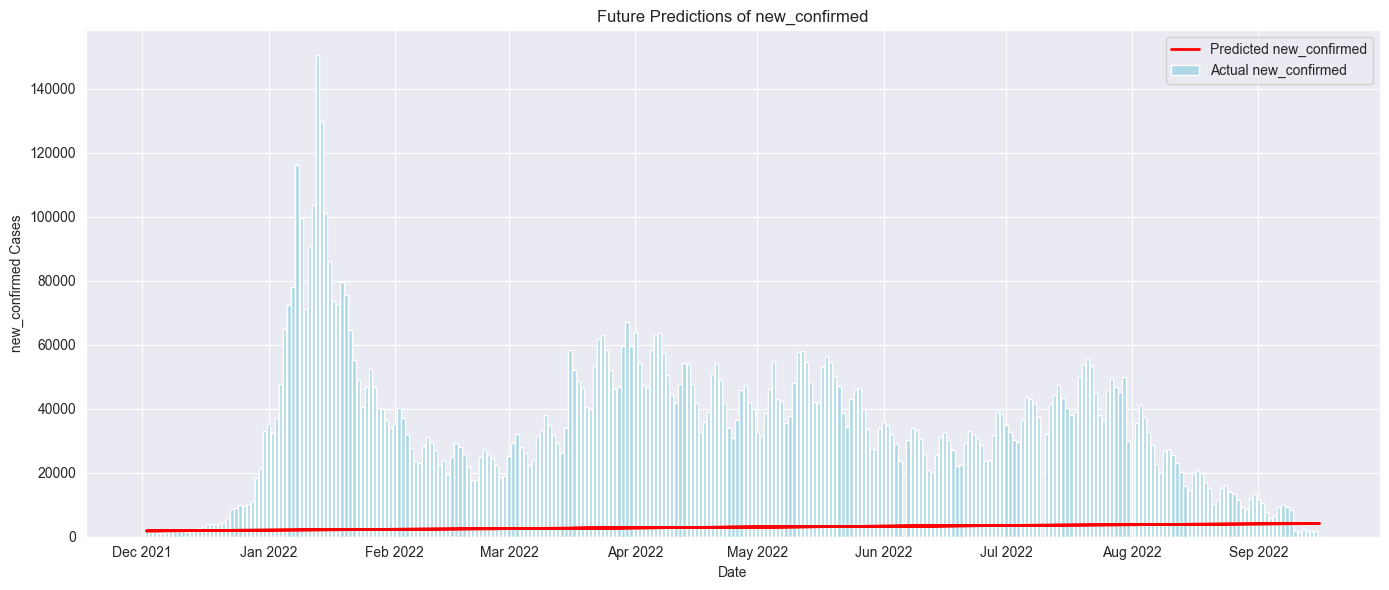

Training Data Metrics:
MAE: 1209.89
MSE: 3612409.44
R²: -0.02

Future Data Metrics:
MAE: 8567.13
MSE: 184389297.46
R²: -0.53


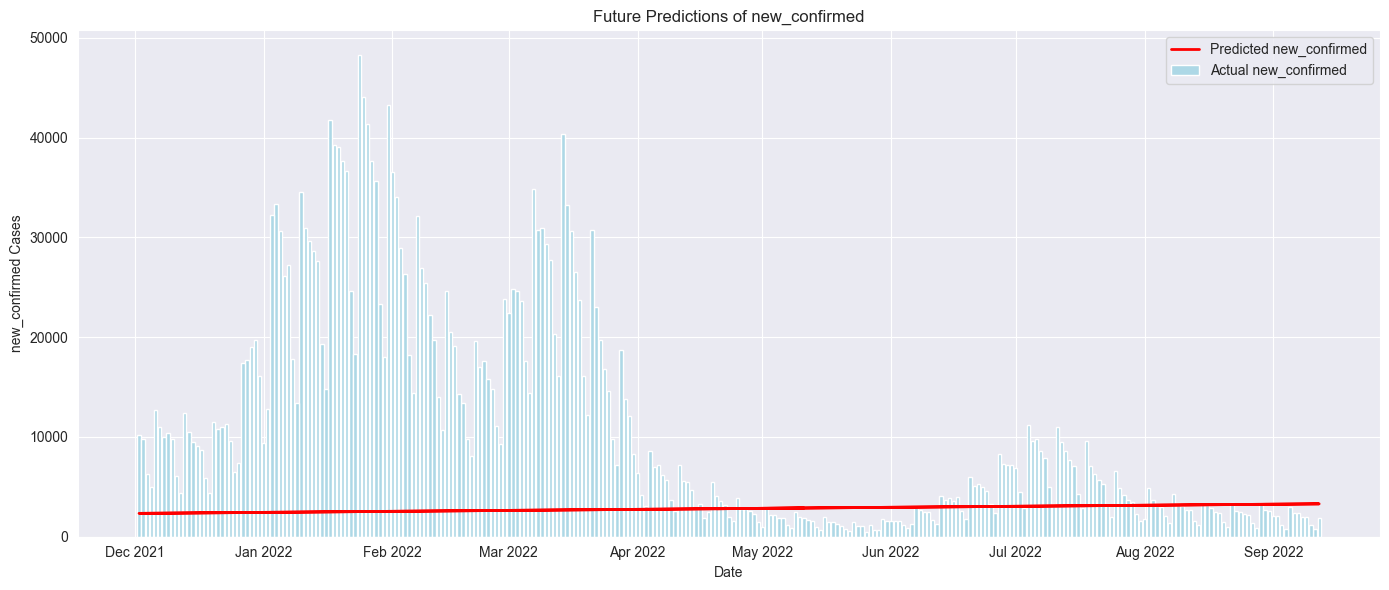

In [156]:
train_start_date = '2020-07-01'
train_end_date = '2021-12-01'
test_end_date = '2023-01-01'
first_country = 'Australia'
second_country = 'Switzerland'
feature = 'new_confirmed'
# Argentina, Canada
df['data_num'] = df['date'].map(pd.Timestamp.toordinal)
df_ar = df[(df.date > train_start_date) & (df.date < train_end_date) & (df.country_name_x == first_country) & (df.subregion1_name_x.isna())]
df_future_ar = df[(df.date > train_end) & (df.date < test_end_date) & (df.country_name_x == first_country) & (df.subregion1_name_x.isna())]
df_ca = df[(df.date > train_start_date) & (df.date < train_end_date) & (df.country_name_x == second_country) & (df.subregion1_name_x.isna())]
df_future_ca = df[(df.date > train_end_date) & (df.date < test_end_date) & (df.country_name_x == second_country) & (df.subregion1_name_x.isna())]



#Argentina

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_ar[['data_num']], df_ar[feature], test_size=0.1)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
X_future, y_future = df_future_ar[['data_num']], df_future_ar[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df_future_ar['date'], df_future_ar['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df_future_ar['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

#Canada

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_ca[['data_num']], df_ca[feature], test_size=0.1)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
X_future, y_future = df_future_ca[['data_num']], df_future_ca[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df_future_ca['date'], df_future_ca['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df_future_ca['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


5.2 liczba nowych śmierci

Training Data Metrics:
MAE: 67.75
MSE: 6238.08
R²: 0.80

Future Data Metrics:
MAE: 965.01
MSE: 1048780.90
R²: -94.23


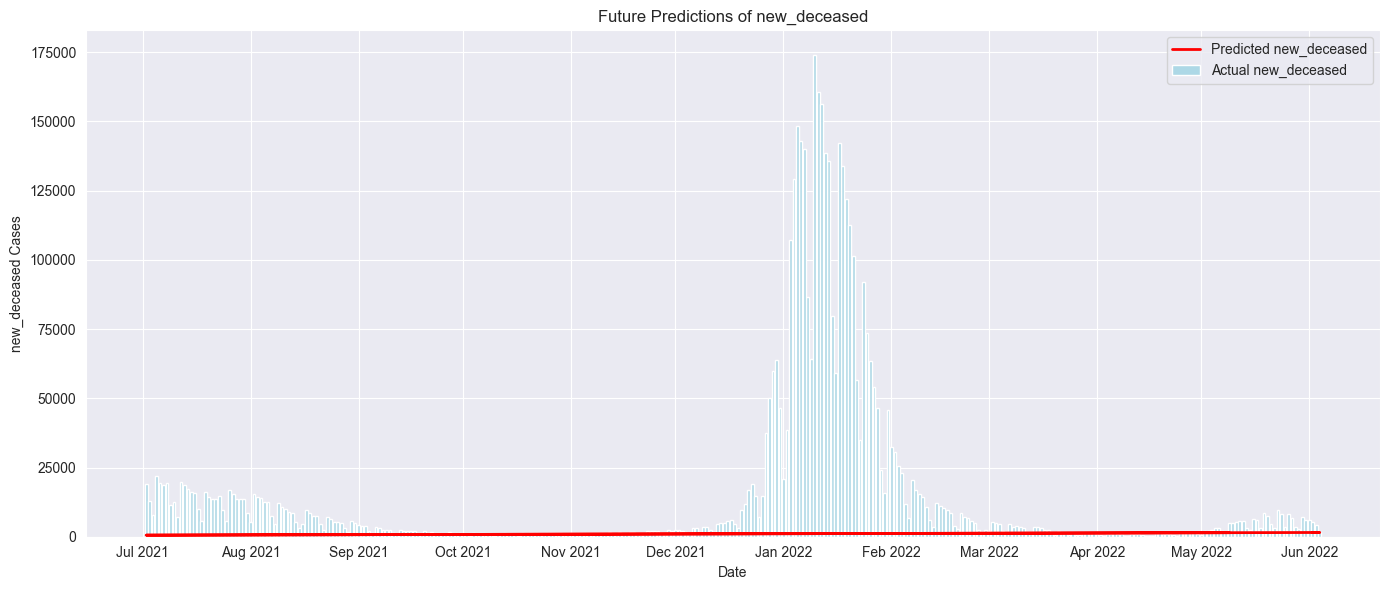

Training Data Metrics:
MAE: 124.18
MSE: 53100.94
R²: 0.04

Future Data Metrics:
MAE: 131.44
MSE: 44851.21
R²: -1.02


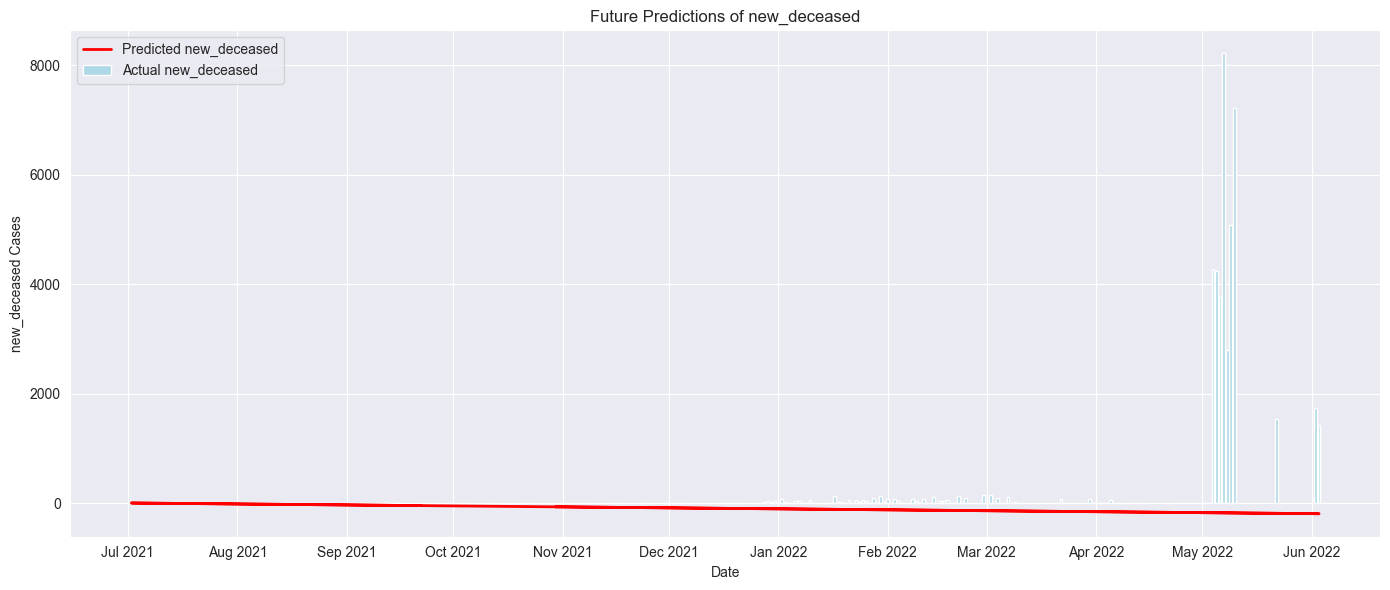

In [157]:
feature = 'new_deceased'
# Argentina, Canada
df['data_num'] = df['date'].map(pd.Timestamp.toordinal)
df_ar = df[(df.date > '2020-07-01') & (df.date < '2021-07-01') & (df.country_name_x == 'Argentina') & (df.subregion1_name_x.isna())]
df_future_ar = df[(df.date > '2021-07-01') & (df.date < '2022-07-01') & (df.country_name_x == 'Argentina') & (df.subregion1_name_x.isna())]
df_ca = df[(df.date > '2020-07-01') & (df.date < '2021-07-01') & (df.country_name_x == 'Canada') & (df.subregion1_name_x.isna())]
df_future_ca = df[(df.date > '2021-07-01') & (df.date < '2022-07-01') & (df.country_name_x == 'Canada') & (df.subregion1_name_x.isna())]



#Argentina

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_ar[['data_num']], df_ar[feature], test_size=0.1)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
X_future, y_future = df_future_ar[['data_num']], df_future_ar[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df_future_ar['date'], df_future_ar['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df_future_ar['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

#Canada

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_ca[['data_num']], df_ca[feature], test_size=0.1)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
X_future, y_future = df_future_ca[['data_num']], df_future_ca[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df_future_ca['date'], df_future_ca['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df_future_ca['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


5.3 liczba nowych szczepień

Training Data Metrics:
MAE: 37182.12
MSE: 1895354220.76
R²: 0.17

Future Data Metrics:
MAE: 108963.28
MSE: 14113743903.63
R²: -1.38


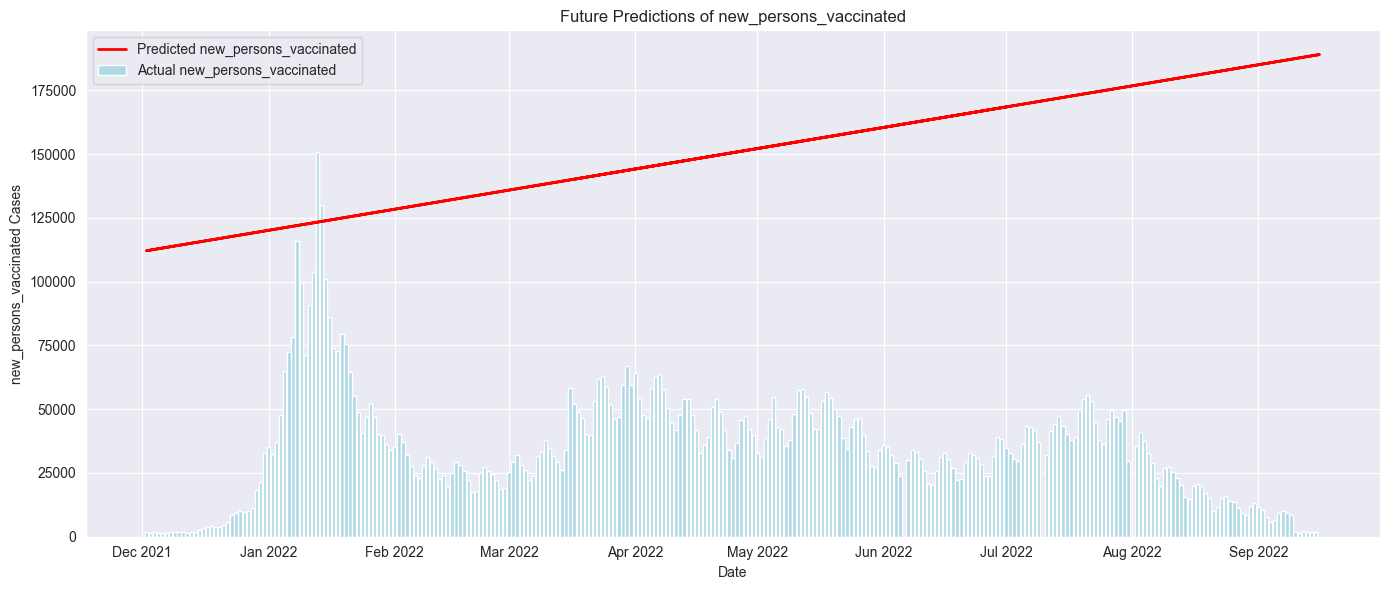

Training Data Metrics:
MAE: 11848.21
MSE: 230101982.81
R²: 0.02

Future Data Metrics:
MAE: 11167.06
MSE: 126033624.56
R²: -76.12


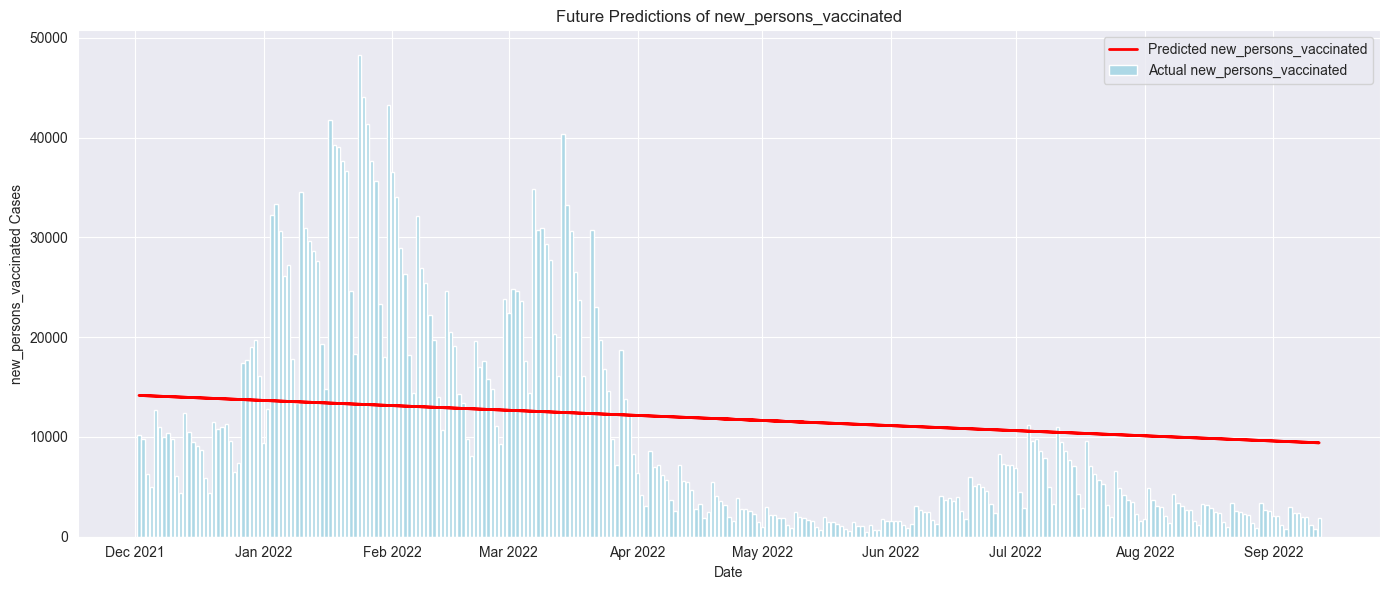

In [158]:
feature = 'new_persons_vaccinated'
# Argentina, Canada
df['data_num'] = df['date'].map(pd.Timestamp.toordinal)
df_ar = df[(df.date > train_start_date) & (df.date < train_end_date) & (df.country_name_x == first_country) & (df.subregion1_name_x.isna())]
df_future_ar = df[(df.date > train_end) & (df.date < test_end_date) & (df.country_name_x == first_country) & (df.subregion1_name_x.isna())]
df_ca = df[(df.date > train_start_date) & (df.date < train_end_date) & (df.country_name_x == second_country) & (df.subregion1_name_x.isna())]
df_future_ca = df[(df.date > train_end_date) & (df.date < test_end_date) & (df.country_name_x == second_country) & (df.subregion1_name_x.isna())]



#Argentina

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_ar[['data_num']], df_ar[feature], test_size=0.1)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
X_future, y_future = df_future_ar[['data_num']], df_future_ar[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df_future_ar['date'], df_future_ar['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df_future_ar['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

#Canada

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_ca[['data_num']], df_ca[feature], test_size=0.1)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
X_future, y_future = df_future_ca[['data_num']], df_future_ca[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df_future_ca['date'], df_future_ca['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df_future_ca['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


5.4.1 liczba osób w pełni zaszczepionych

Training Data Metrics:
MAE: 27354.37
MSE: 1243482990.49
R²: 0.70

Future Data Metrics:
MAE: 221323.69
MSE: 52387713380.78
R²: -325.56


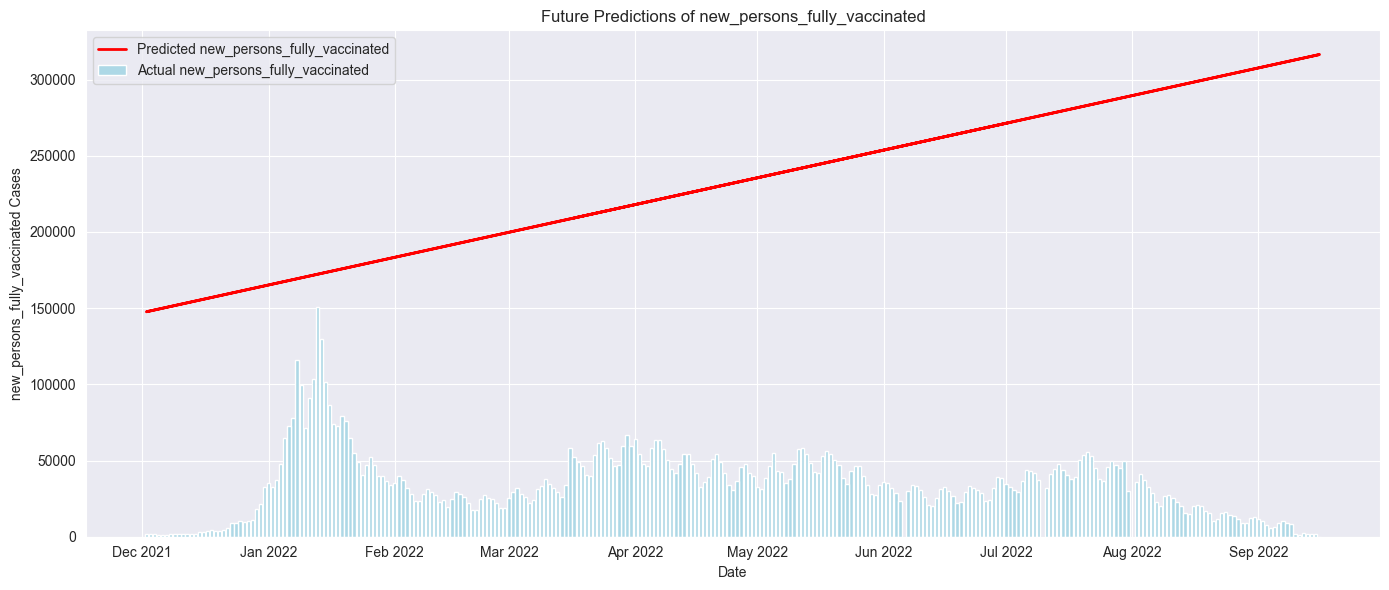

Training Data Metrics:
MAE: 13022.23
MSE: 282649213.46
R²: -0.02

Future Data Metrics:
MAE: 24052.60
MSE: 590242280.84
R²: -246.65


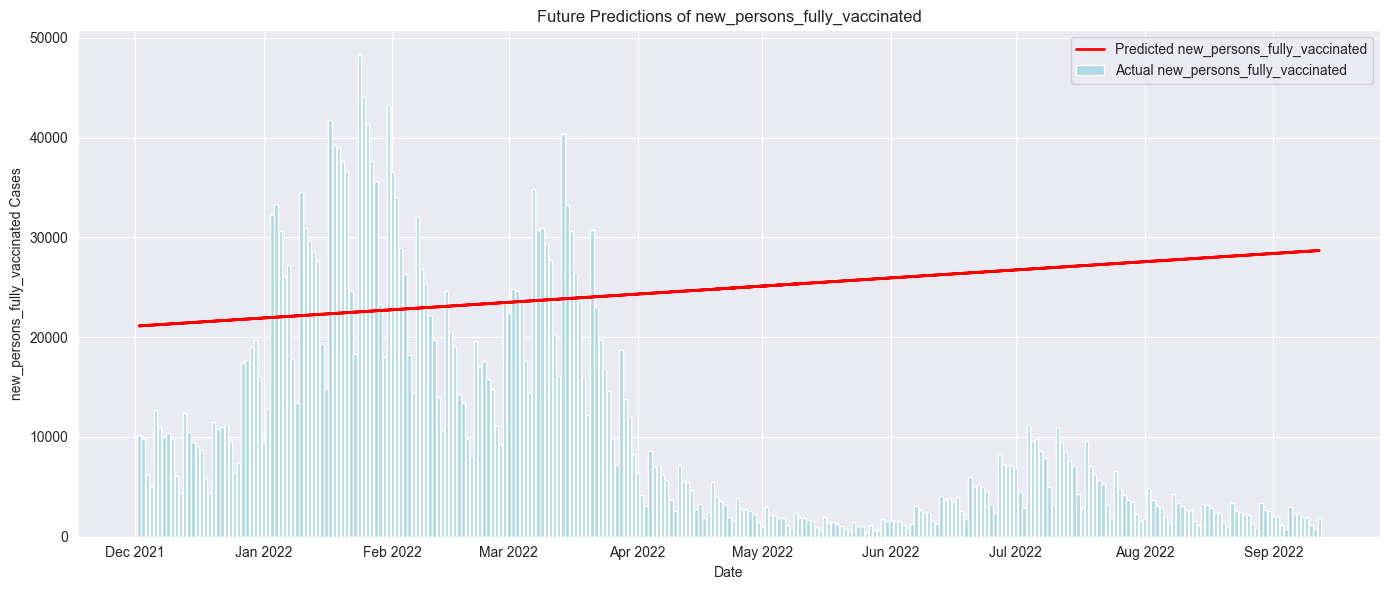

In [159]:
feature = 'new_persons_fully_vaccinated'
# Argentina, Canada
df['data_num'] = df['date'].map(pd.Timestamp.toordinal)
df_ar = df[(df.date > train_start_date) & (df.date < train_end_date) & (df.country_name_x == first_country) & (df.subregion1_name_x.isna())]
df_future_ar = df[(df.date > train_end) & (df.date < test_end_date) & (df.country_name_x == first_country) & (df.subregion1_name_x.isna())]
df_ca = df[(df.date > train_start_date) & (df.date < train_end_date) & (df.country_name_x == second_country) & (df.subregion1_name_x.isna())]
df_future_ca = df[(df.date > train_end_date) & (df.date < test_end_date) & (df.country_name_x == second_country) & (df.subregion1_name_x.isna())]



#Argentina

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_ar[['data_num']], df_ar[feature], test_size=0.1)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
X_future, y_future = df_future_ar[['data_num']], df_future_ar[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df_future_ar['date'], df_future_ar['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df_future_ar['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

#Canada

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_ca[['data_num']], df_ca[feature], test_size=0.1)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
X_future, y_future = df_future_ca[['data_num']], df_future_ca[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df_future_ca['date'], df_future_ca['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df_future_ca['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


5.4.2 liczba podanych dawek

Training Data Metrics:
MAE: 57816.55
MSE: 5402507191.01
R²: 0.53

Future Data Metrics:
MAE: 301006.28
MSE: 107694304405.73
R²: -15.07


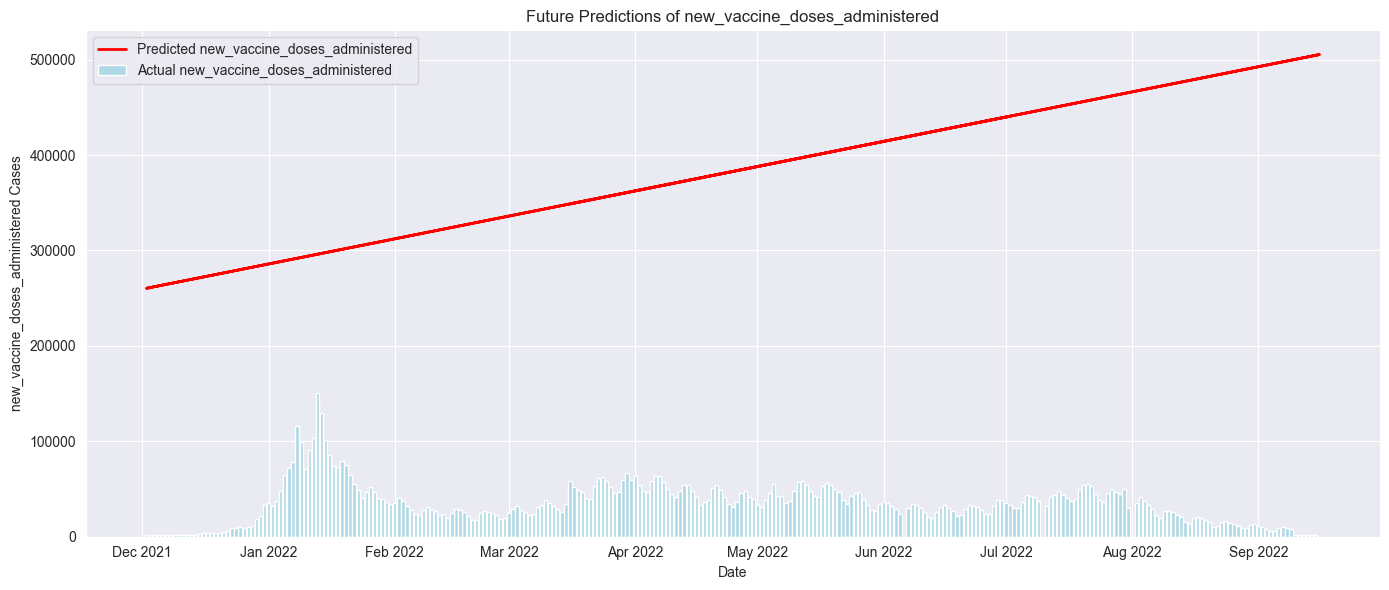

Training Data Metrics:
MAE: 23853.22
MSE: 1022325810.51
R²: -0.01

Future Data Metrics:
MAE: 39131.55
MSE: 1620071443.15
R²: -1.58


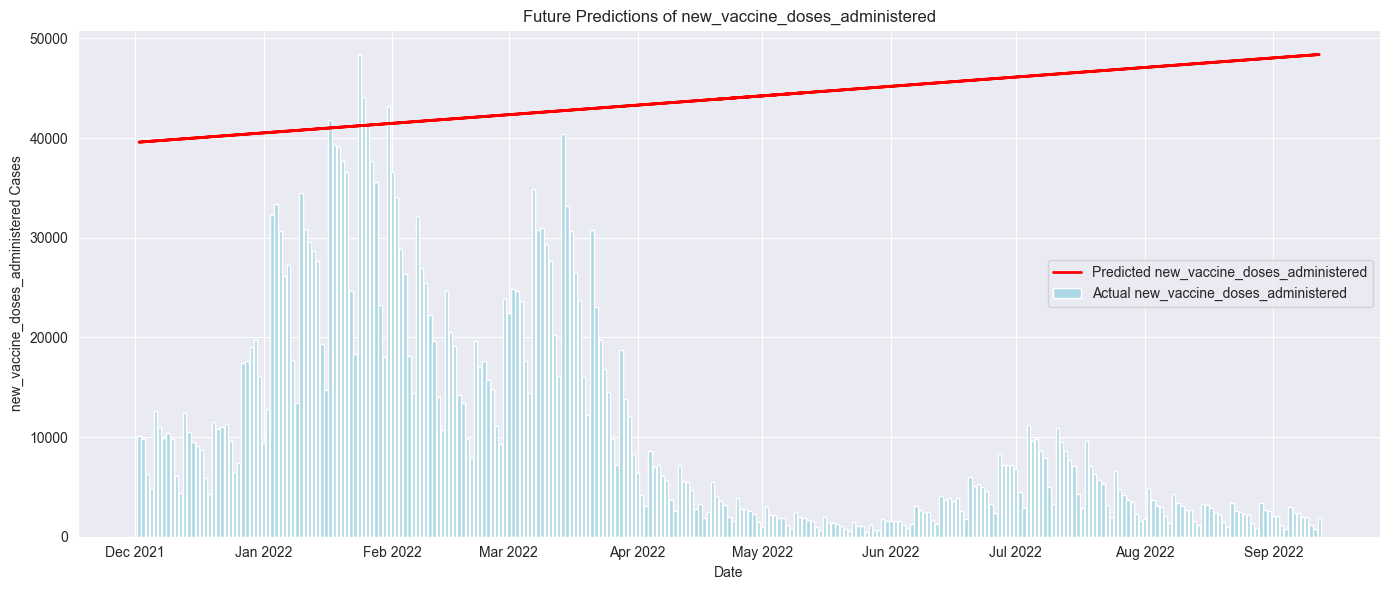

In [160]:
feature = 'new_vaccine_doses_administered'
# Argentina, Canada
df['data_num'] = df['date'].map(pd.Timestamp.toordinal)
df_ar = df[(df.date > train_start_date) & (df.date < train_end_date) & (df.country_name_x == first_country) & (df.subregion1_name_x.isna())]
df_future_ar = df[(df.date > train_end) & (df.date < test_end_date) & (df.country_name_x == first_country) & (df.subregion1_name_x.isna())]
df_ca = df[(df.date > train_start_date) & (df.date < train_end_date) & (df.country_name_x == second_country) & (df.subregion1_name_x.isna())]
df_future_ca = df[(df.date > train_end_date) & (df.date < test_end_date) & (df.country_name_x == second_country) & (df.subregion1_name_x.isna())]



#Argentina

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_ar[['data_num']], df_ar[feature], test_size=0.1)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
X_future, y_future = df_future_ar[['data_num']], df_future_ar[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df_future_ar['date'], df_future_ar['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df_future_ar['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

#Canada

# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_ca[['data_num']], df_ca[feature], test_size=0.1)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
X_future, y_future = df_future_ca[['data_num']], df_future_ca[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df_future_ca['date'], df_future_ca['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df_future_ca['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()
